In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [6]:
df2 = pd.read_excel('C:\\Users\\user\\Downloads\\lp-winsorized-with-incomeclass.xlsx')
df = pd.read_excel('C:\\Users\\user\\Downloads\\HAQ-winsorized-with-incomeclass.xlsx')

In [7]:
labor.head()

Country  Year       LP_w  IC                     Region
0  Argentina  2000  23.287077  UM  Latin America & Caribbean
1  Argentina  2005  21.956108  UM  Latin America & Caribbean
2  Argentina  2010  27.548946  UM  Latin America & Caribbean
3  Argentina  2015  30.041763  UM  Latin America & Caribbean
4  Argentina  2019  33.711970  UM  Latin America & Caribbean

In [8]:
haq.head()

Country  Year      HAQ_w  IC                     Region
0  Argentina  2000  76.100000  UM  Latin America & Caribbean
1  Argentina  2005  77.200000  UM  Latin America & Caribbean
2  Argentina  2010  79.600000  UM  Latin America & Caribbean
3  Argentina  2015  81.900000  UM  Latin America & Caribbean
4  Argentina  2019  59.876111  UM  Latin America & Caribbean

In [12]:
country_col = "Country"
region_col = "Region"
year_col = "Year"
haq_col = "HAQ_w"
income_col = "IC"
labor_col = "LP_w"

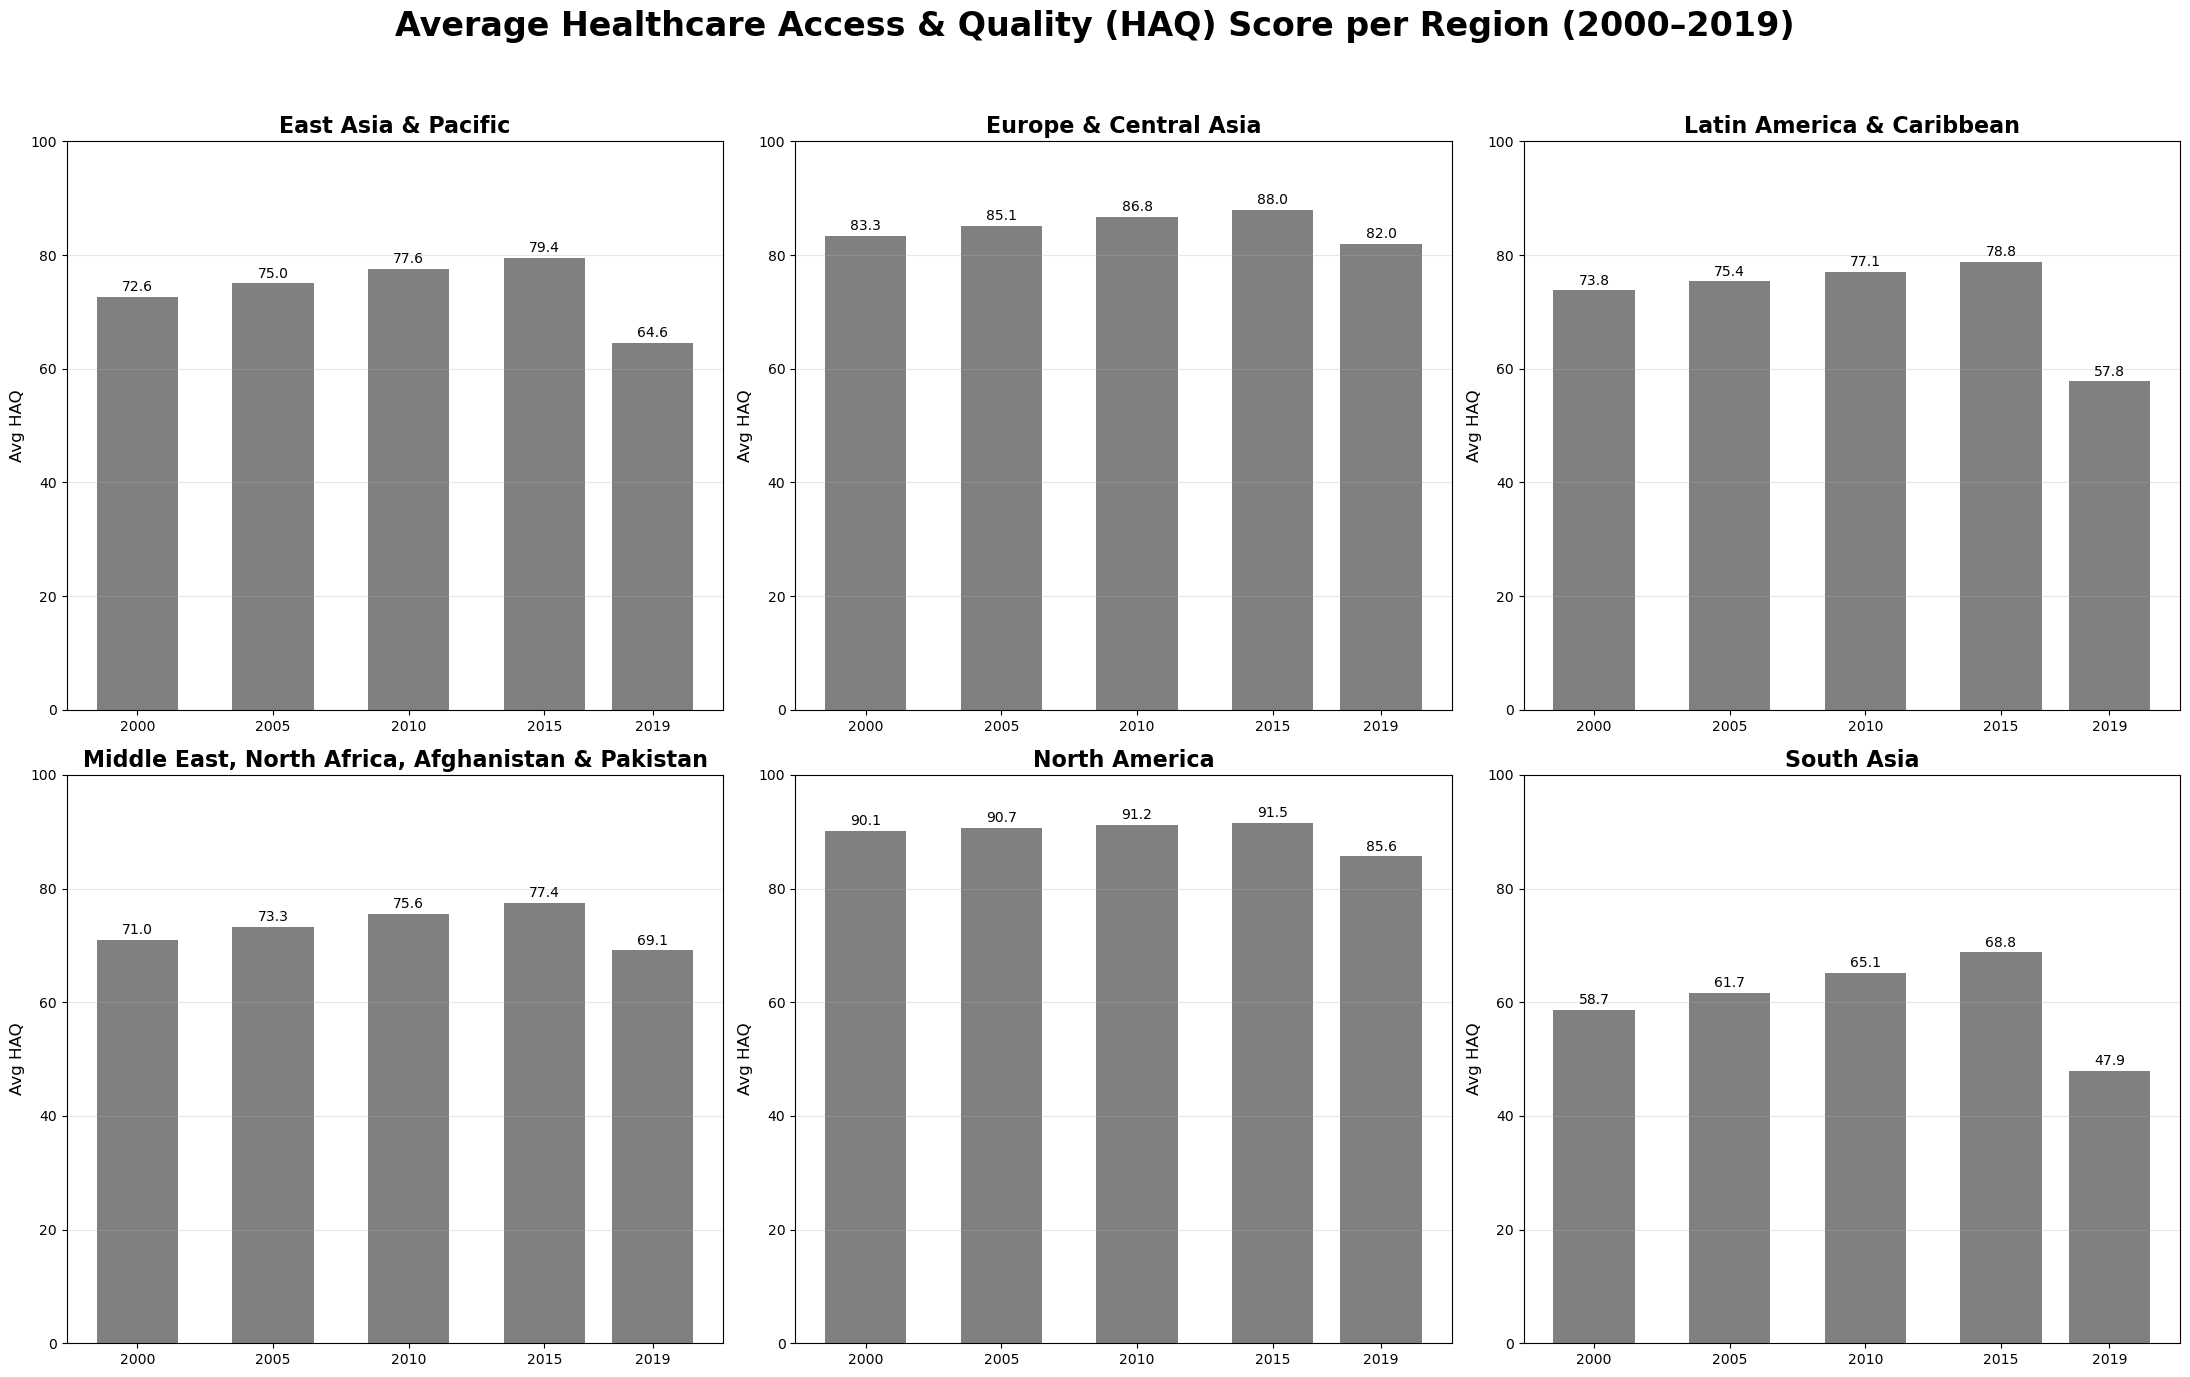

In [13]:

# Ensure Year is numeric
df[year_col] = df[year_col].astype(int)
 
# Fixed year ticks
year_ticks = [2000, 2005, 2010, 2015, 2019]
 
# Regions
regions = sorted(df[region_col].dropna().unique())
n_regions = len(regions)
 
# Grid layout (2 rows x 3 columns = 6 graphs)
cols = 3
rows = math.ceil(n_regions / cols)
 
fig, axes = plt.subplots(rows, cols, figsize=(22, 14))
axes = axes.flatten()
 
fig.suptitle(
    "Average Healthcare Access & Quality (HAQ) Score per Region (2000–2019)",
    fontsize=24, weight="bold", y=0.98
 )
 
# ----------------------------------------------------
#   PLOT EACH REGION IN ITS OWN SUBPLOT
 # ----------------------------------------------------
for i, region in enumerate(regions):
 
    ax = axes[i]
 
    df_r = df[df[region_col] == region]
 
    # Average HAQ by year
    df_avg = (
        df_r.groupby(year_col)[haq_col]
        .mean()
        .reindex(year_ticks)
    )
 
    # Bar chart (gray)
    ax.bar(df_avg.index, df_avg.values, color="gray", width=3.0)
 
    # Value labels
    for x, y in zip(df_avg.index, df_avg.values):
        if pd.notna(y):
            ax.text(x, y + 1, f"{y:.1f}", ha='center', fontsize=10)
 
    # Title per region
    ax.set_title(region, fontsize=16, weight='bold')
 
    ax.set_ylim(0, 100)
    ax.set_xticks(year_ticks)
    ax.set_xticklabels(year_ticks, fontsize=10)
    ax.set_ylabel("Avg HAQ", fontsize=12)
    ax.grid(axis="y", alpha=0.3)
 # Remove unused subplots (if any)
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])
plt.tight_layout(rect=[0, 0, 1, 0.95])
 
# Save final combined figure
plt.savefig("HAQ_wALL_regions_6graphs_HAQ_avg.png", dpi=300, bbox_inches="tight")
plt.show()

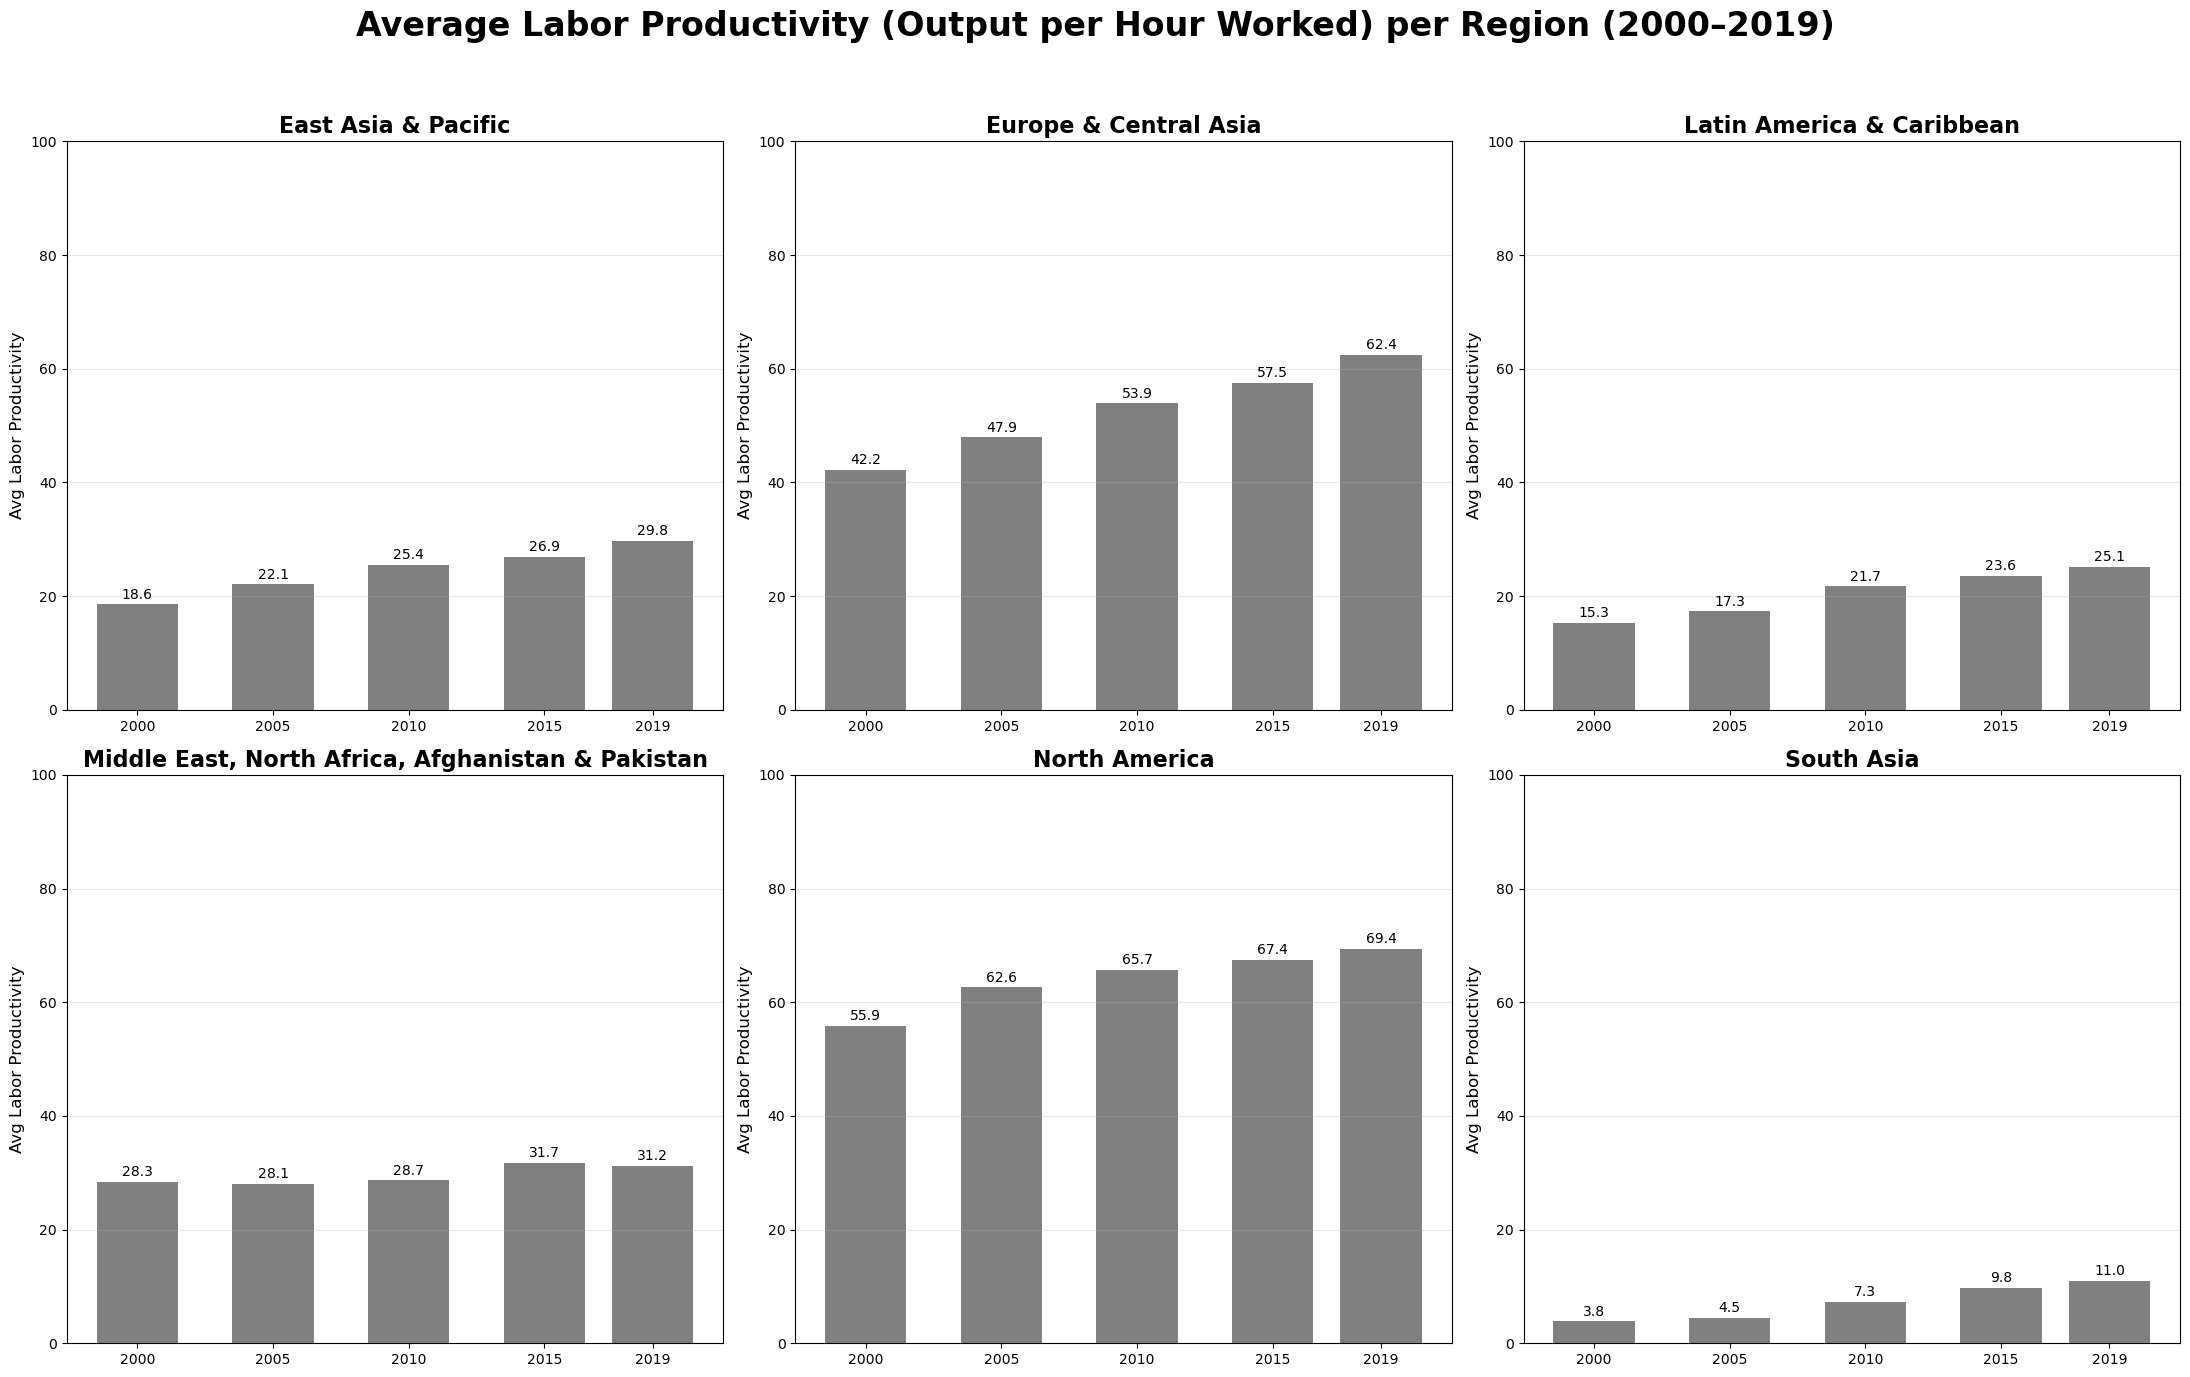

In [15]:

# Ensure Year is numeric
df2[year_col] = df2[year_col].astype(int)
 
# Fixed year ticks
year_ticks = [2000, 2005, 2010, 2015, 2019]
 
# Regions
regions = sorted(df2[region_col].dropna().unique())
n_regions = len(regions)
 
# Grid layout (2 rows x 3 columns = 6 graphs)
cols = 3
rows = math.ceil(n_regions / cols)
 
fig, axes = plt.subplots(rows, cols, figsize=(22, 14))
axes = axes.flatten()
 
fig.suptitle(
    "Average Labor Productivity (Output per Hour Worked) per Region (2000–2019)",
    fontsize=24, weight="bold", y=0.98
 )
 
# ----------------------------------------------------
#   PLOT EACH REGION IN ITS OWN SUBPLOT
 # ----------------------------------------------------
for i, region in enumerate(regions):
 
    ax = axes[i]
 
    df_r = df2[df2[region_col] == region]
 
    # Average Labor productivity by year
    df_avg = (
        df_r.groupby(year_col)[labor_col]
        .mean()
        .reindex(year_ticks)
    )
 
    # Bar chart (gray)
    ax.bar(df_avg.index, df_avg.values, color="gray", width=3.0)
 
    # Value labels
    for x, y in zip(df_avg.index, df_avg.values):
        if pd.notna(y):
            ax.text(x, y + 1, f"{y:.1f}", ha='center', fontsize=10)
 
    # Title per region
    ax.set_title(region, fontsize=16, weight='bold')
 
    ax.set_ylim(0, 100)
    ax.set_xticks(year_ticks)
    ax.set_xticklabels(year_ticks, fontsize=10)
    ax.set_ylabel("Avg Labor Productivity", fontsize=12)
    ax.grid(axis="y", alpha=0.3)
 # Remove unused subplots (if any)
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])
plt.tight_layout(rect=[0, 0, 1, 0.95])
 
# Save final combined figure
plt.savefig("Labor_wALL_regions_6graphs_HAQ_avg.png", dpi=300, bbox_inches="tight")
plt.show()

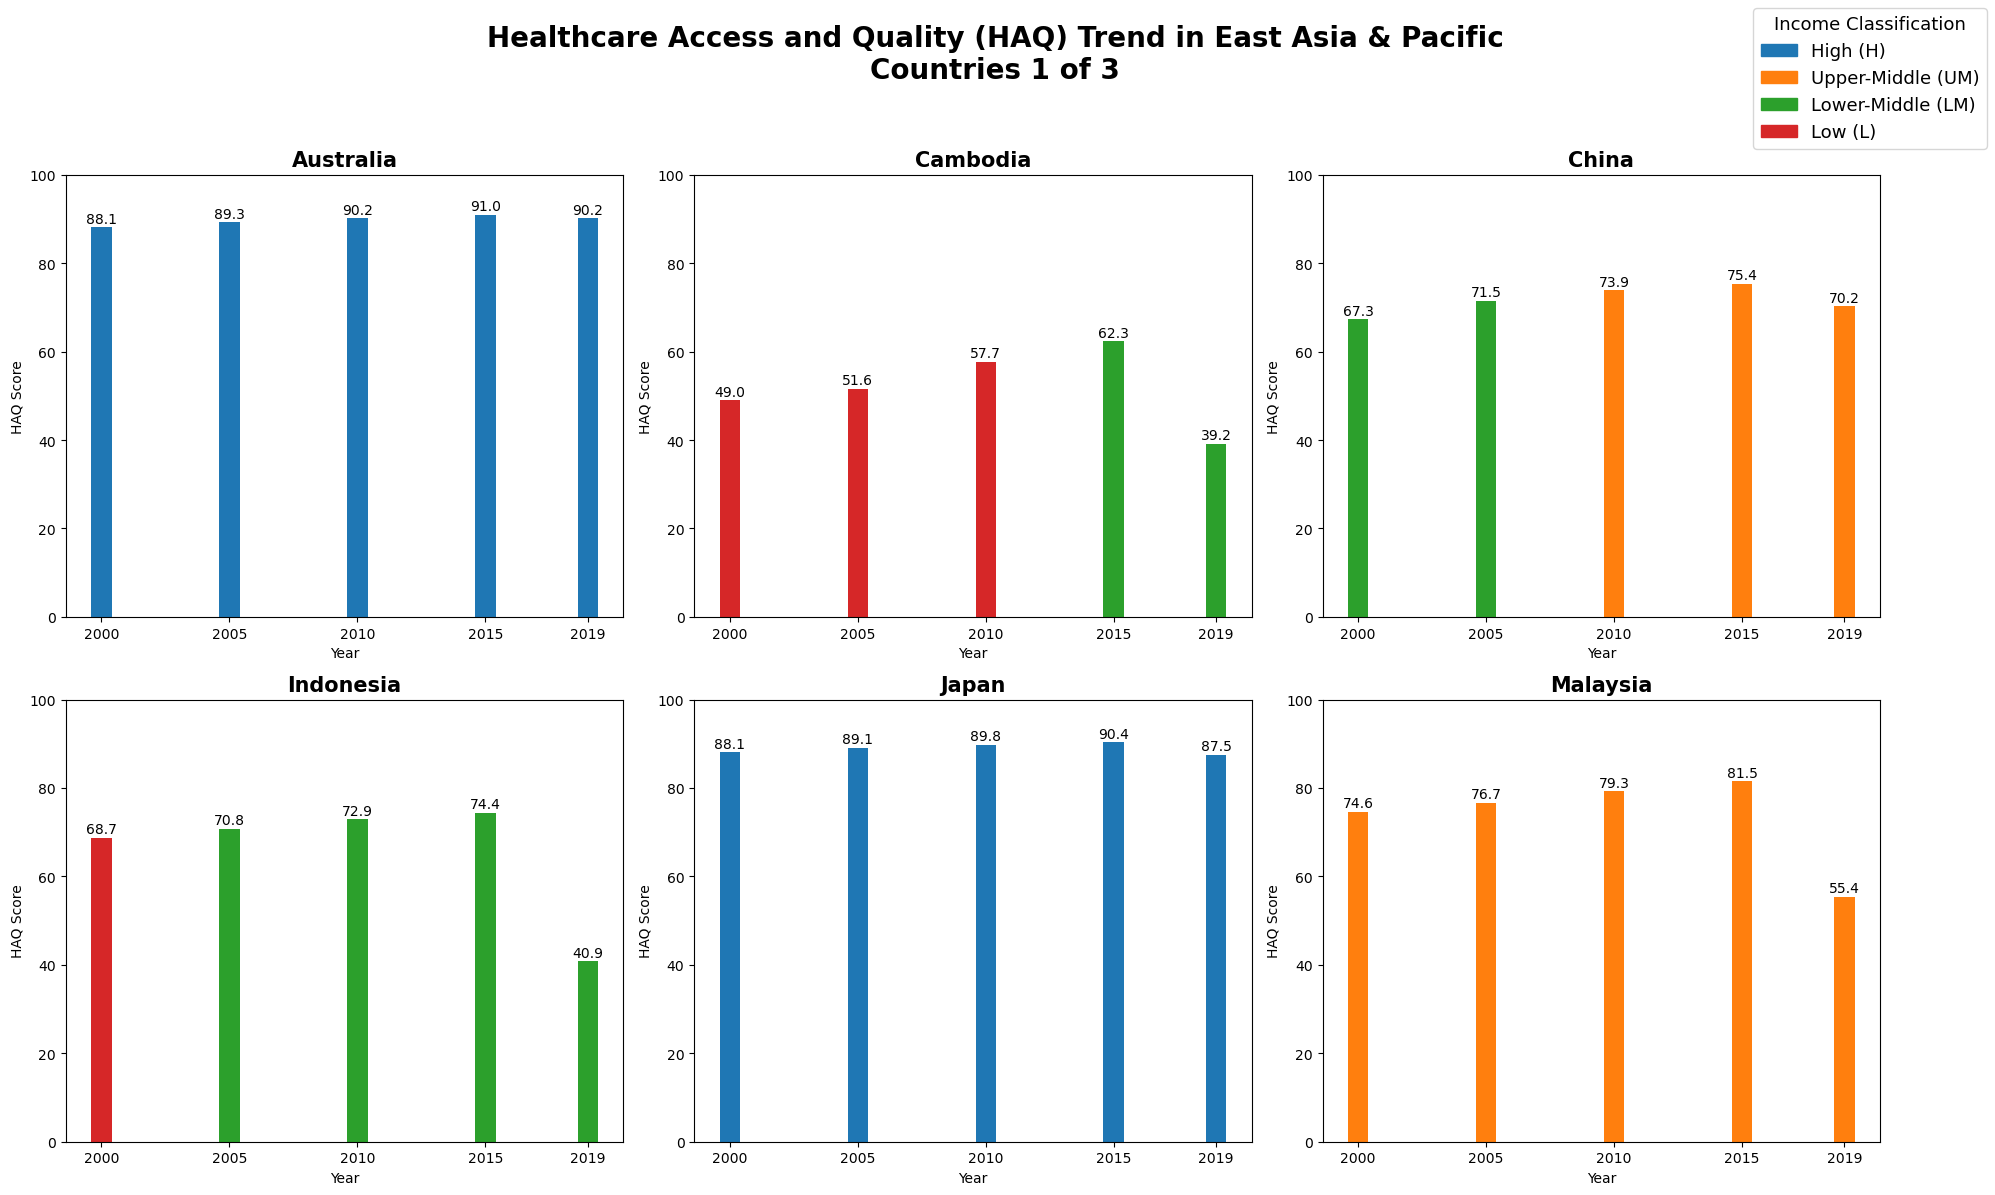

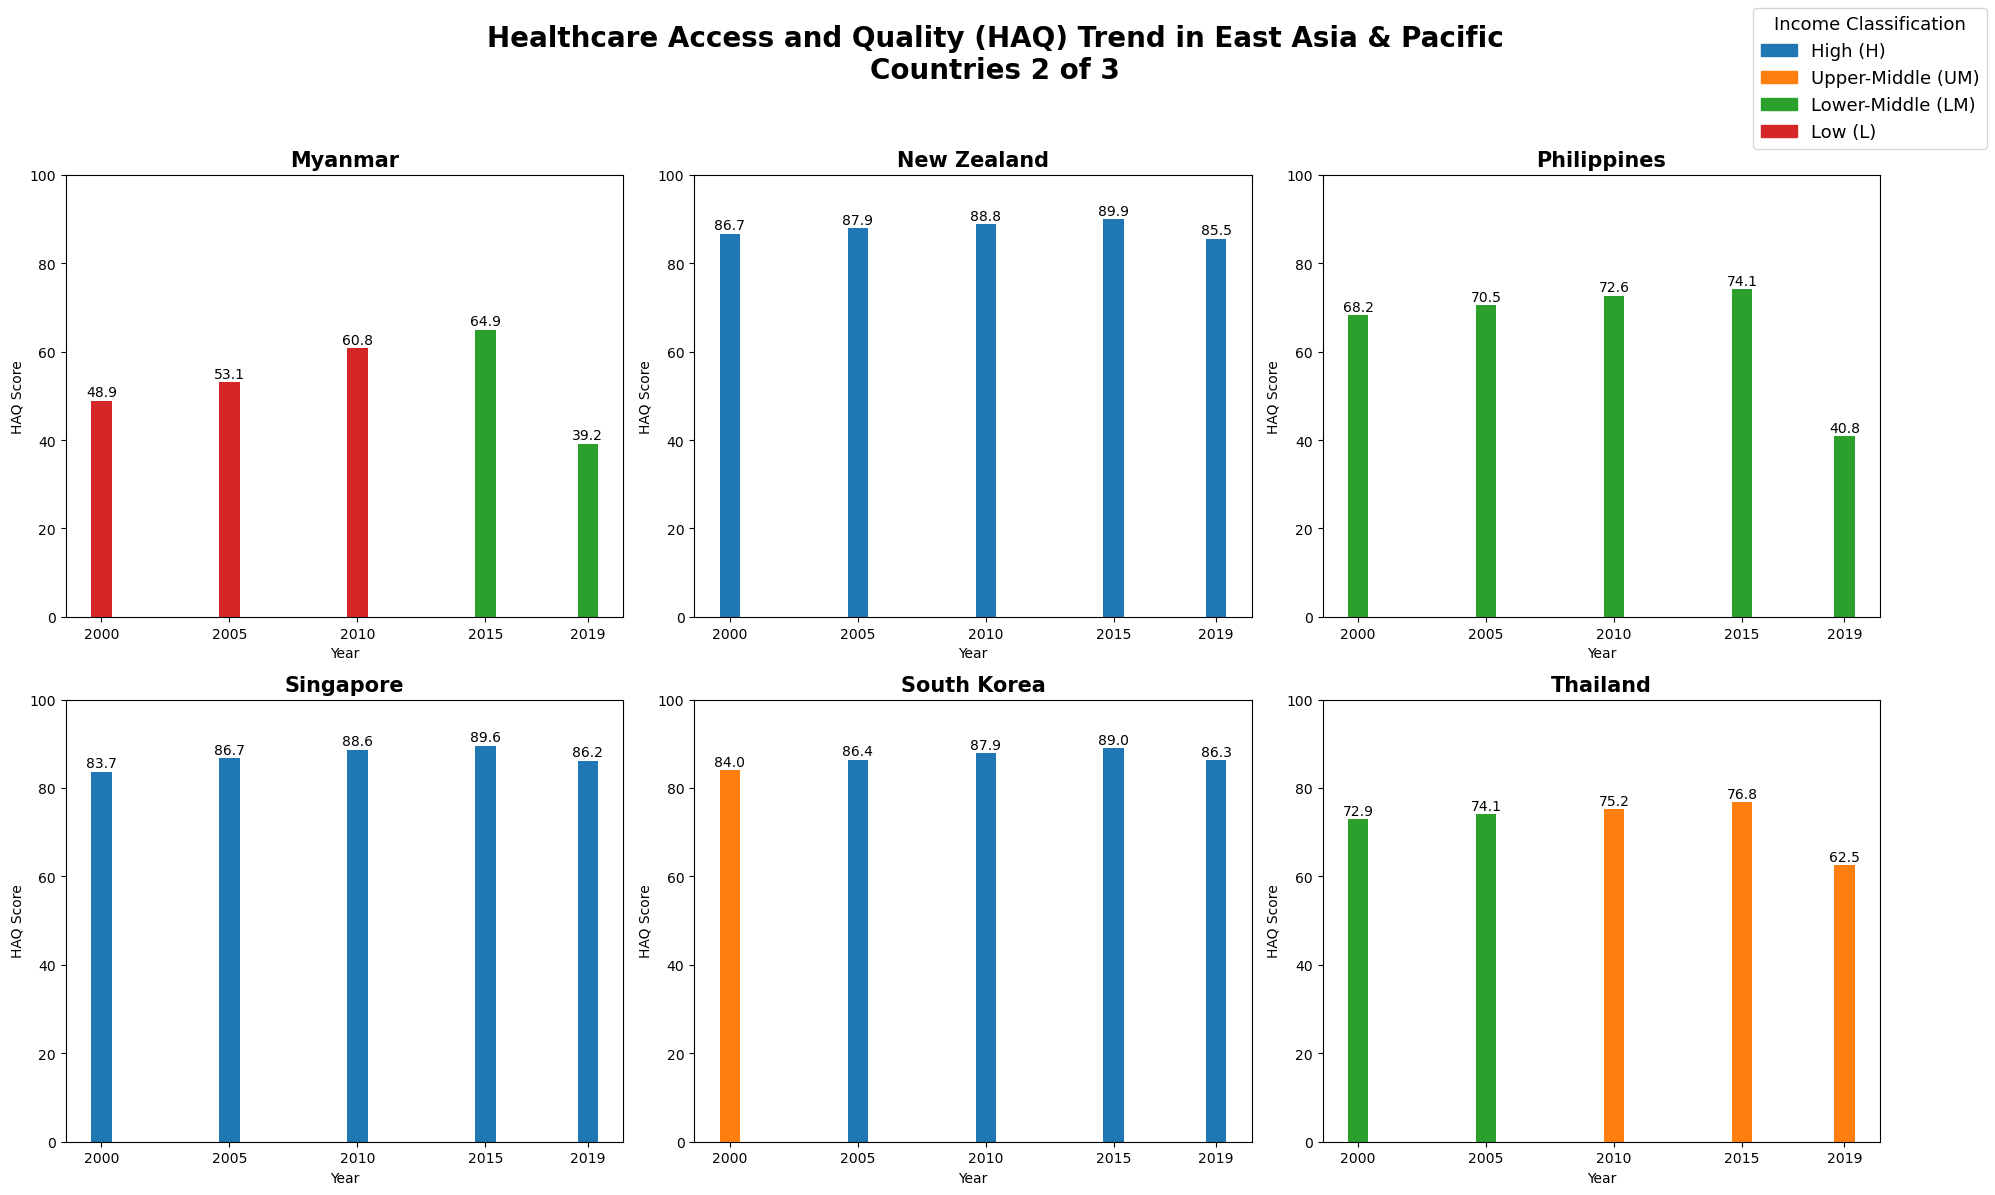

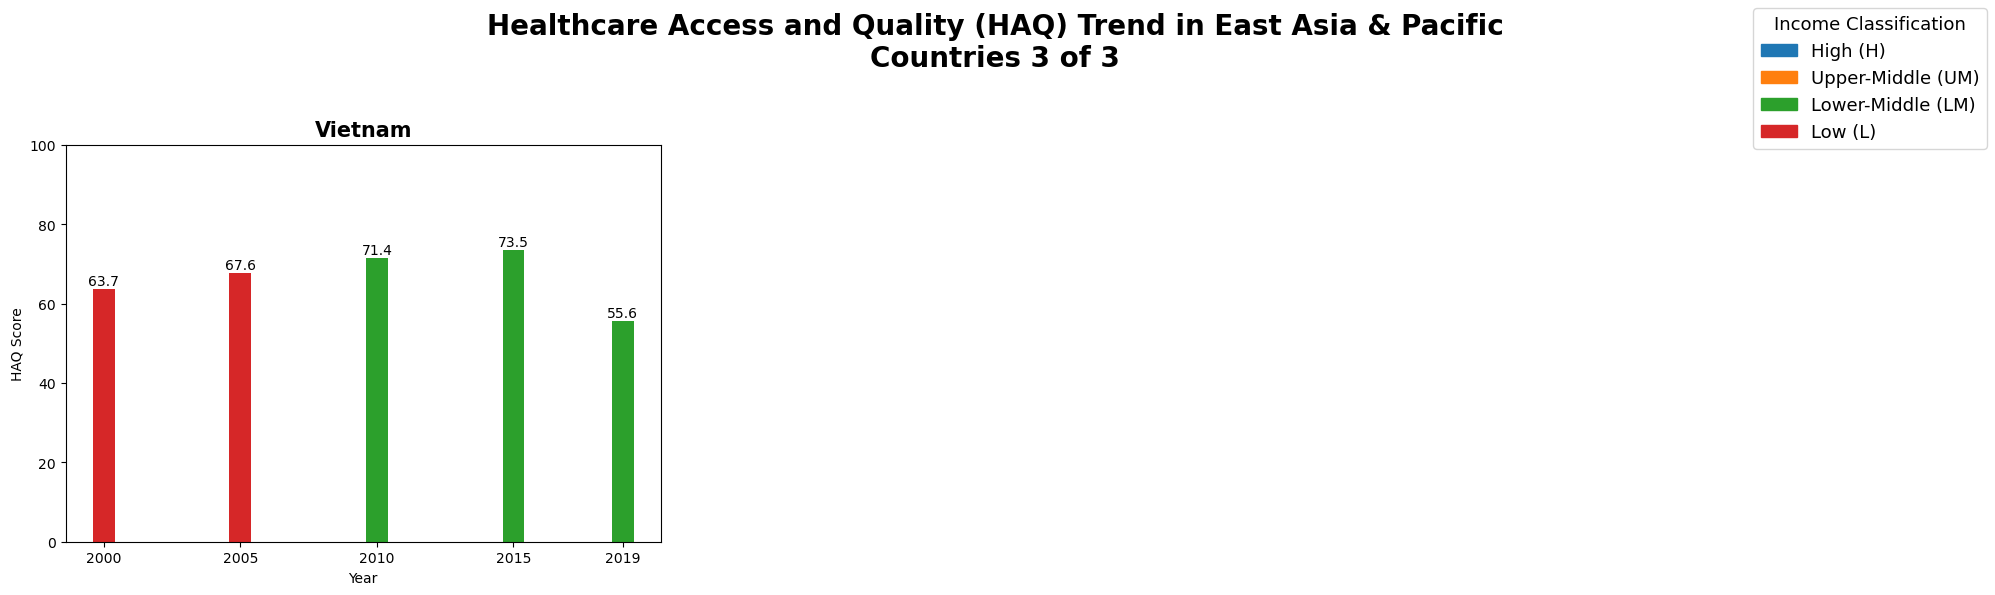

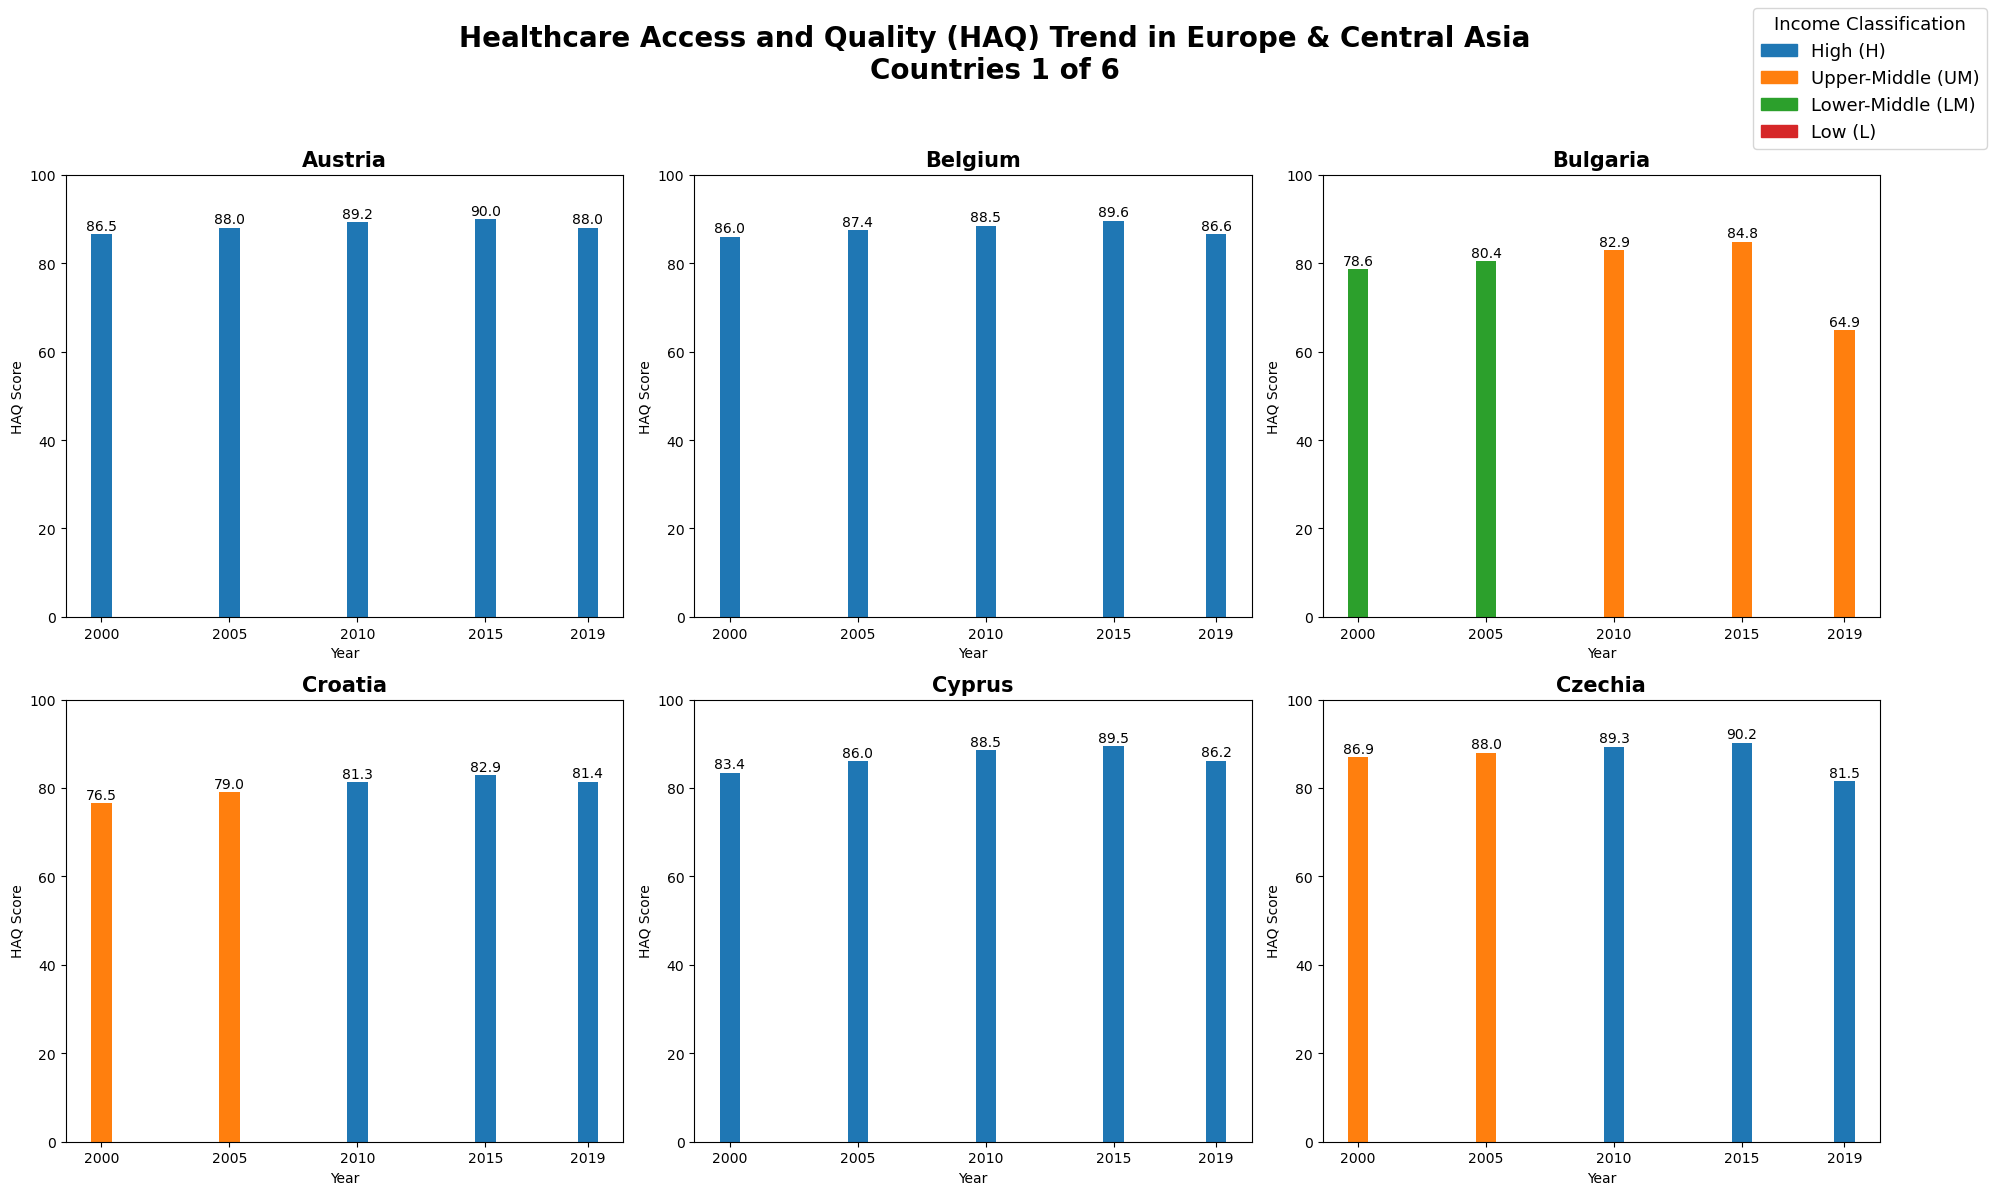

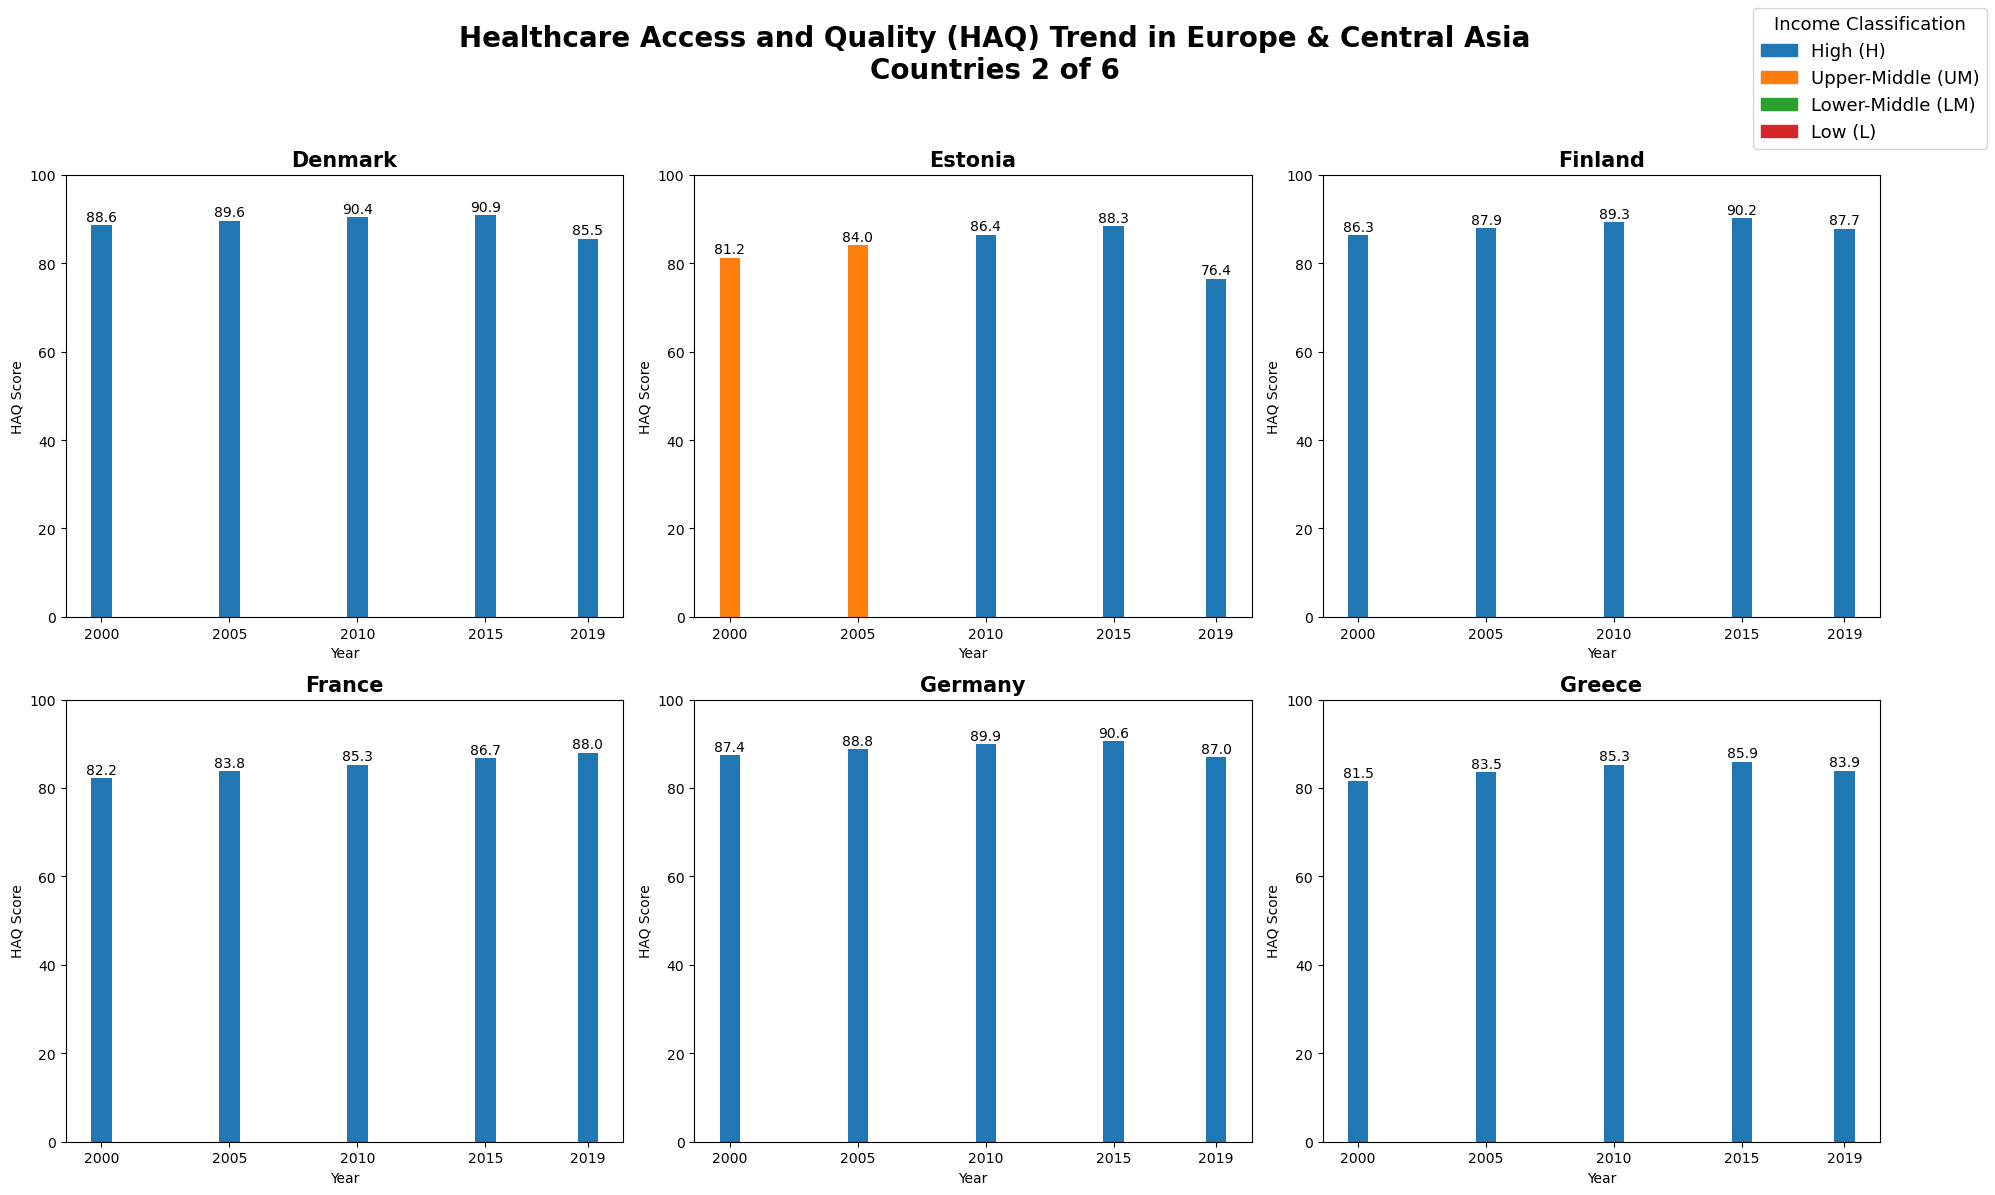

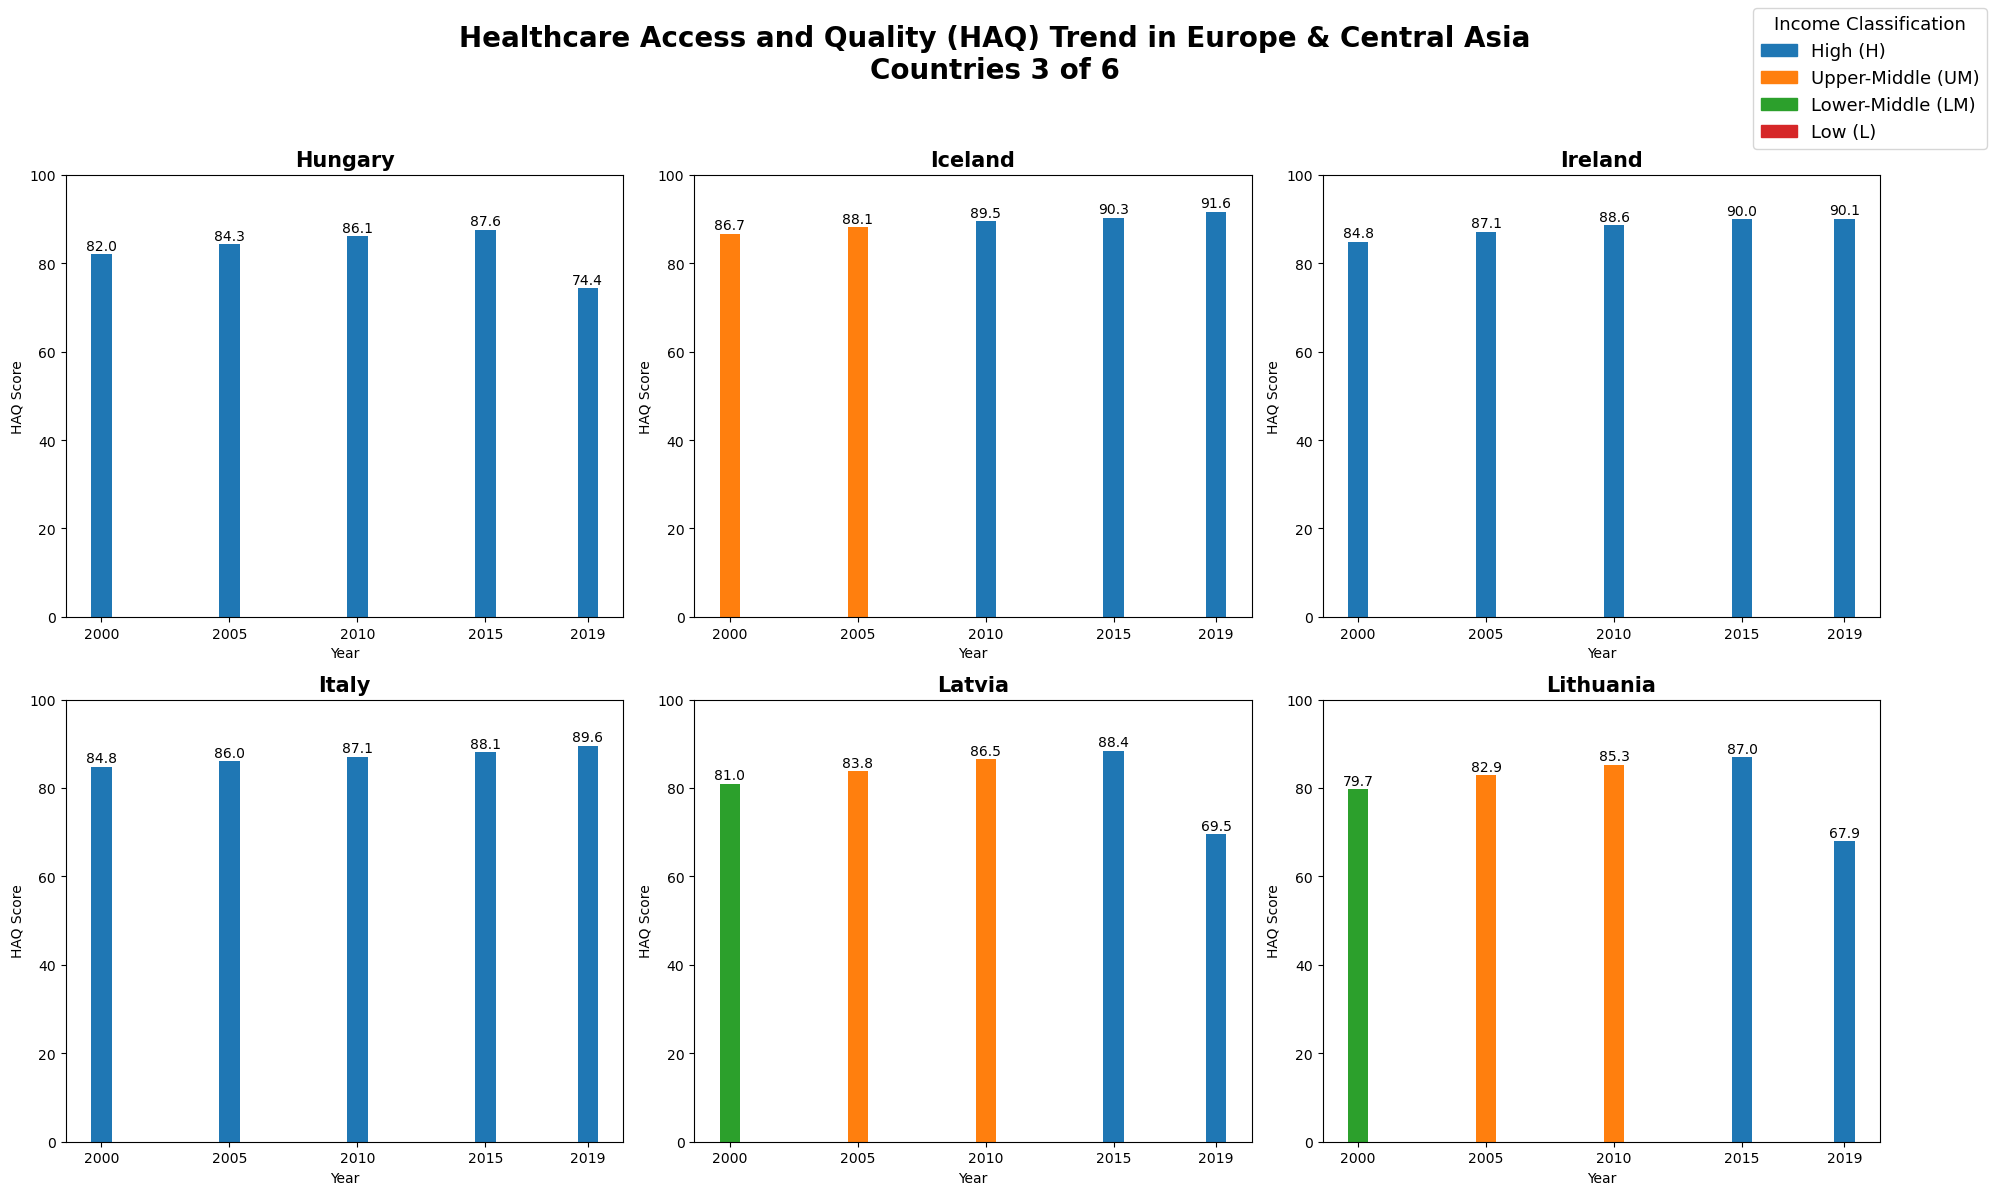

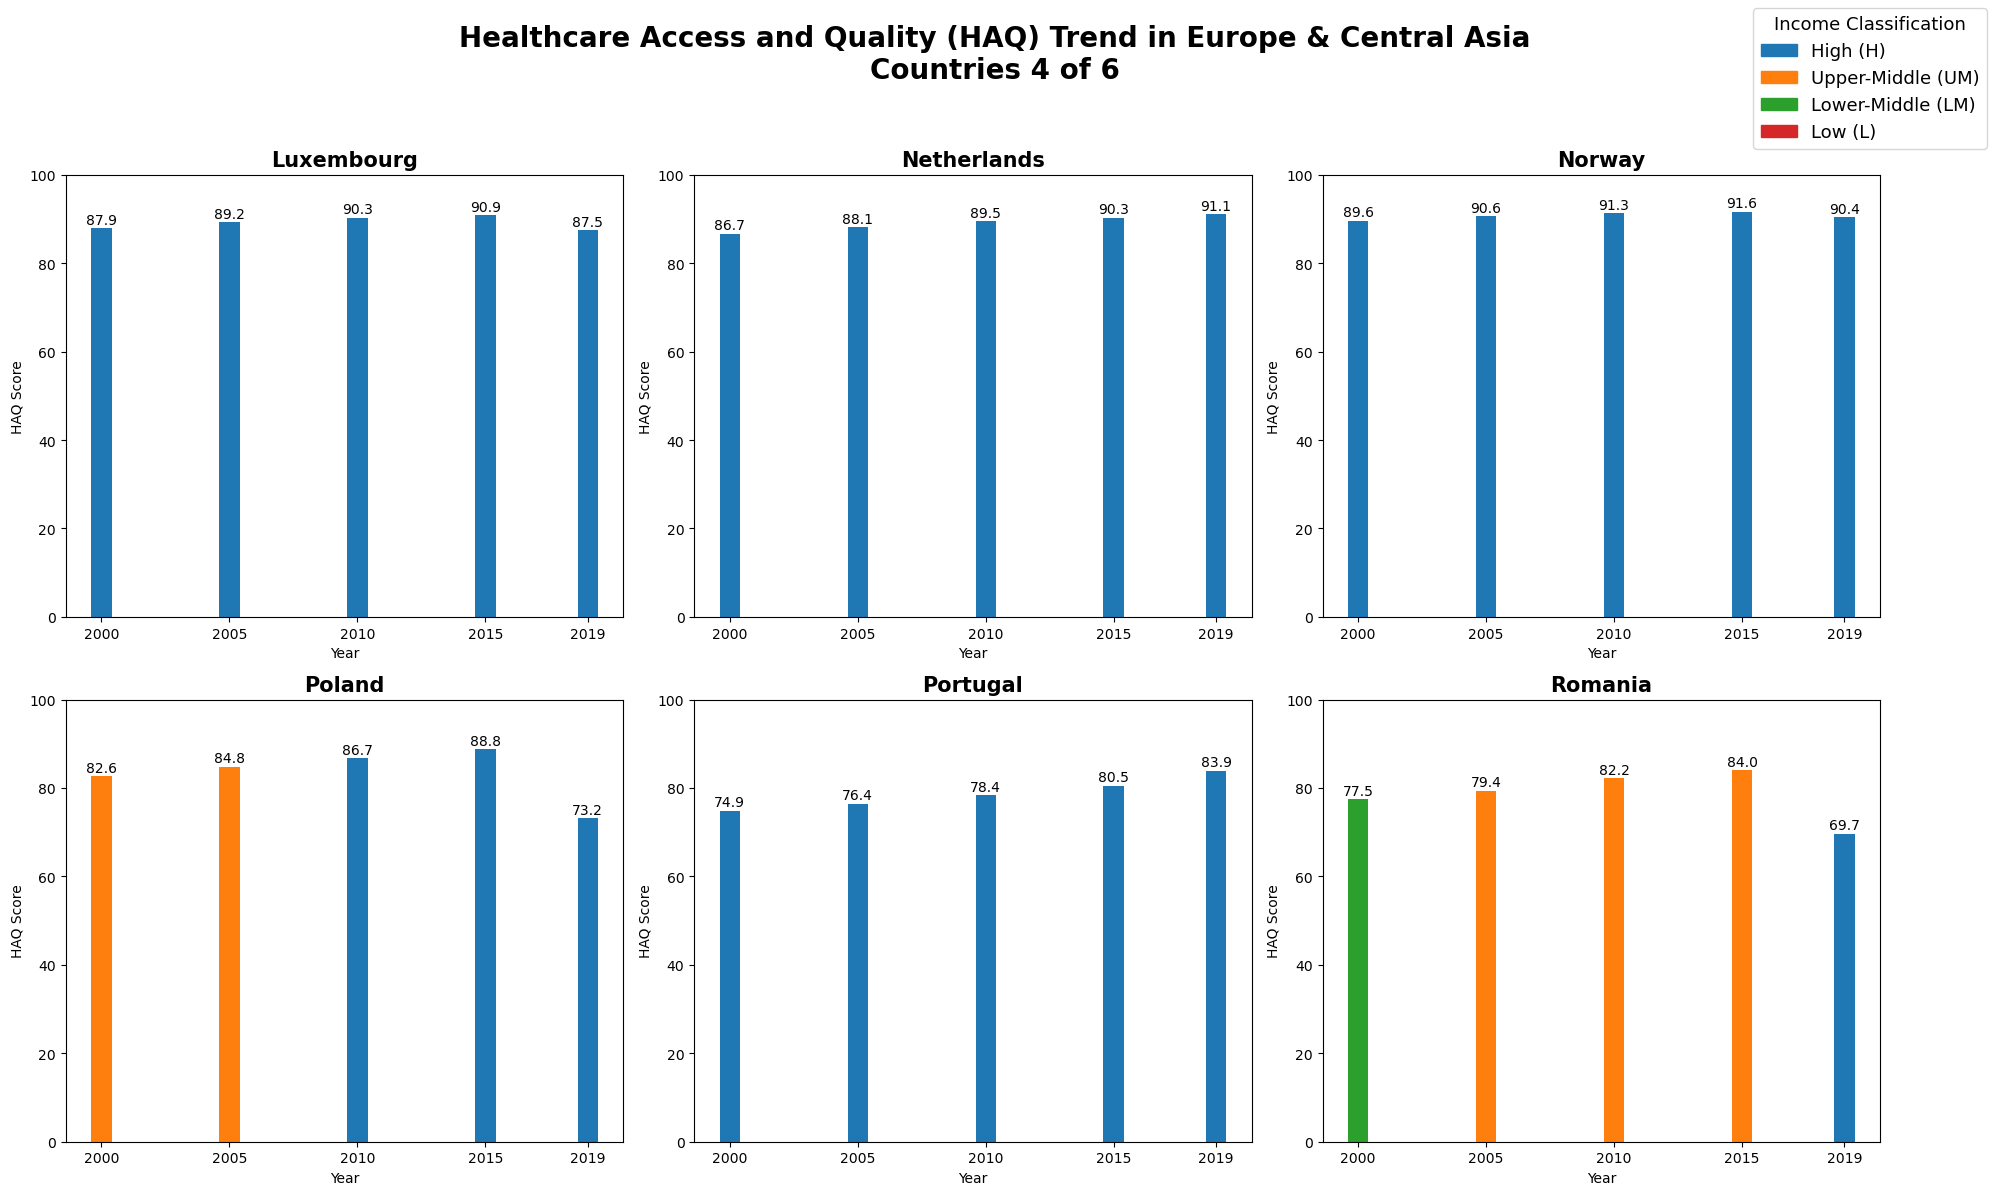

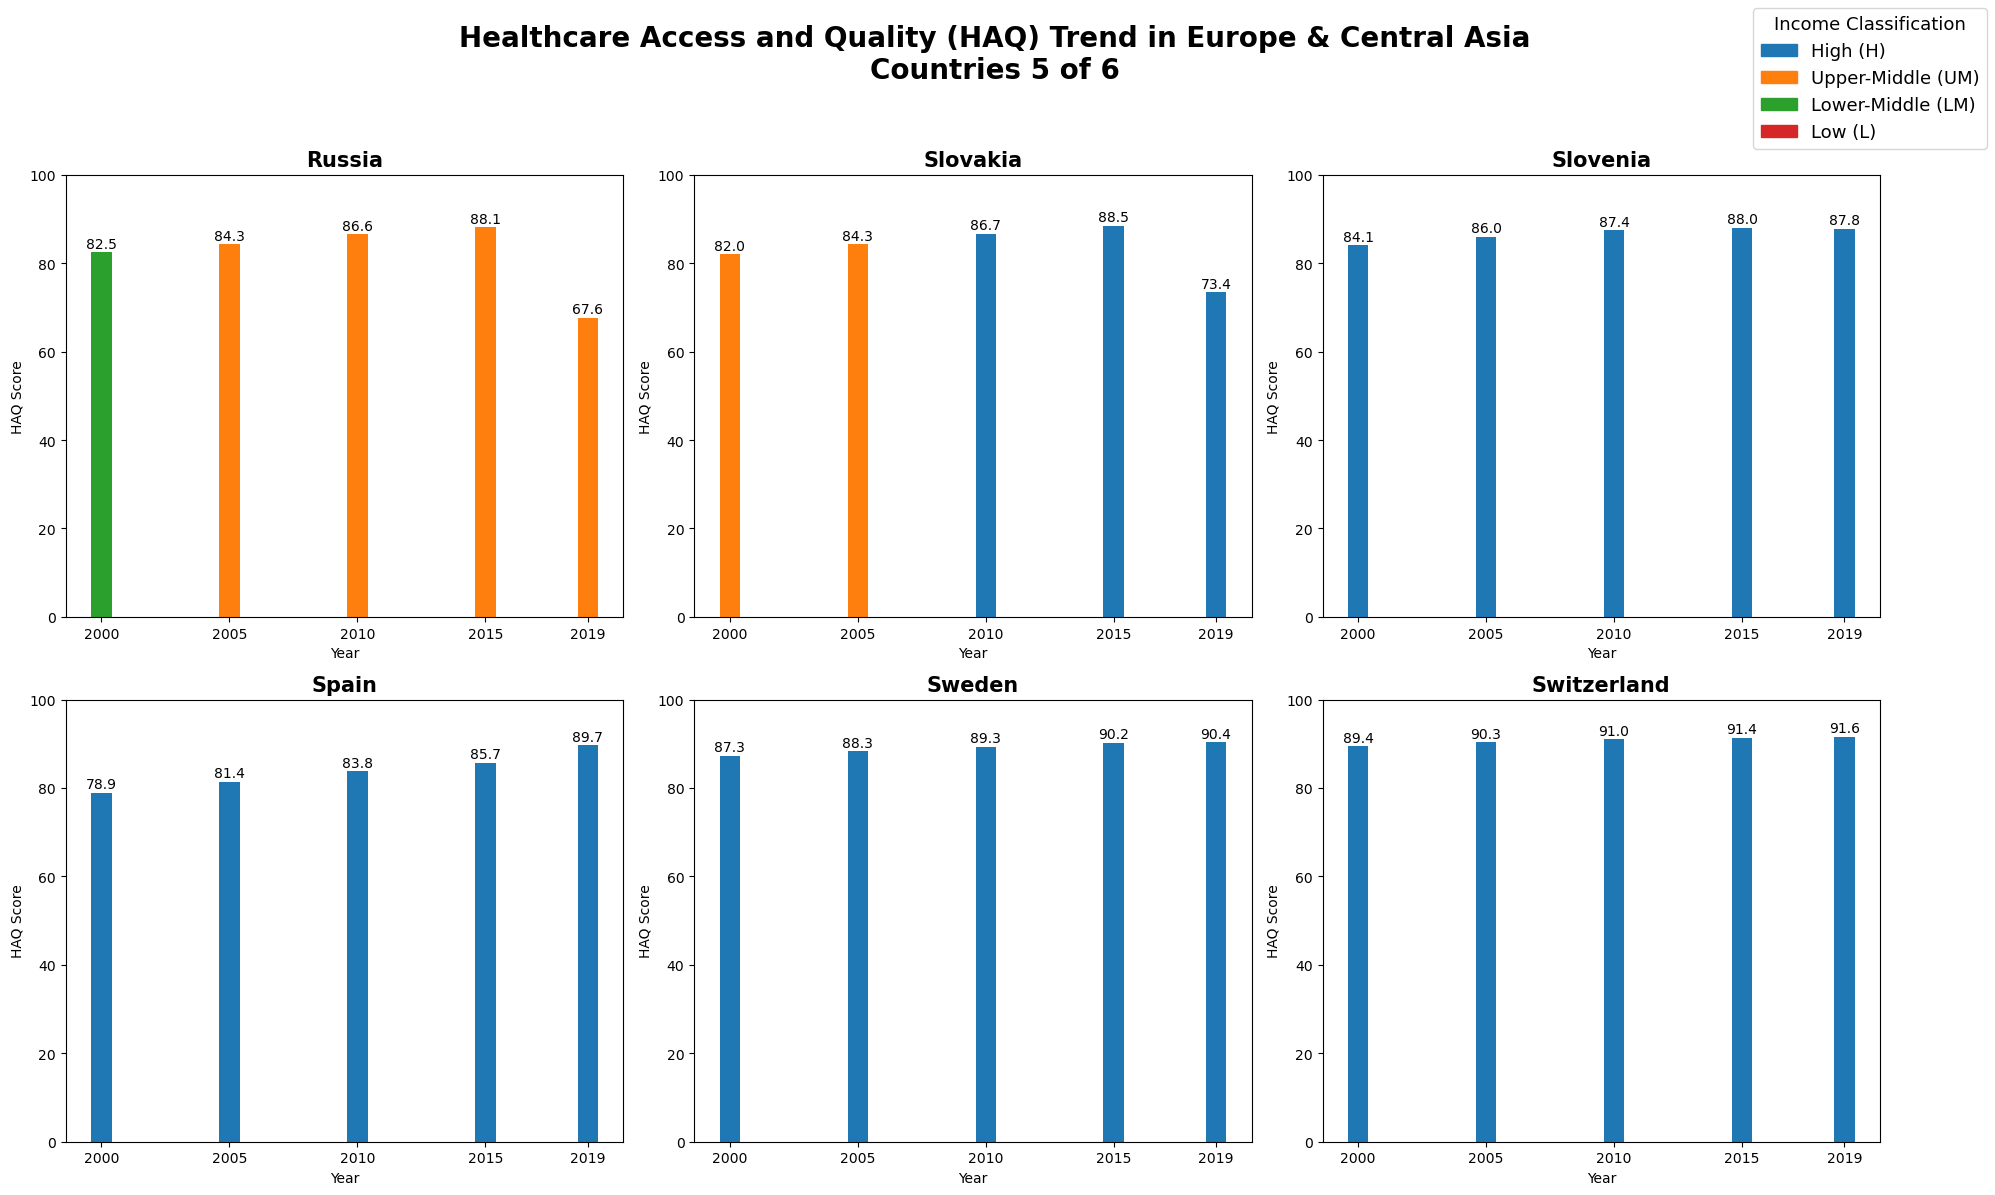

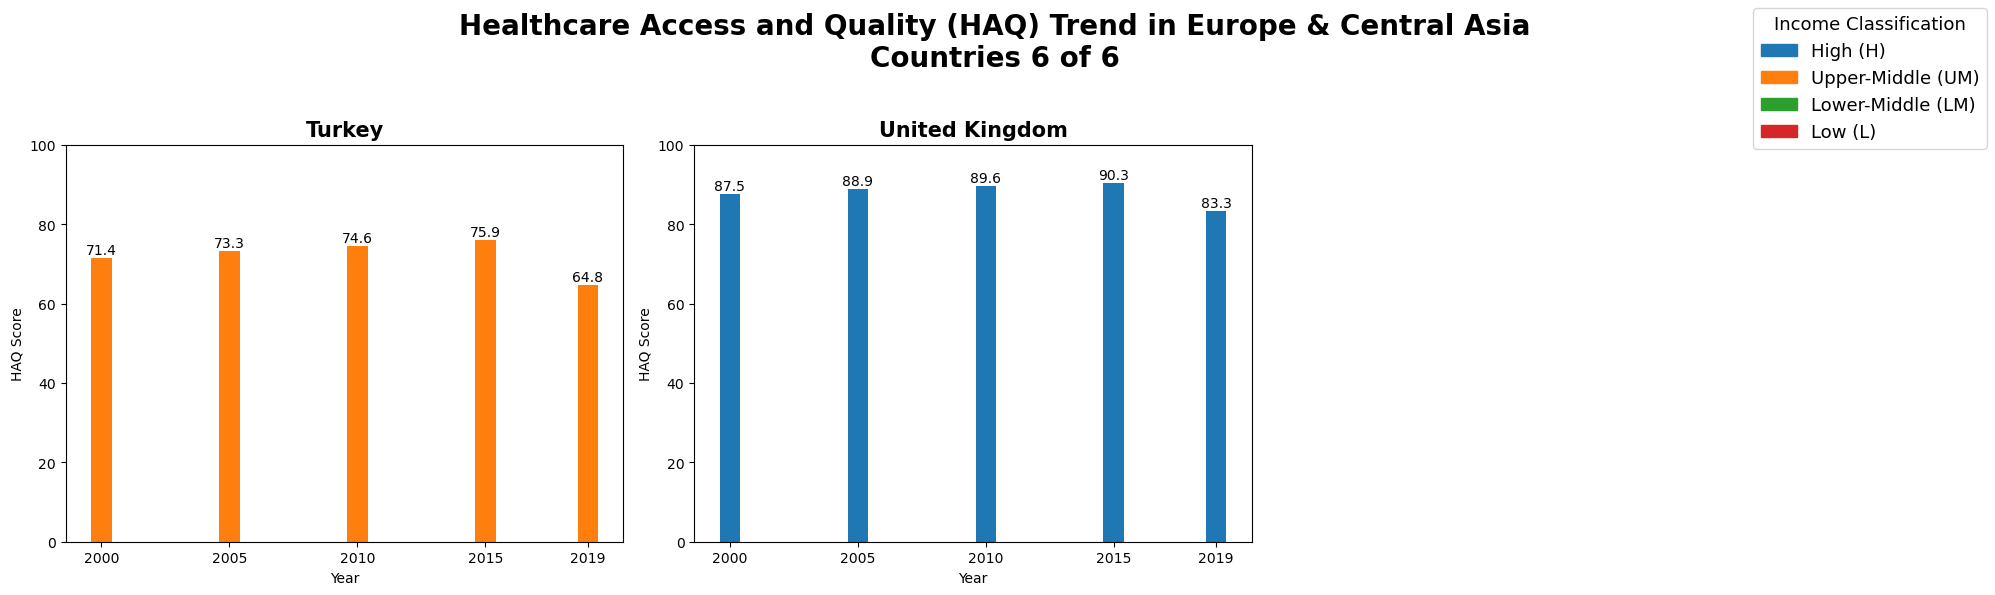

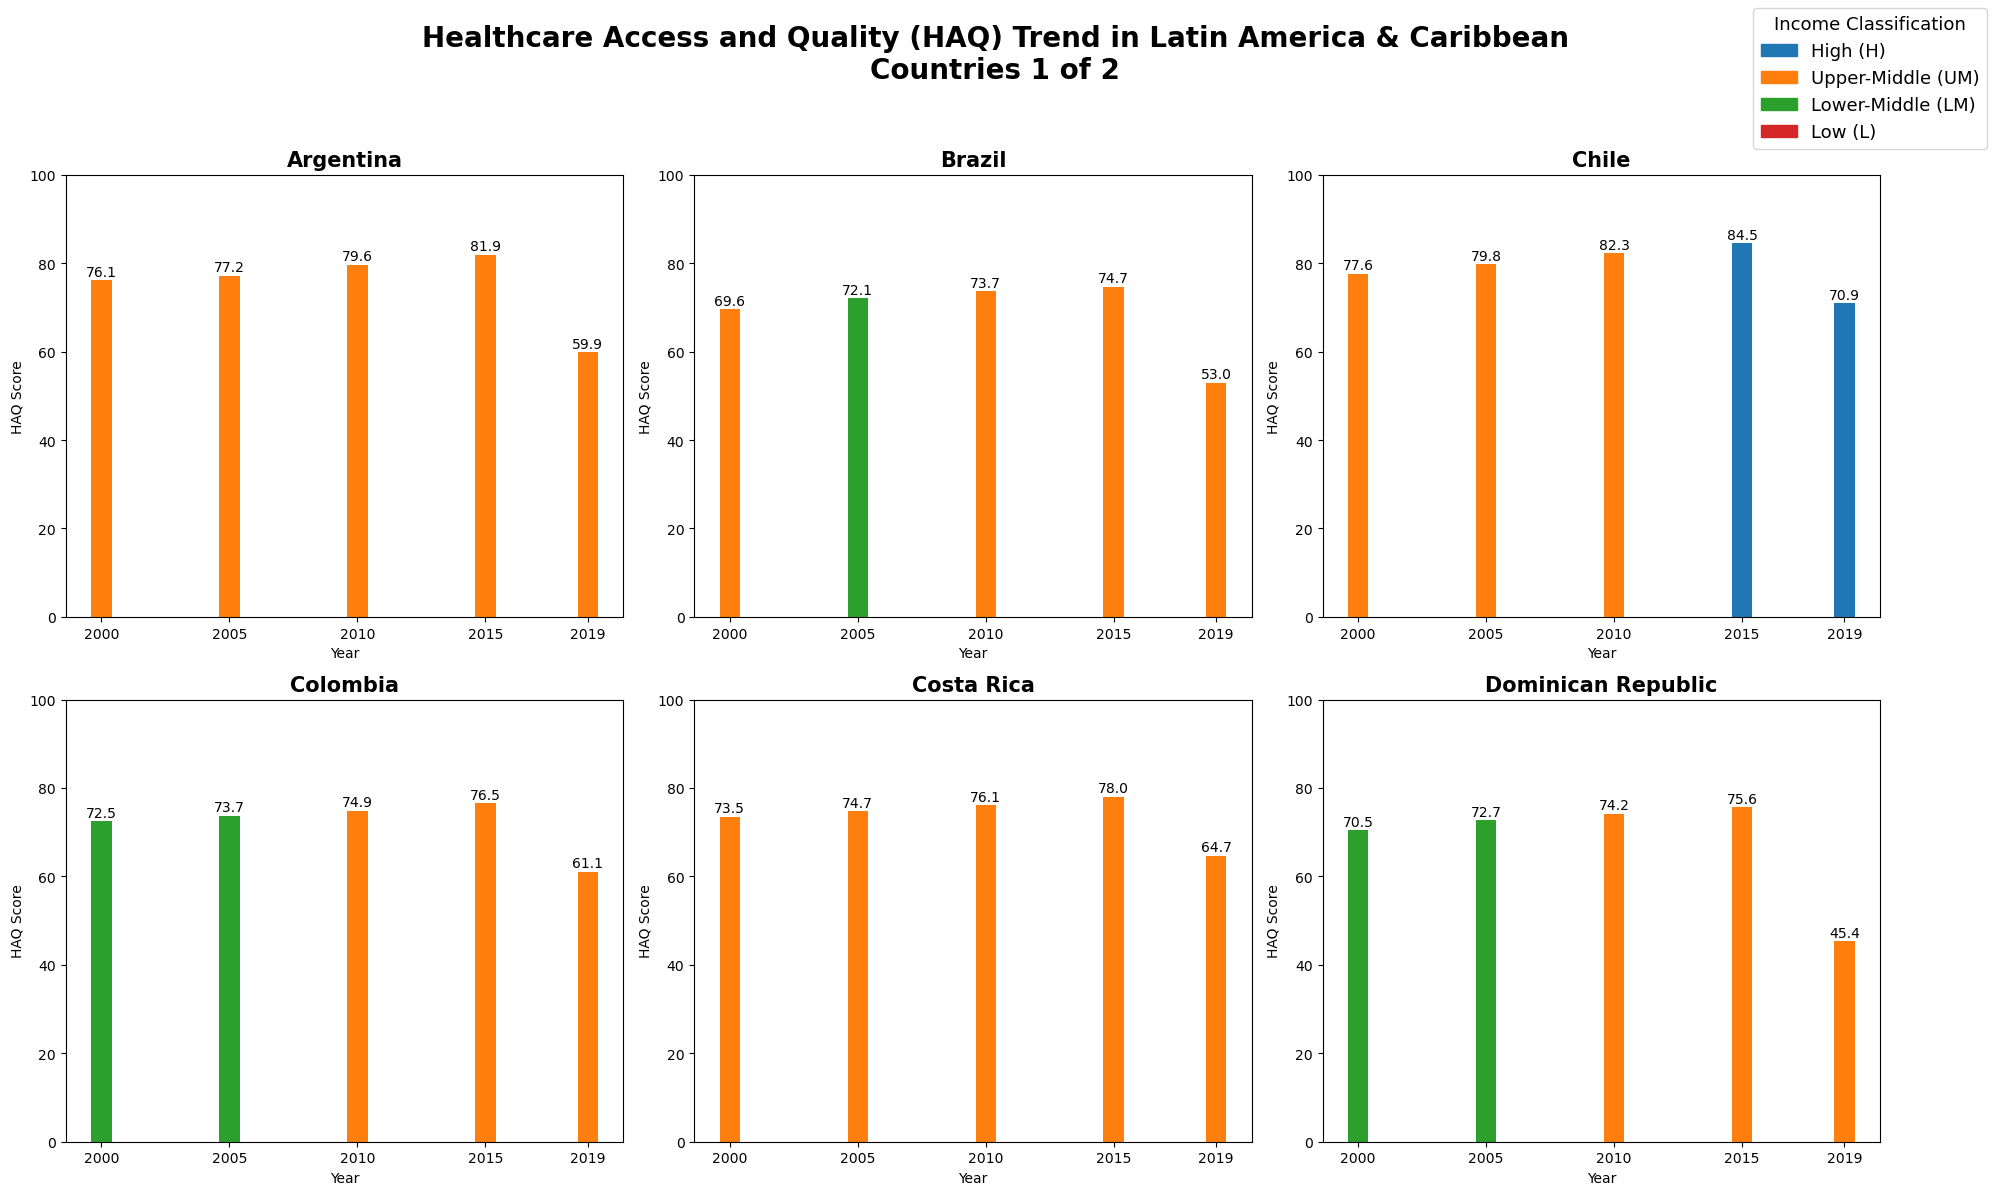

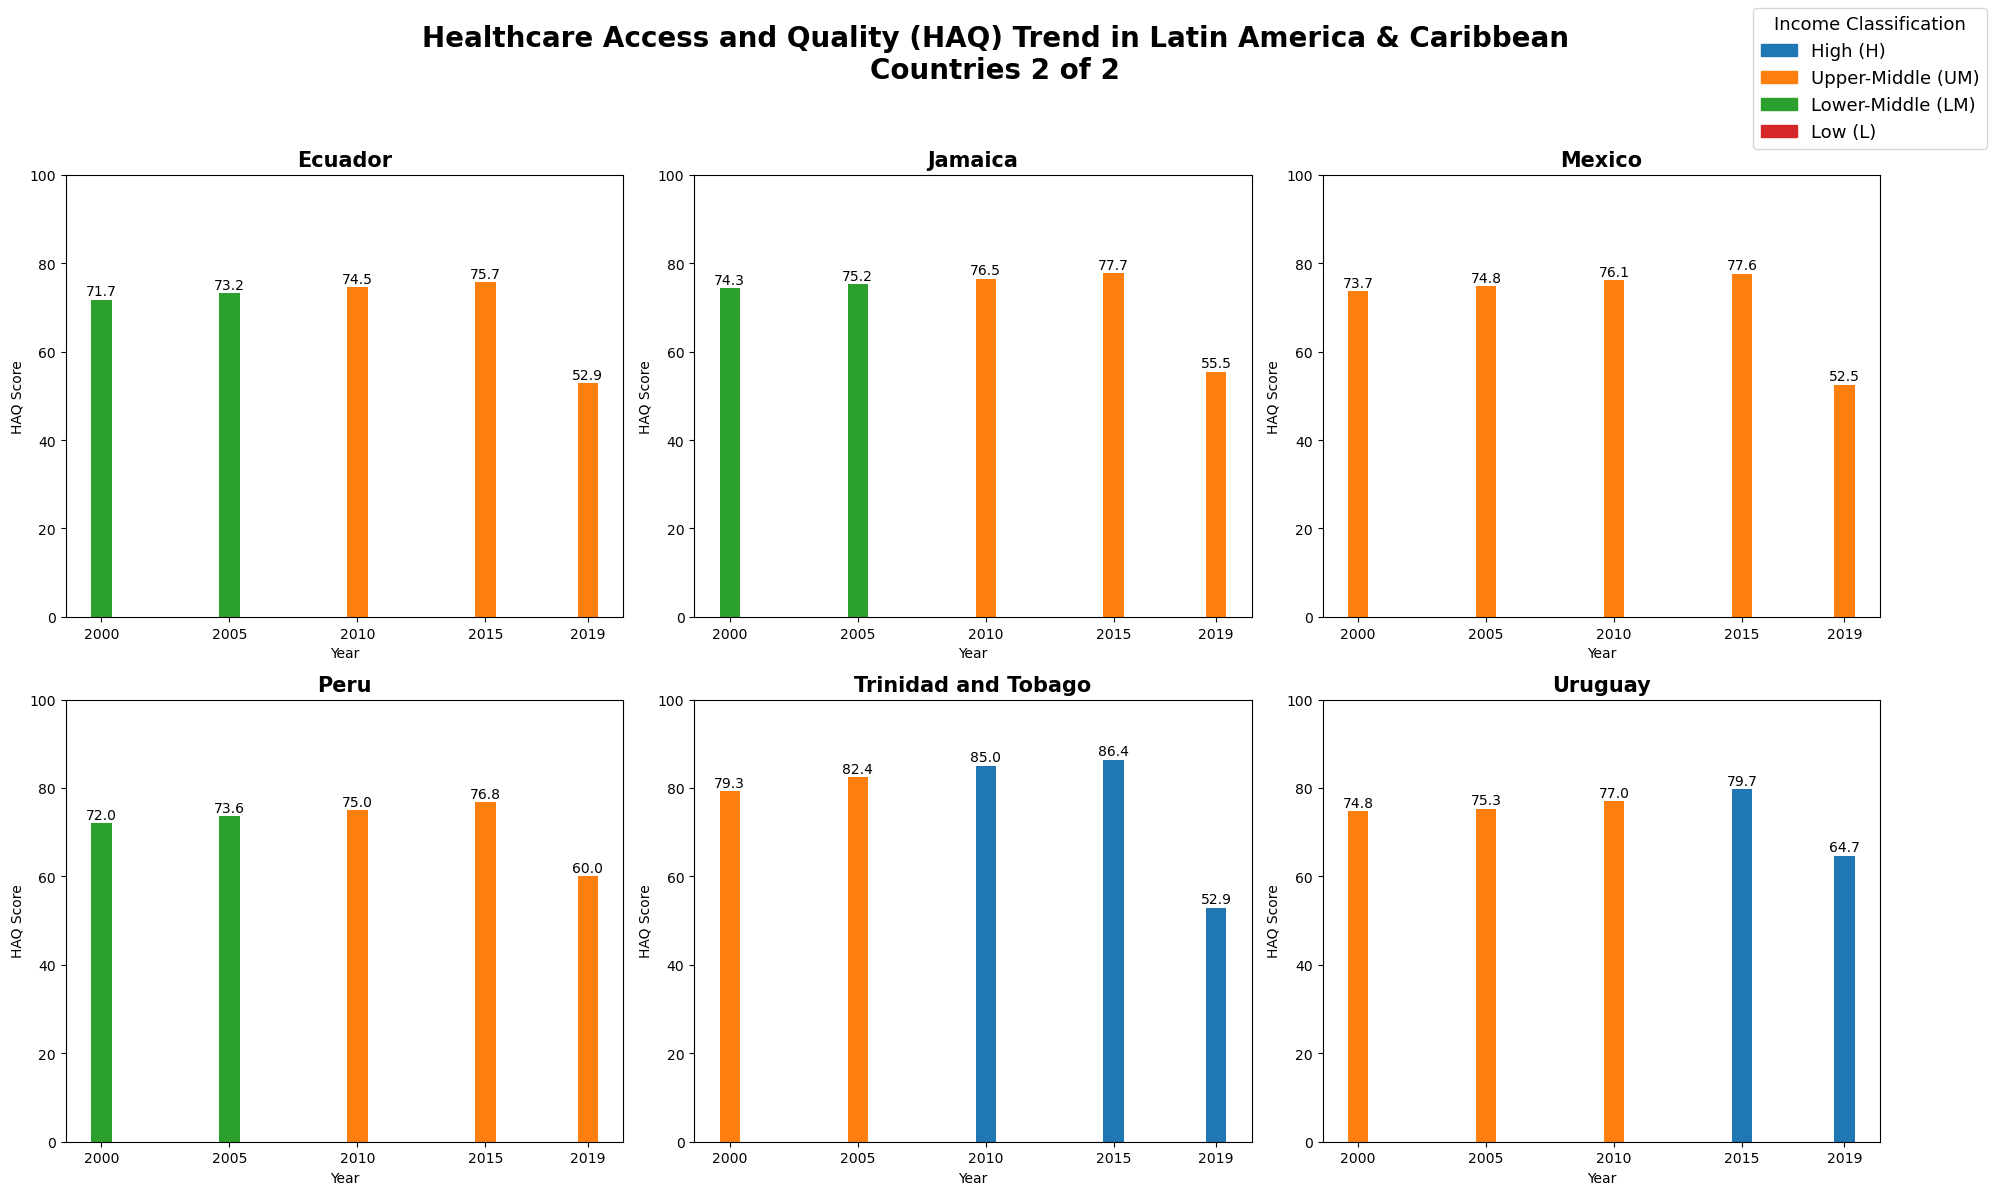

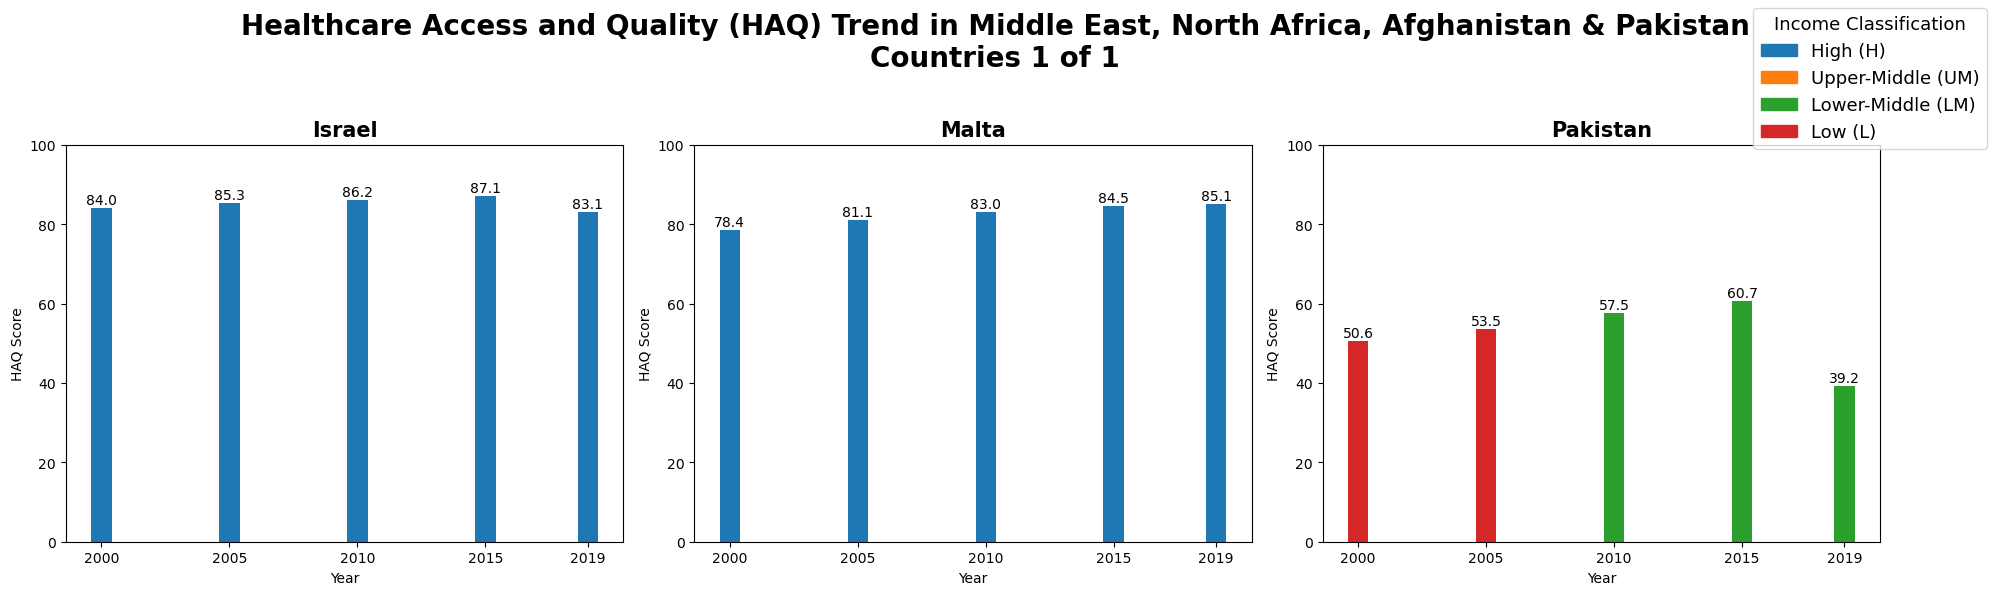

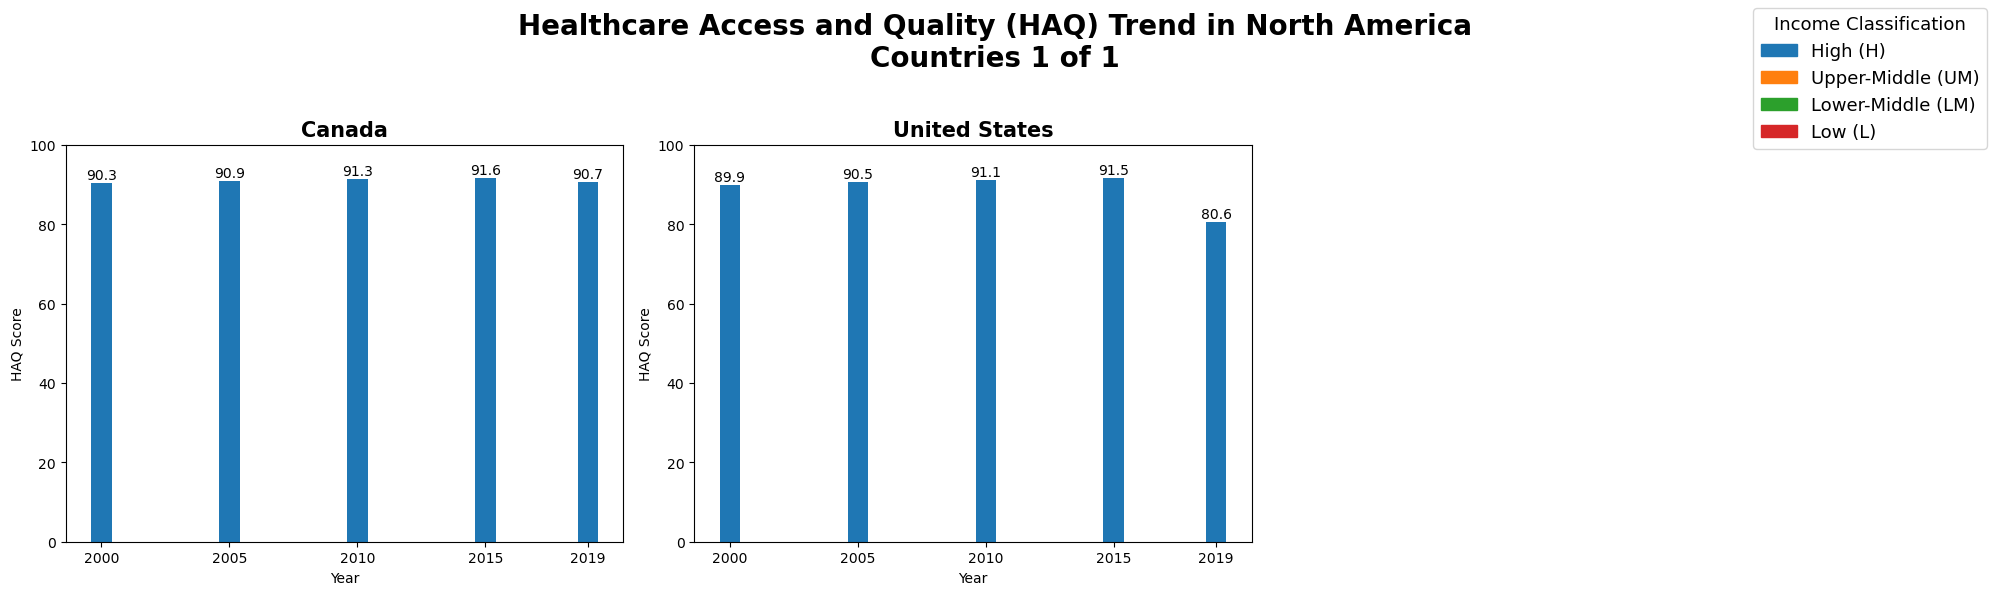

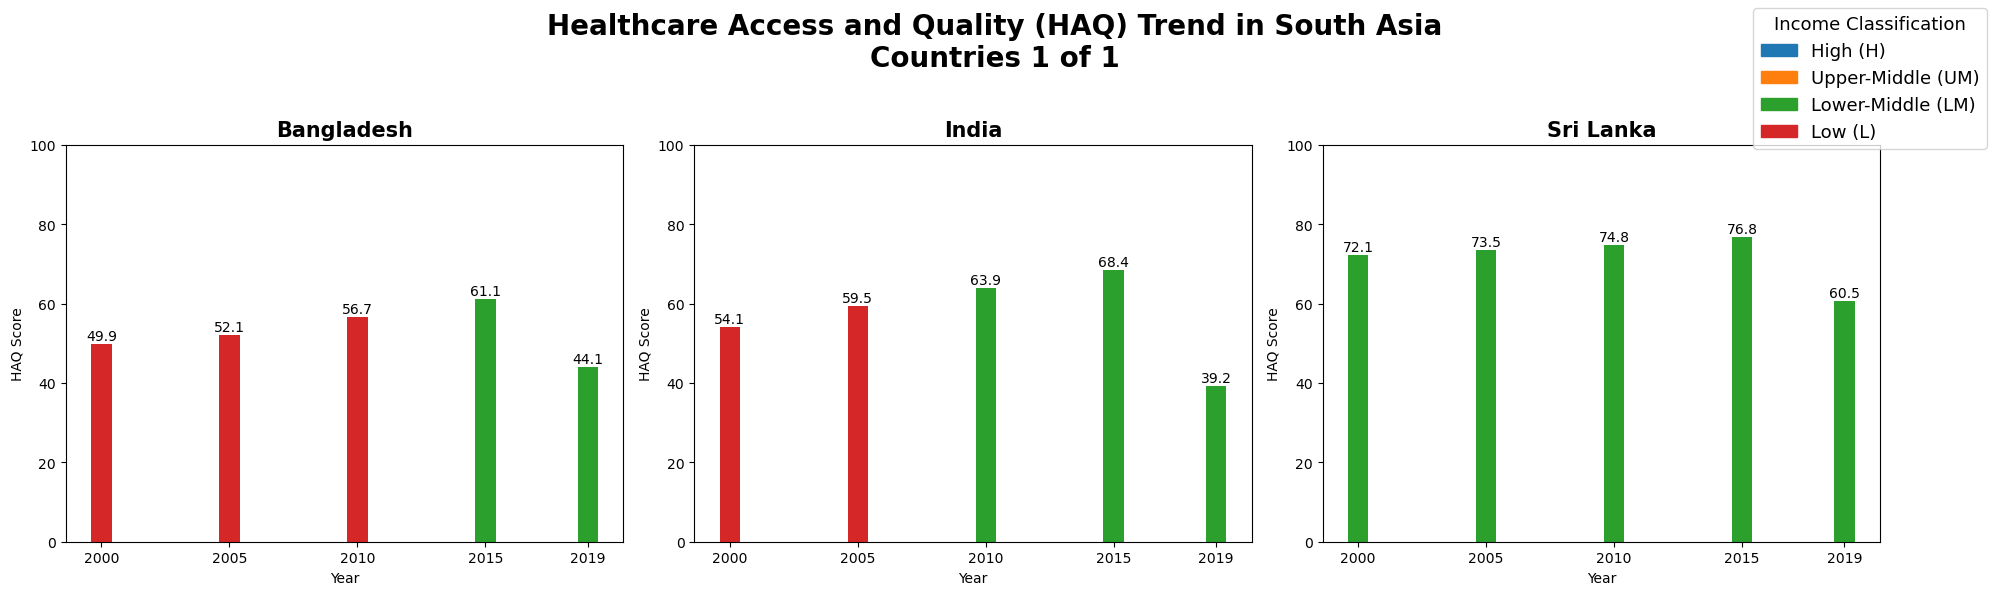

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# Make sure Year is int
df[year_col] = df[year_col].astype(int)

# Fixed years
year_ticks = [2000, 2005, 2010, 2015, 2019]

# Income colors
income_colors = {
    "H": "#1f77b4",
    "UM": "#ff7f0e",
    "LM": "#2ca02c",
    "L": "#d62728"
}

# Replace long names with short ones
clean_income = {
    "High income": "H",
    "Upper middle income": "UM",
    "Lower middle income": "LM",
    "Low income": "L"
}

df[income_col] = df[income_col].replace(clean_income)

# Regions list
regions = sorted(df[region_col].dropna().unique())

# ---------------------------------------------------
# MAIN LOOP
# ---------------------------------------------------
for region in regions:

    df_r = df[df[region_col] == region]
    countries = sorted(df_r[country_col].unique())

    # Split into groups of 6 countries
    chunk_size = 6
    country_groups = [countries[i:i + chunk_size] for i in range(0, len(countries), chunk_size)]

    # Loop each chunk
    for group_idx, group in enumerate(country_groups, start=1):

        n_countries = len(group)
        cols = 3
        rows = math.ceil(n_countries / cols)

        fig, axes = plt.subplots(rows, cols, figsize=(20, 6 * rows))
        axes = axes.flatten()

        fig.suptitle(
            f"Healthcare Access and Quality (HAQ) Trend in {region}\nCountries {group_idx} of {len(country_groups)}",
            fontsize=20, weight='bold', y=0.98
        )

        # -------------------------------
        # Plot per country
        # -------------------------------
        for i, country in enumerate(group):

            ax = axes[i]

            df_c = df_r[df_r[country_col] == country].sort_values(year_col)
            years = df_c[year_col]
            haq_values = df_c[haq_col]

            # Colors per income
            bar_colors = df_c[income_col].map(income_colors).fillna("gray")

            ax.bar(years, haq_values, color=bar_colors)

            # Value labels
            for x, y in zip(years, haq_values):
                ax.text(x, y + 1, f"{y:.1f}", ha='center', fontsize=10)

            ax.set_title(country, fontsize=15, weight='bold')
            ax.set_ylim(0, 100)

            # Fixed x-ticks
            ax.set_xticks(year_ticks)
            ax.set_xticklabels(
                [str(y) if y in years.values else "" for y in year_ticks],
                fontsize=10
            )

            ax.set_xlabel("Year")
            ax.set_ylabel("HAQ Score")

        # Remove unused axes
        for j in range(i + 1, rows * cols):
            fig.delaxes(axes[j])

        # Legend
        handles = [plt.Rectangle((0,0),1,1, color=income_colors[k]) for k in income_colors]
        labels = ["High (H)", "Upper-Middle (UM)", "Lower-Middle (LM)", "Low (L)"]

        fig.legend(
            handles, labels,
            title="Income Classification",
            loc="upper right", fontsize=13, title_fontsize=13
        )

        plt.tight_layout(rect=[0, 0, 0.95, 0.95])

        # Save file per group
        filename = f"haqbar_w_region_income_{region.replace(' ', '_')}_part{group_idx}.png"
        plt.savefig(filename, dpi=300, bbox_inches="tight")
        plt.show()


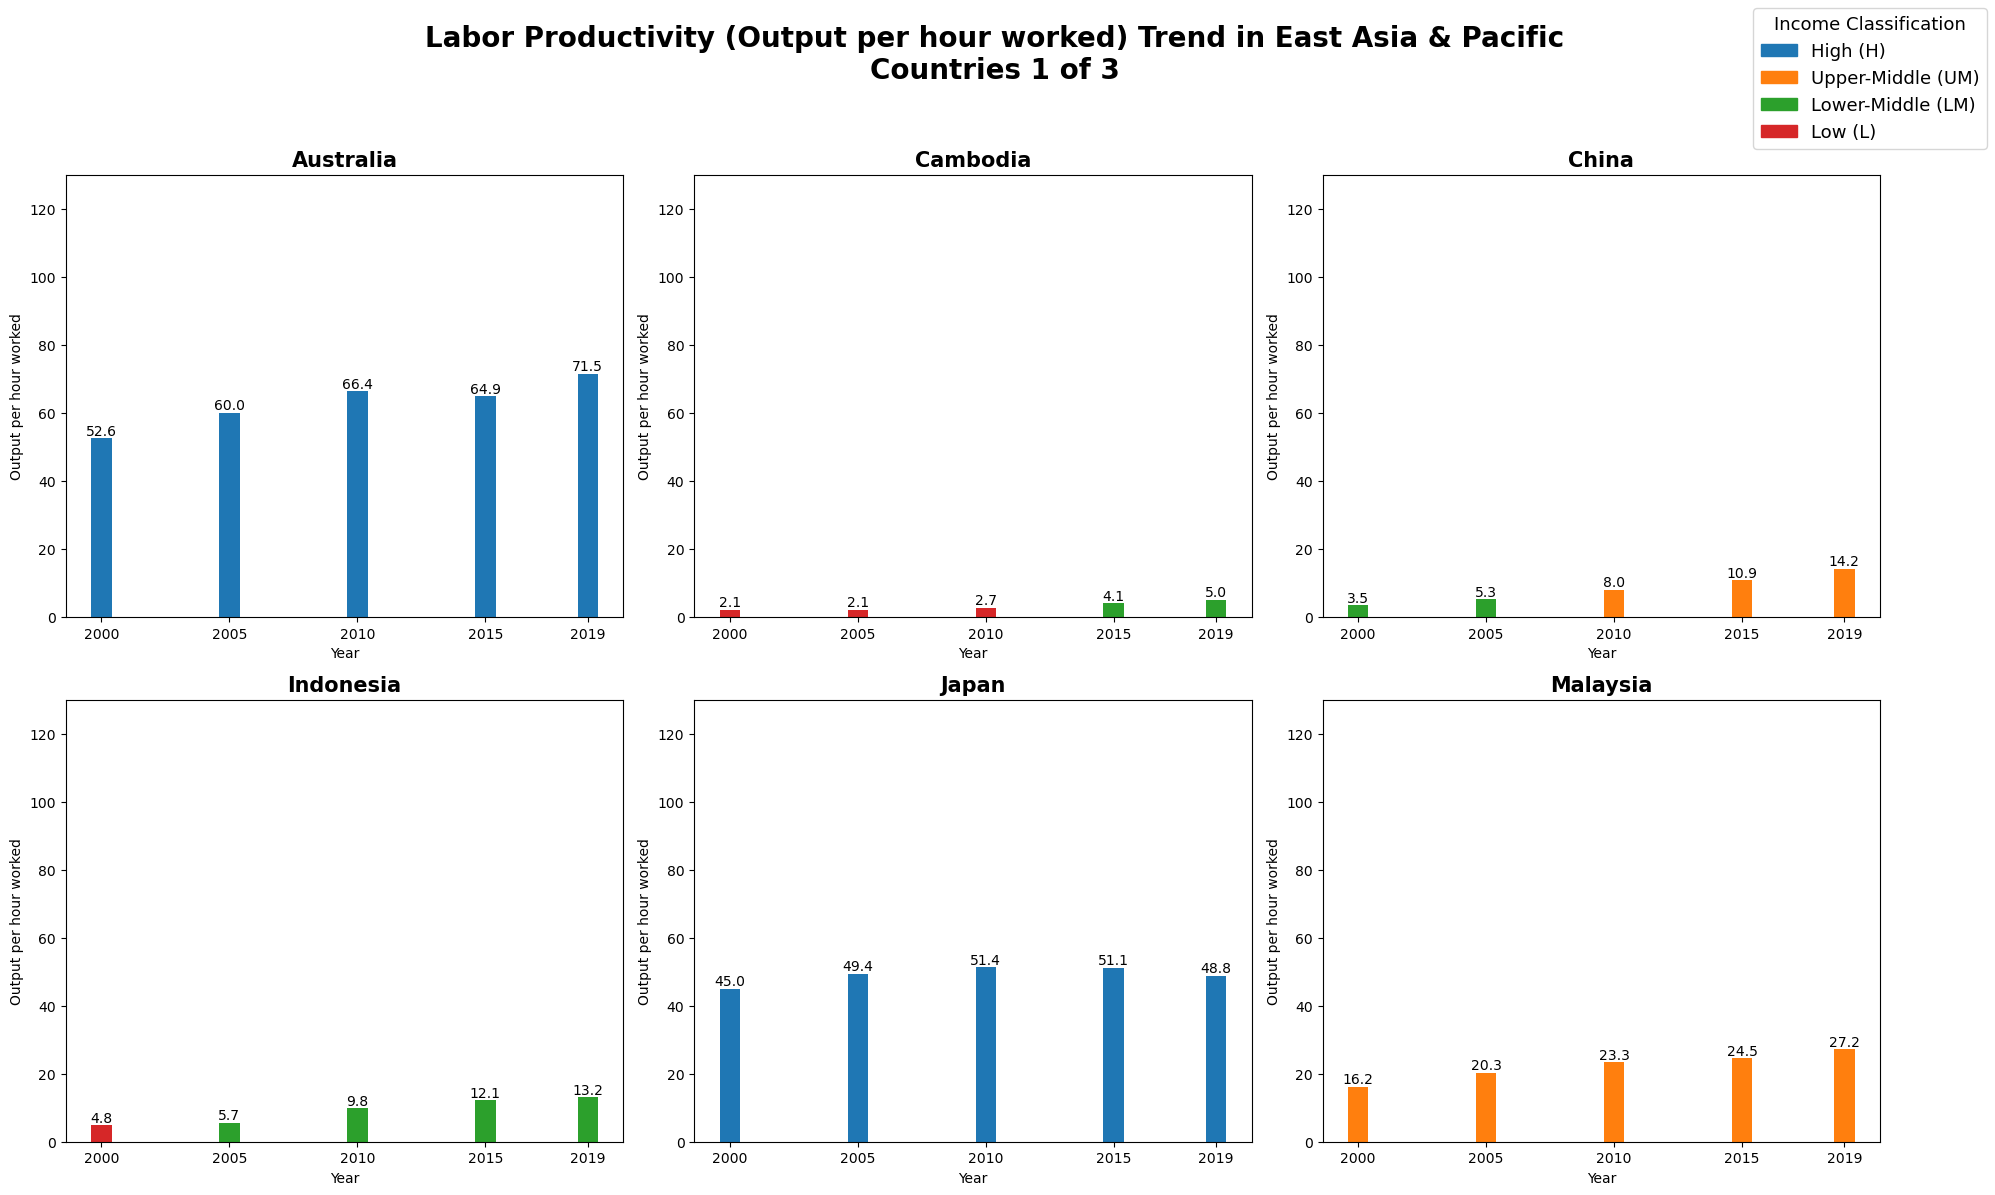

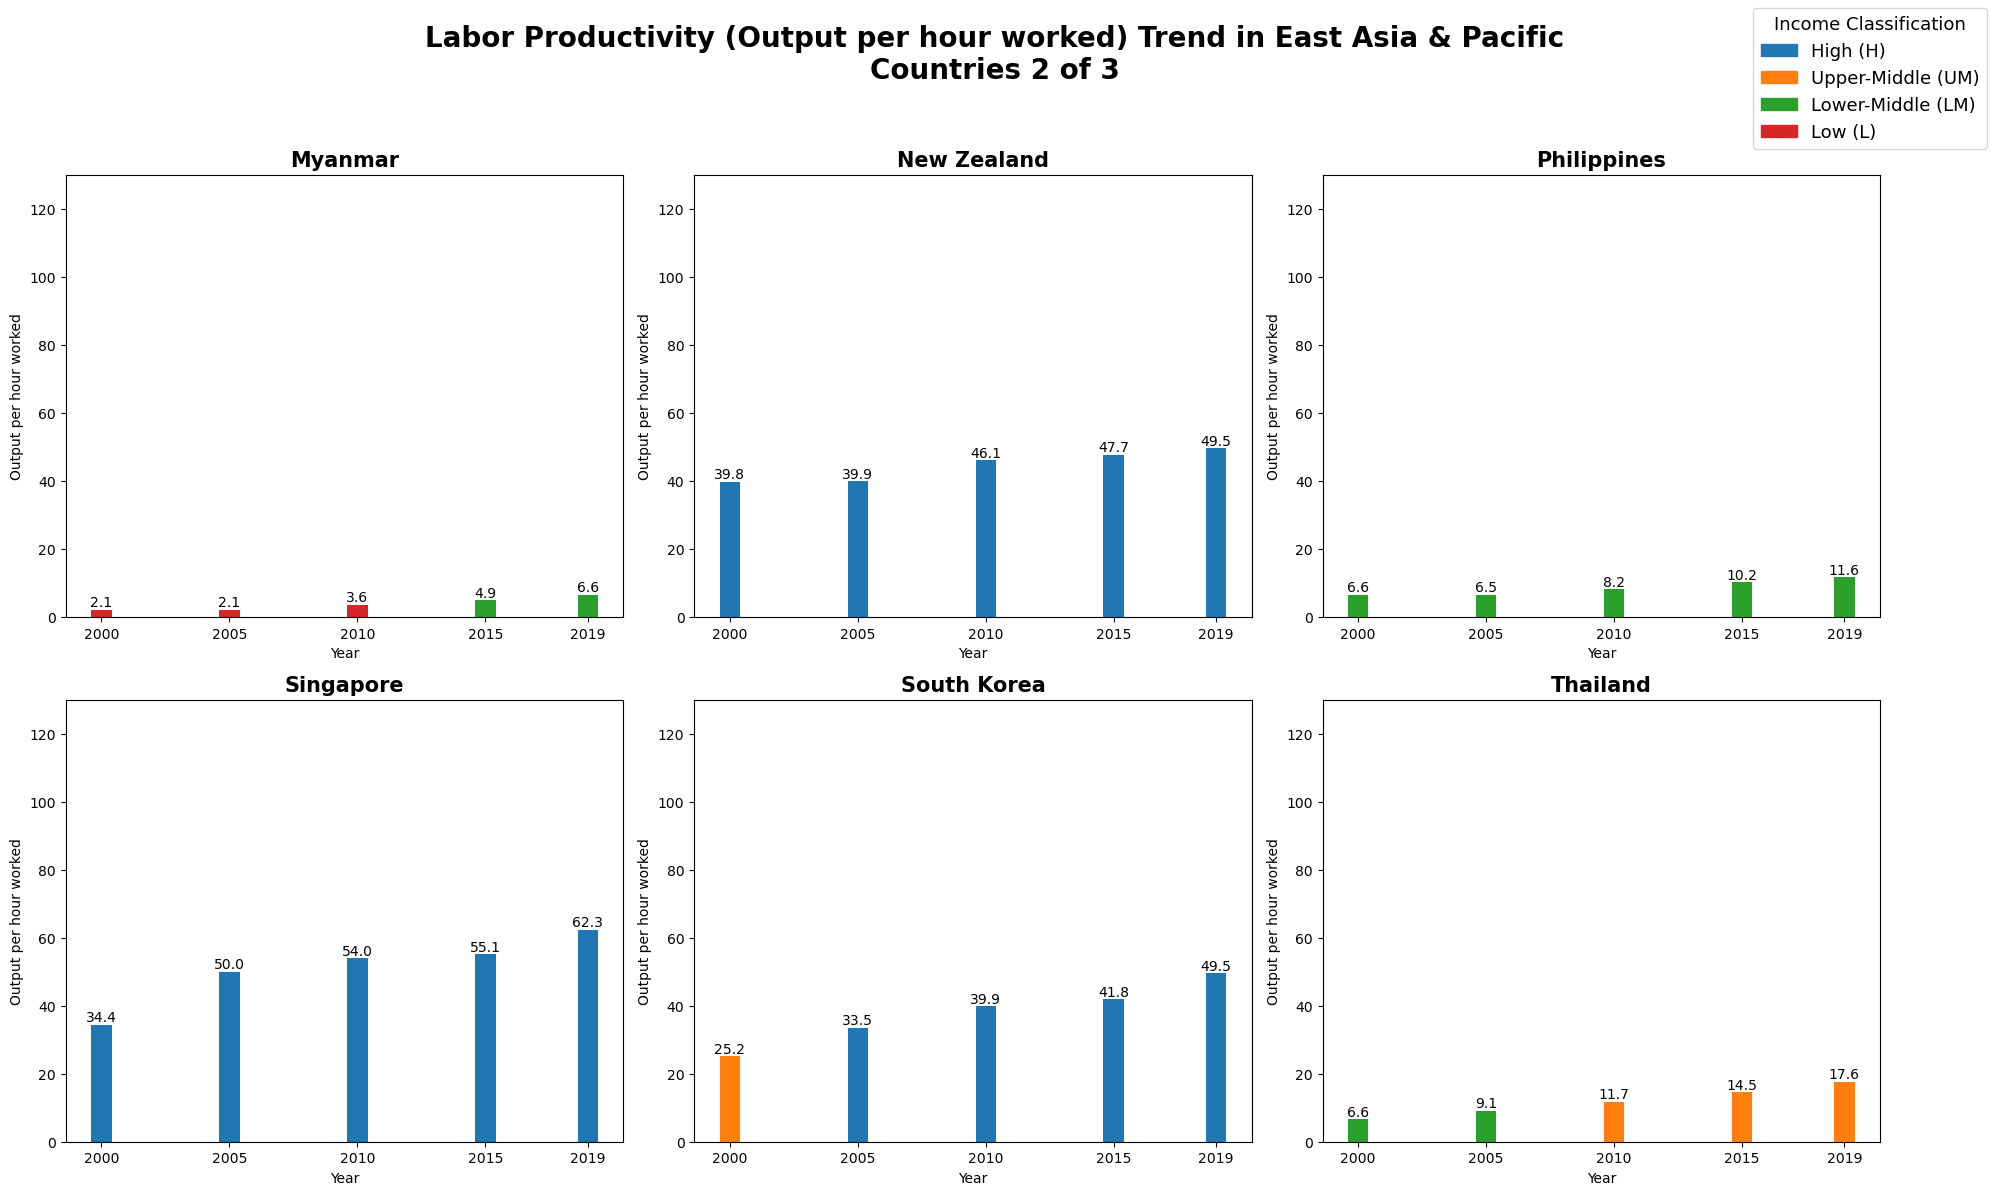

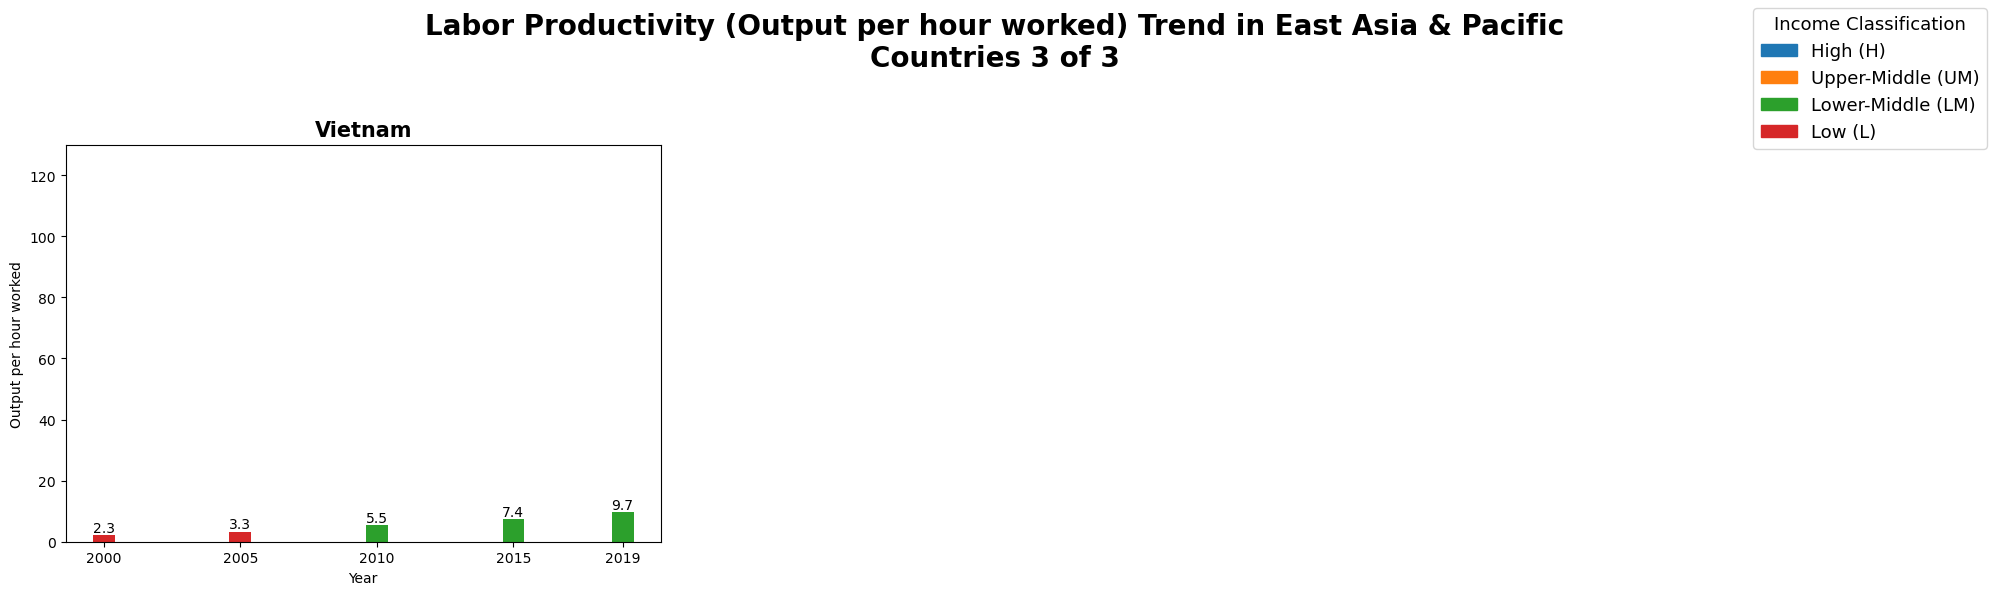

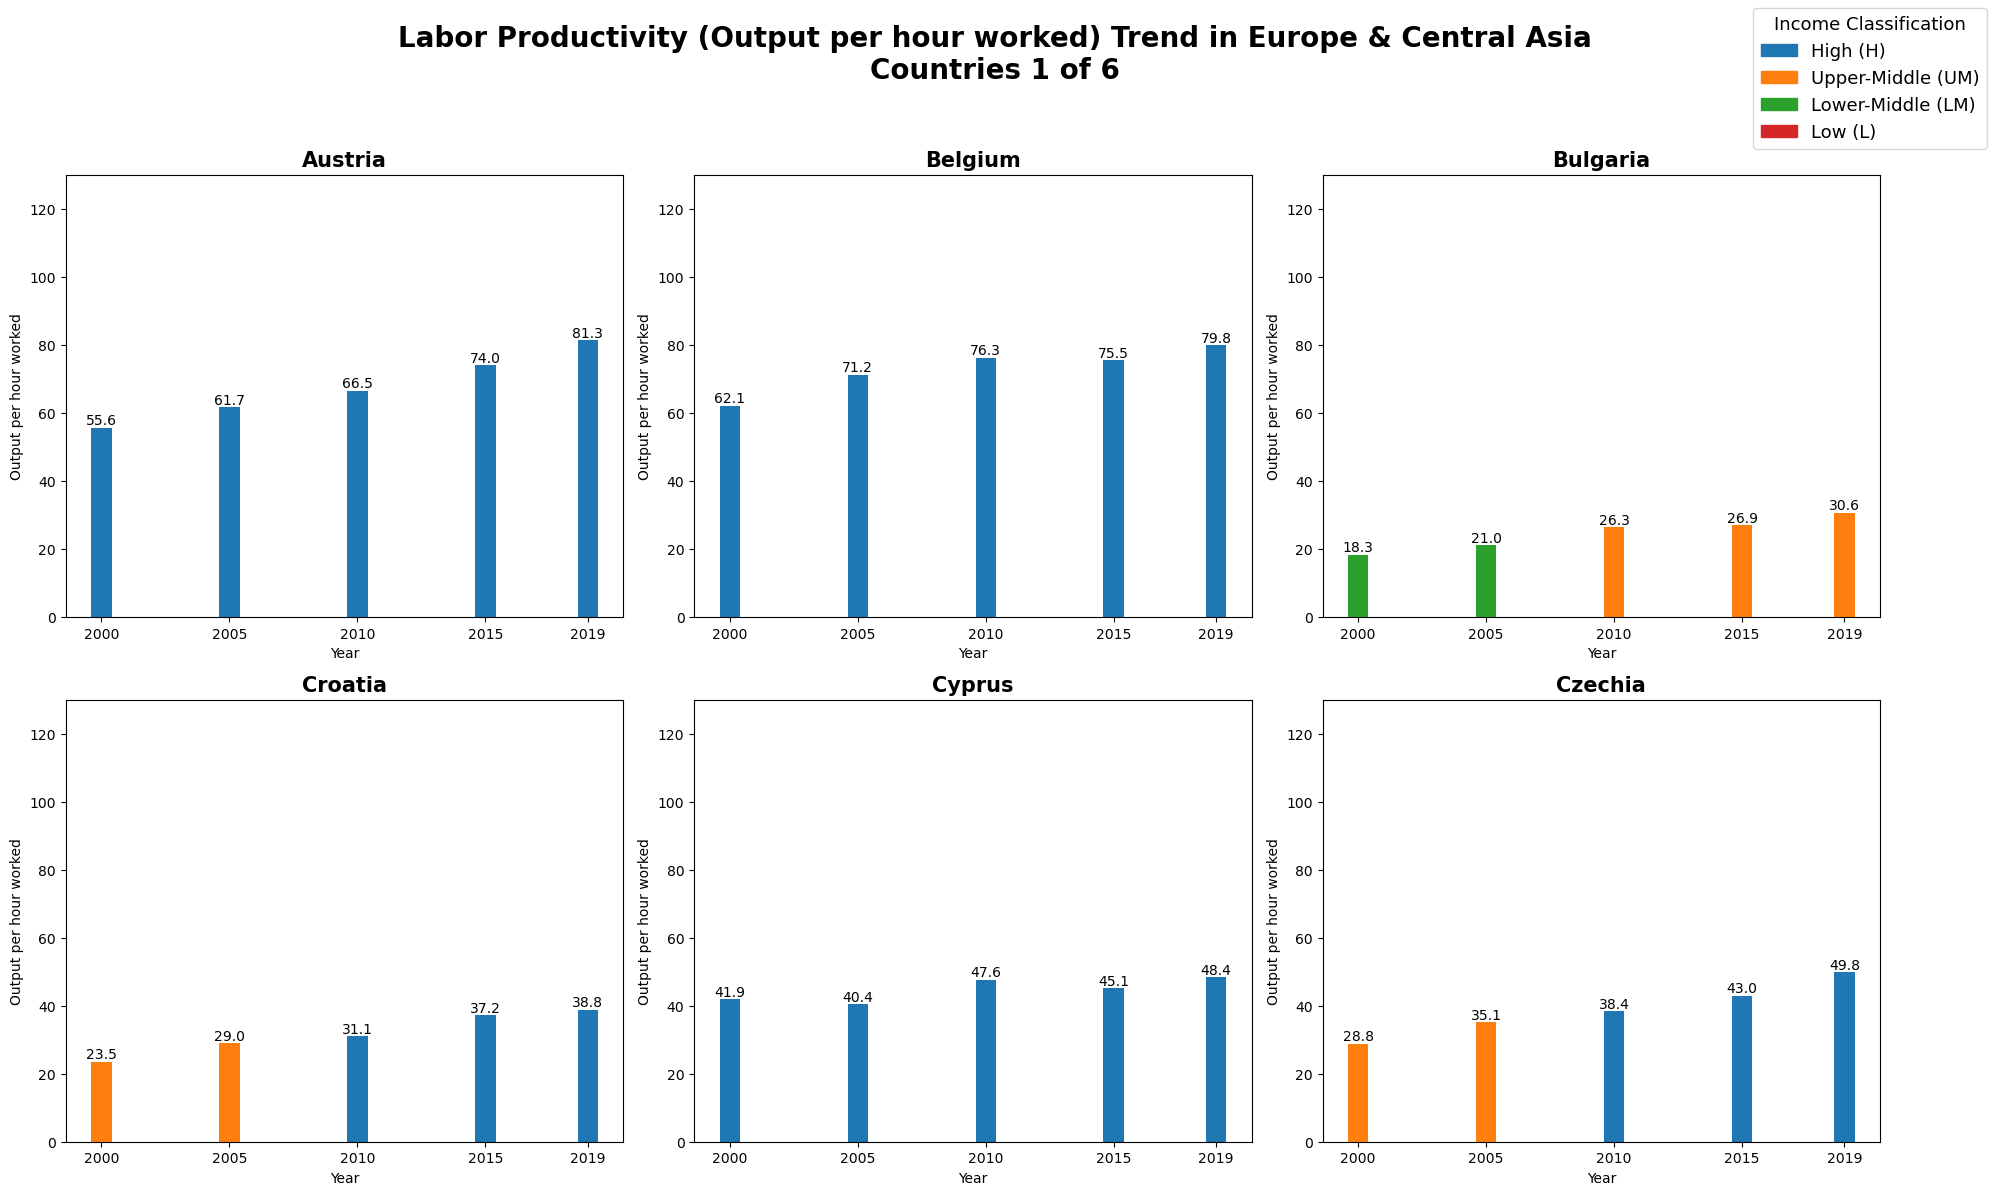

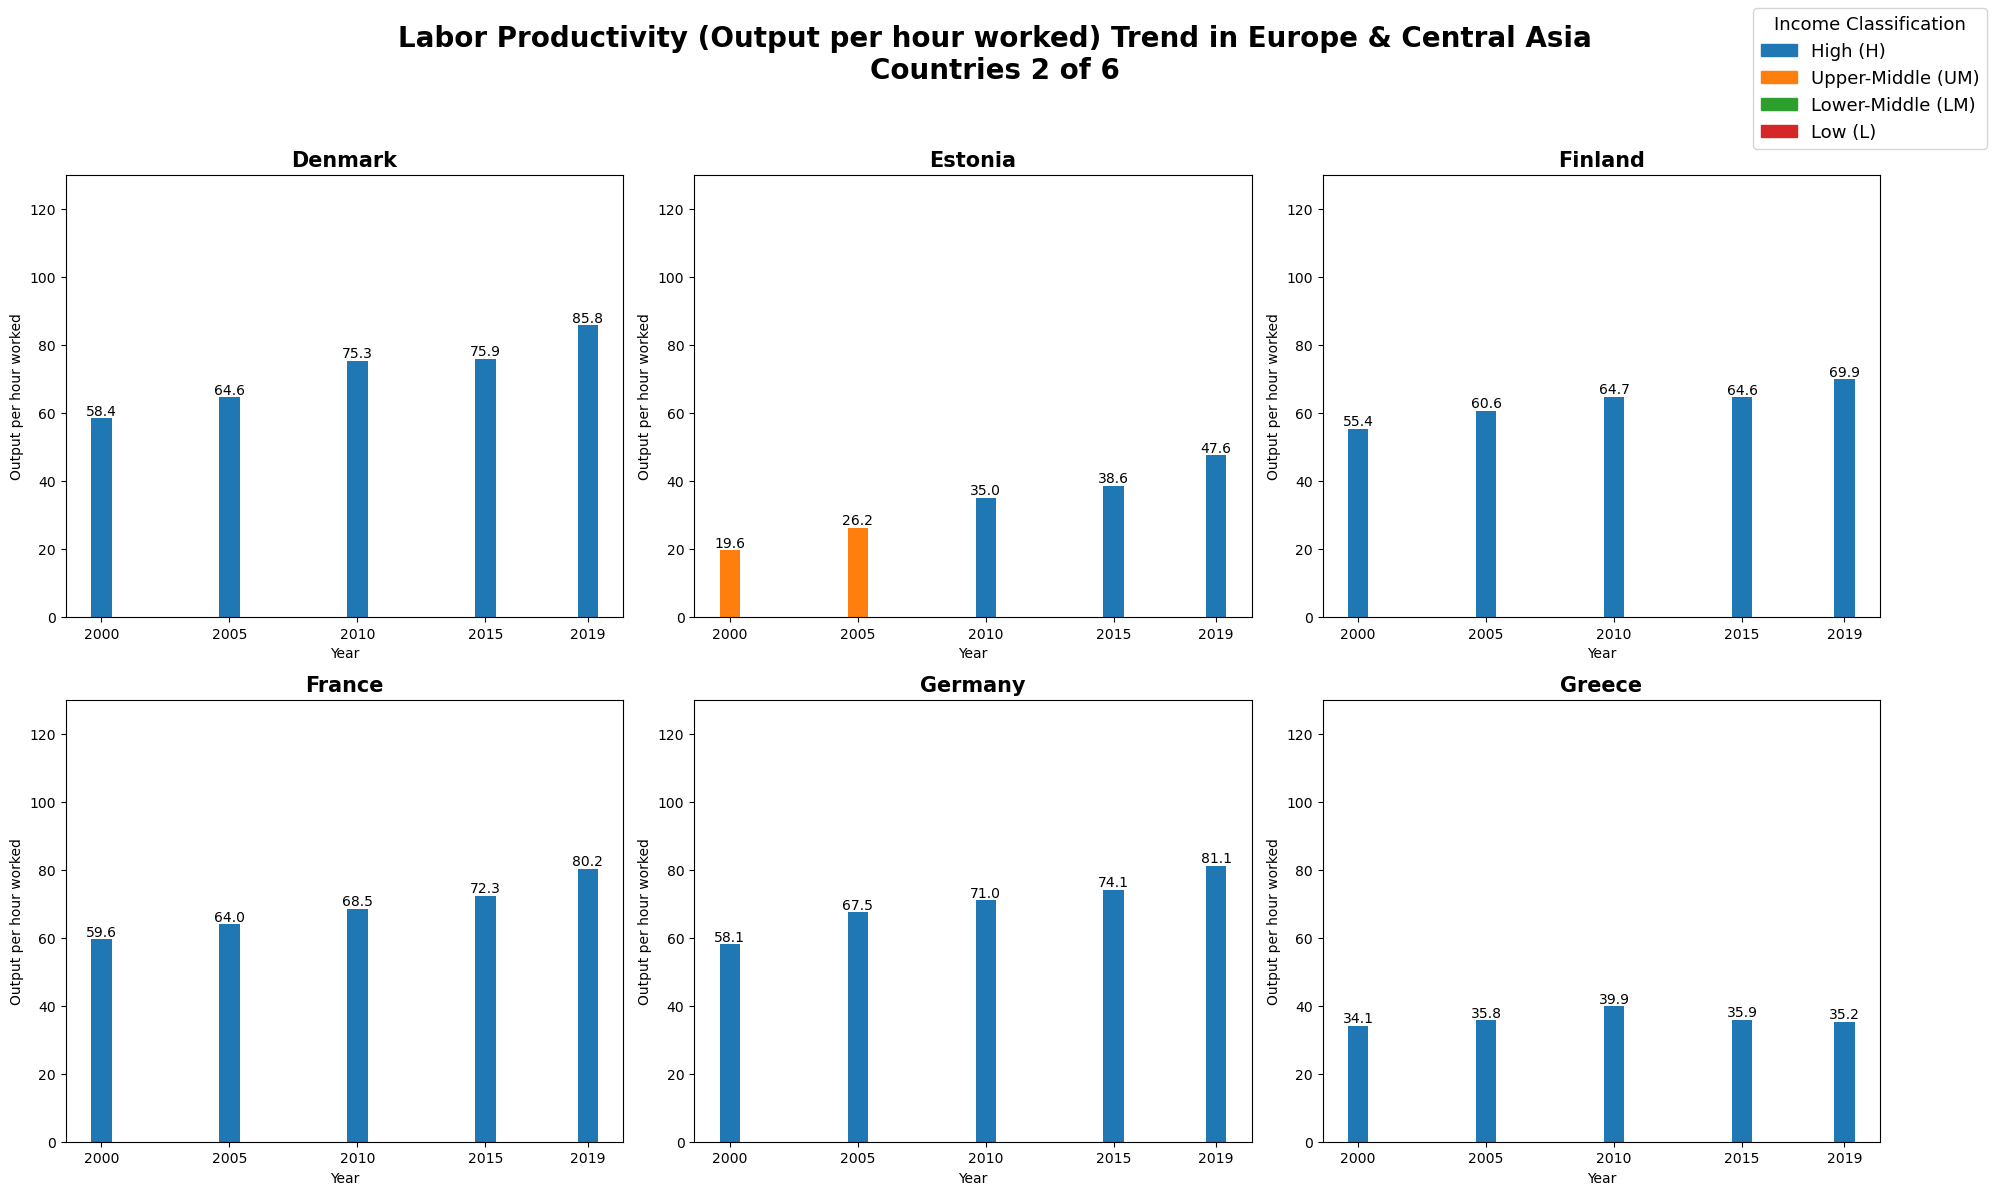

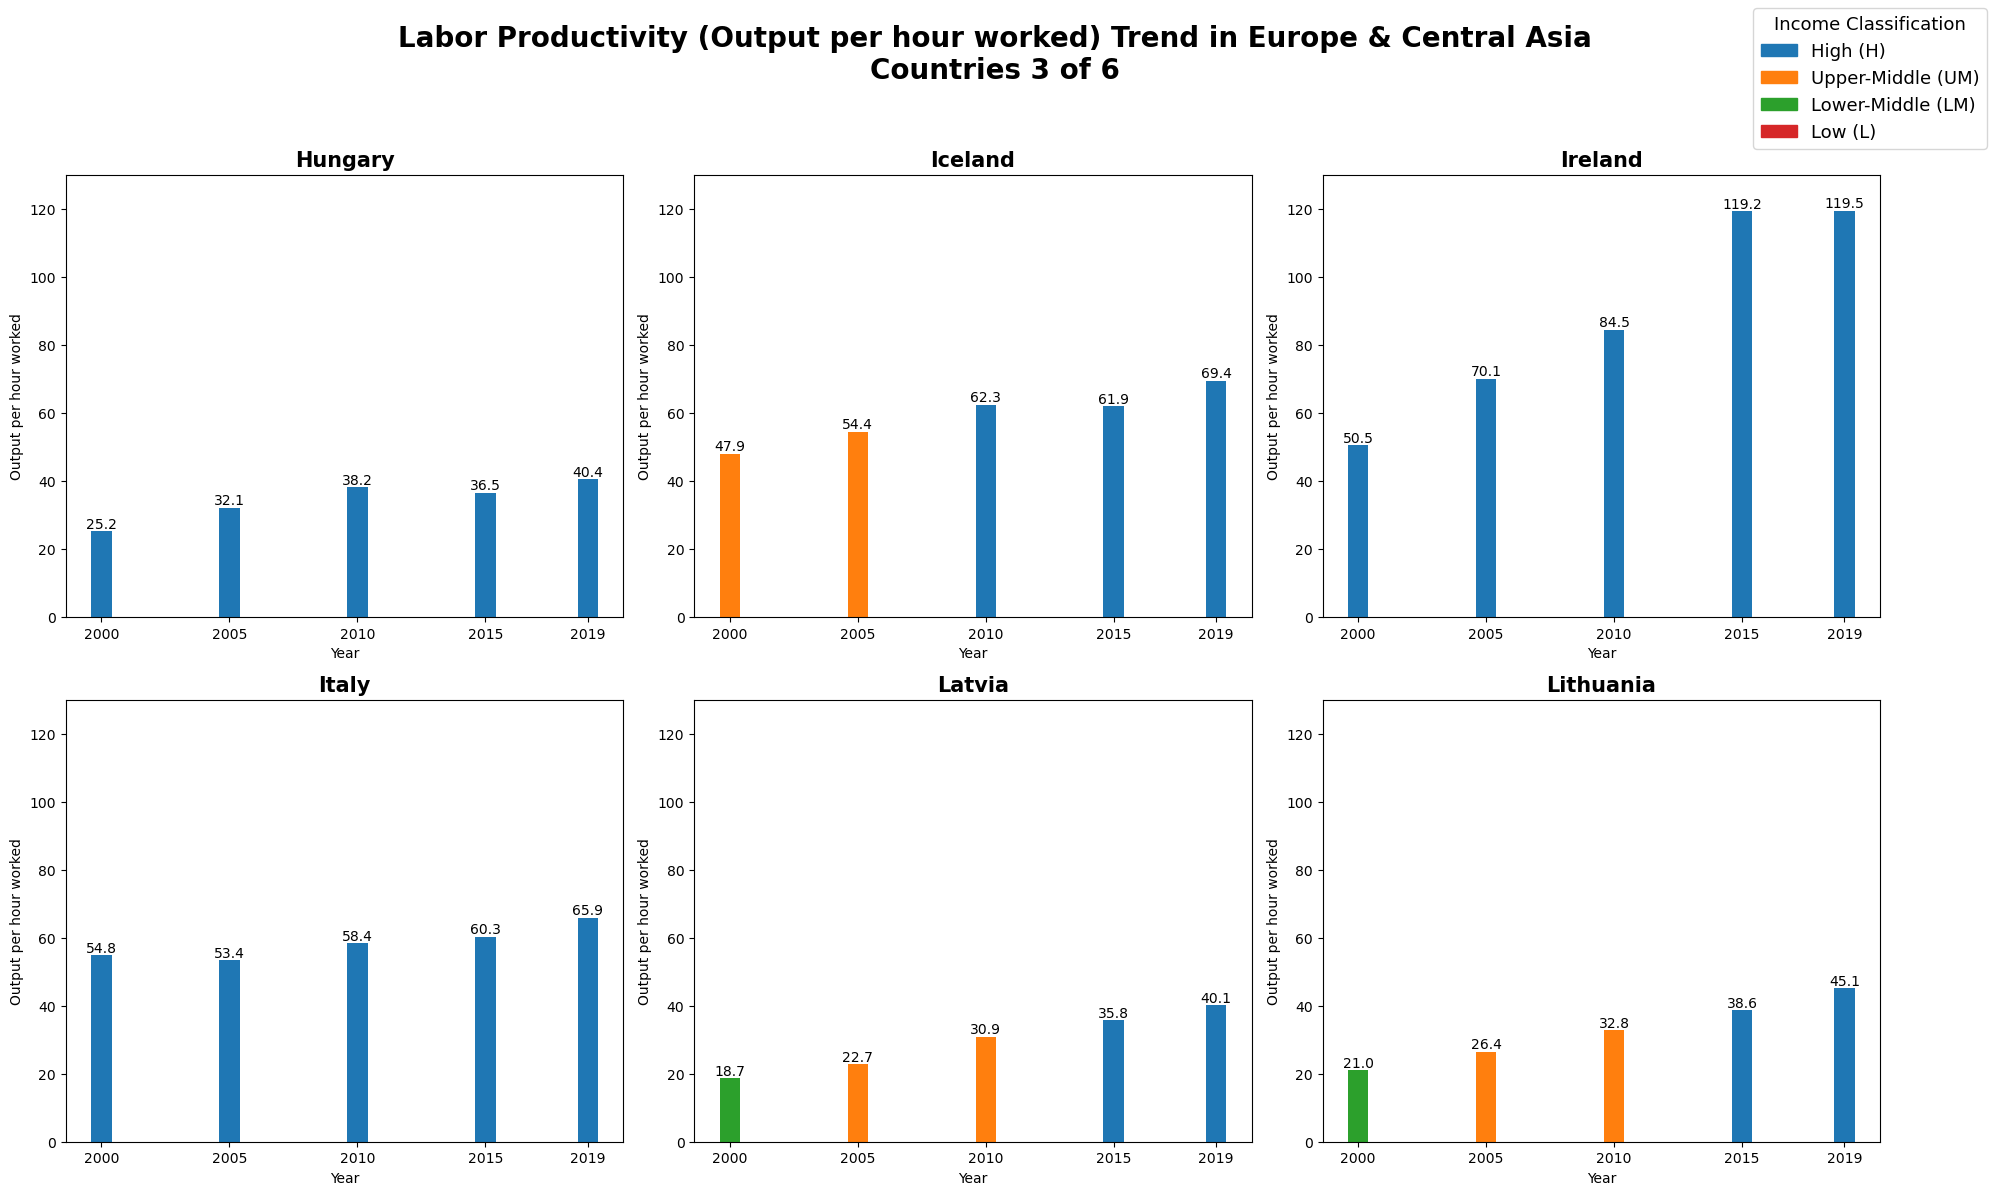

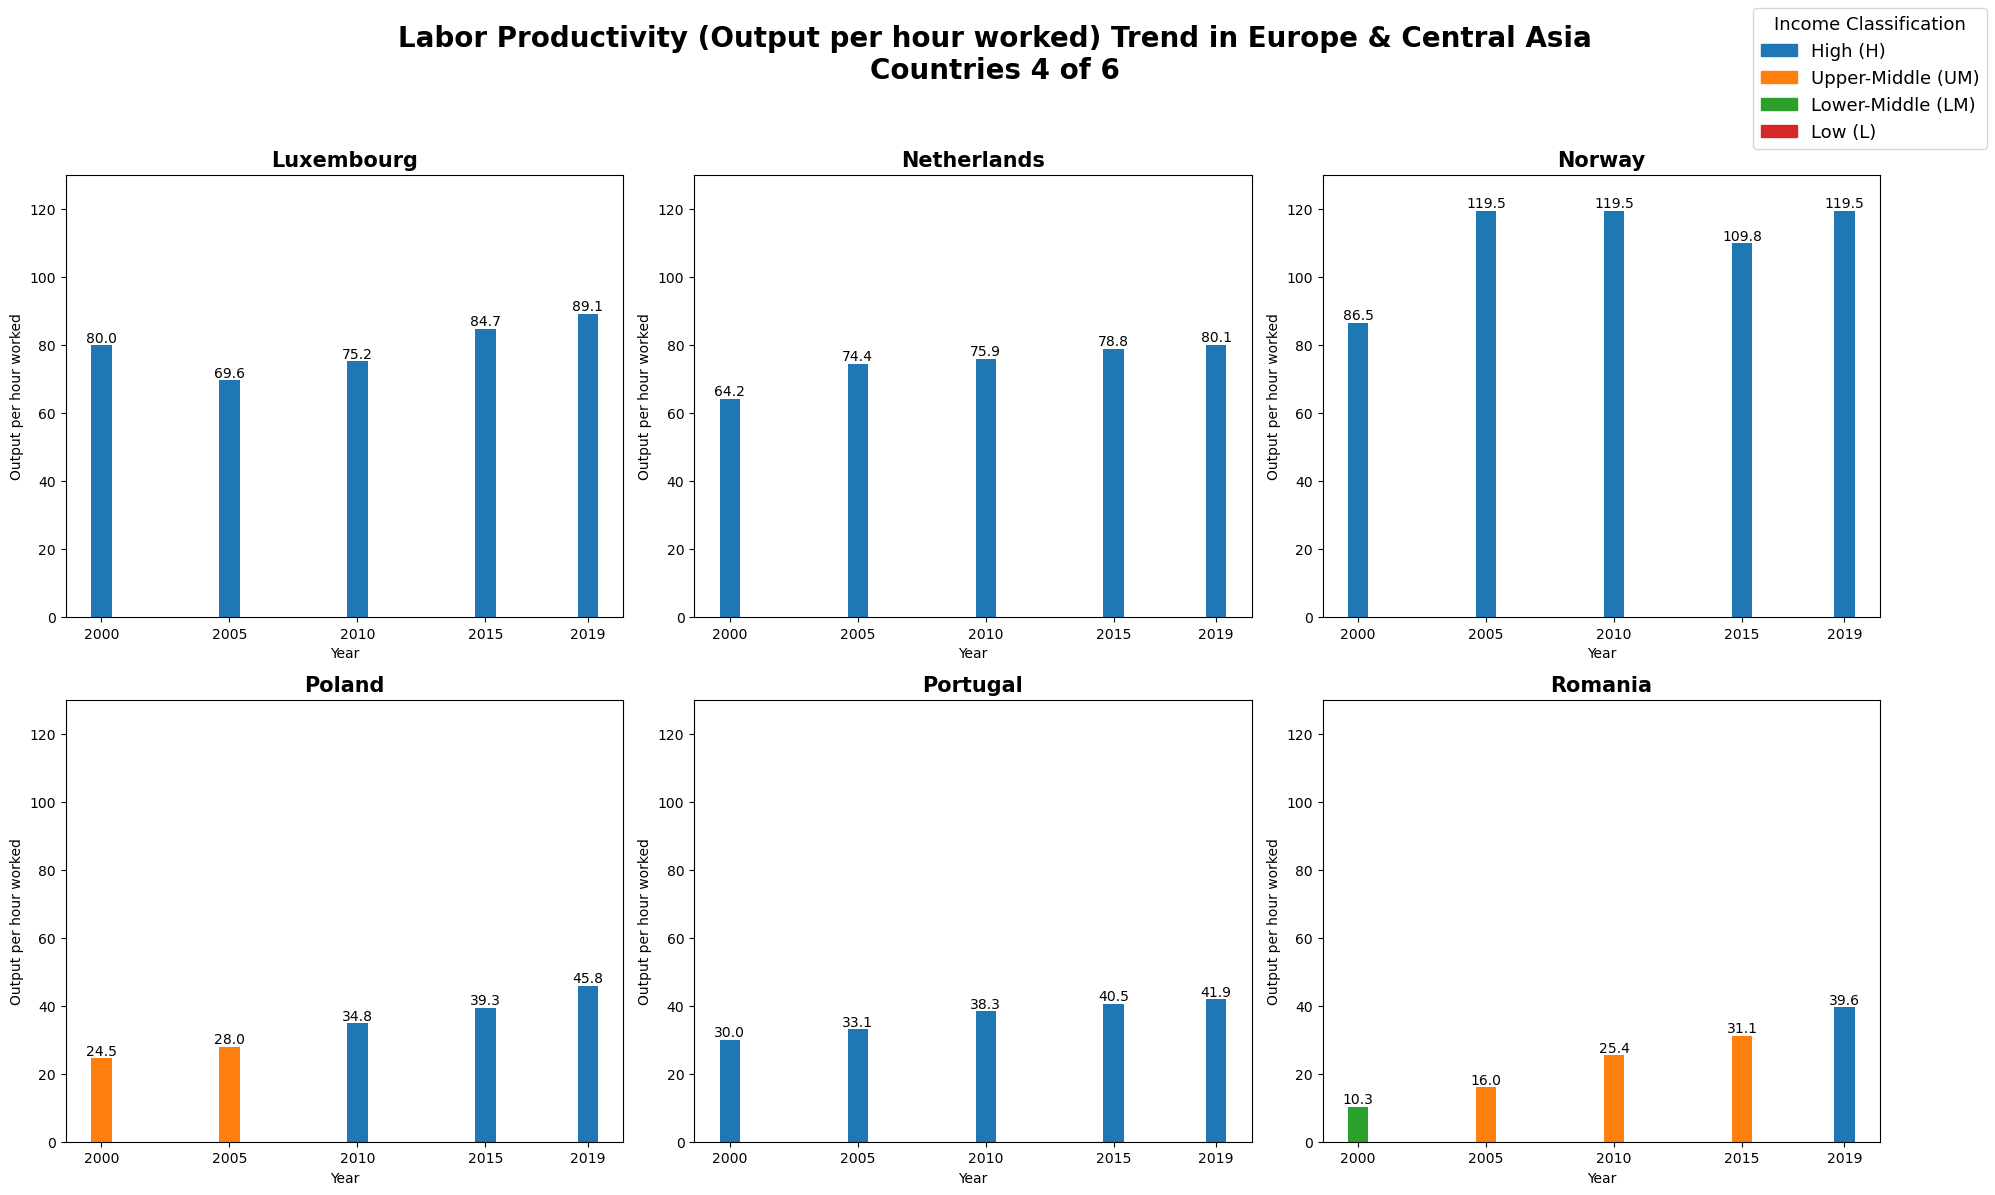

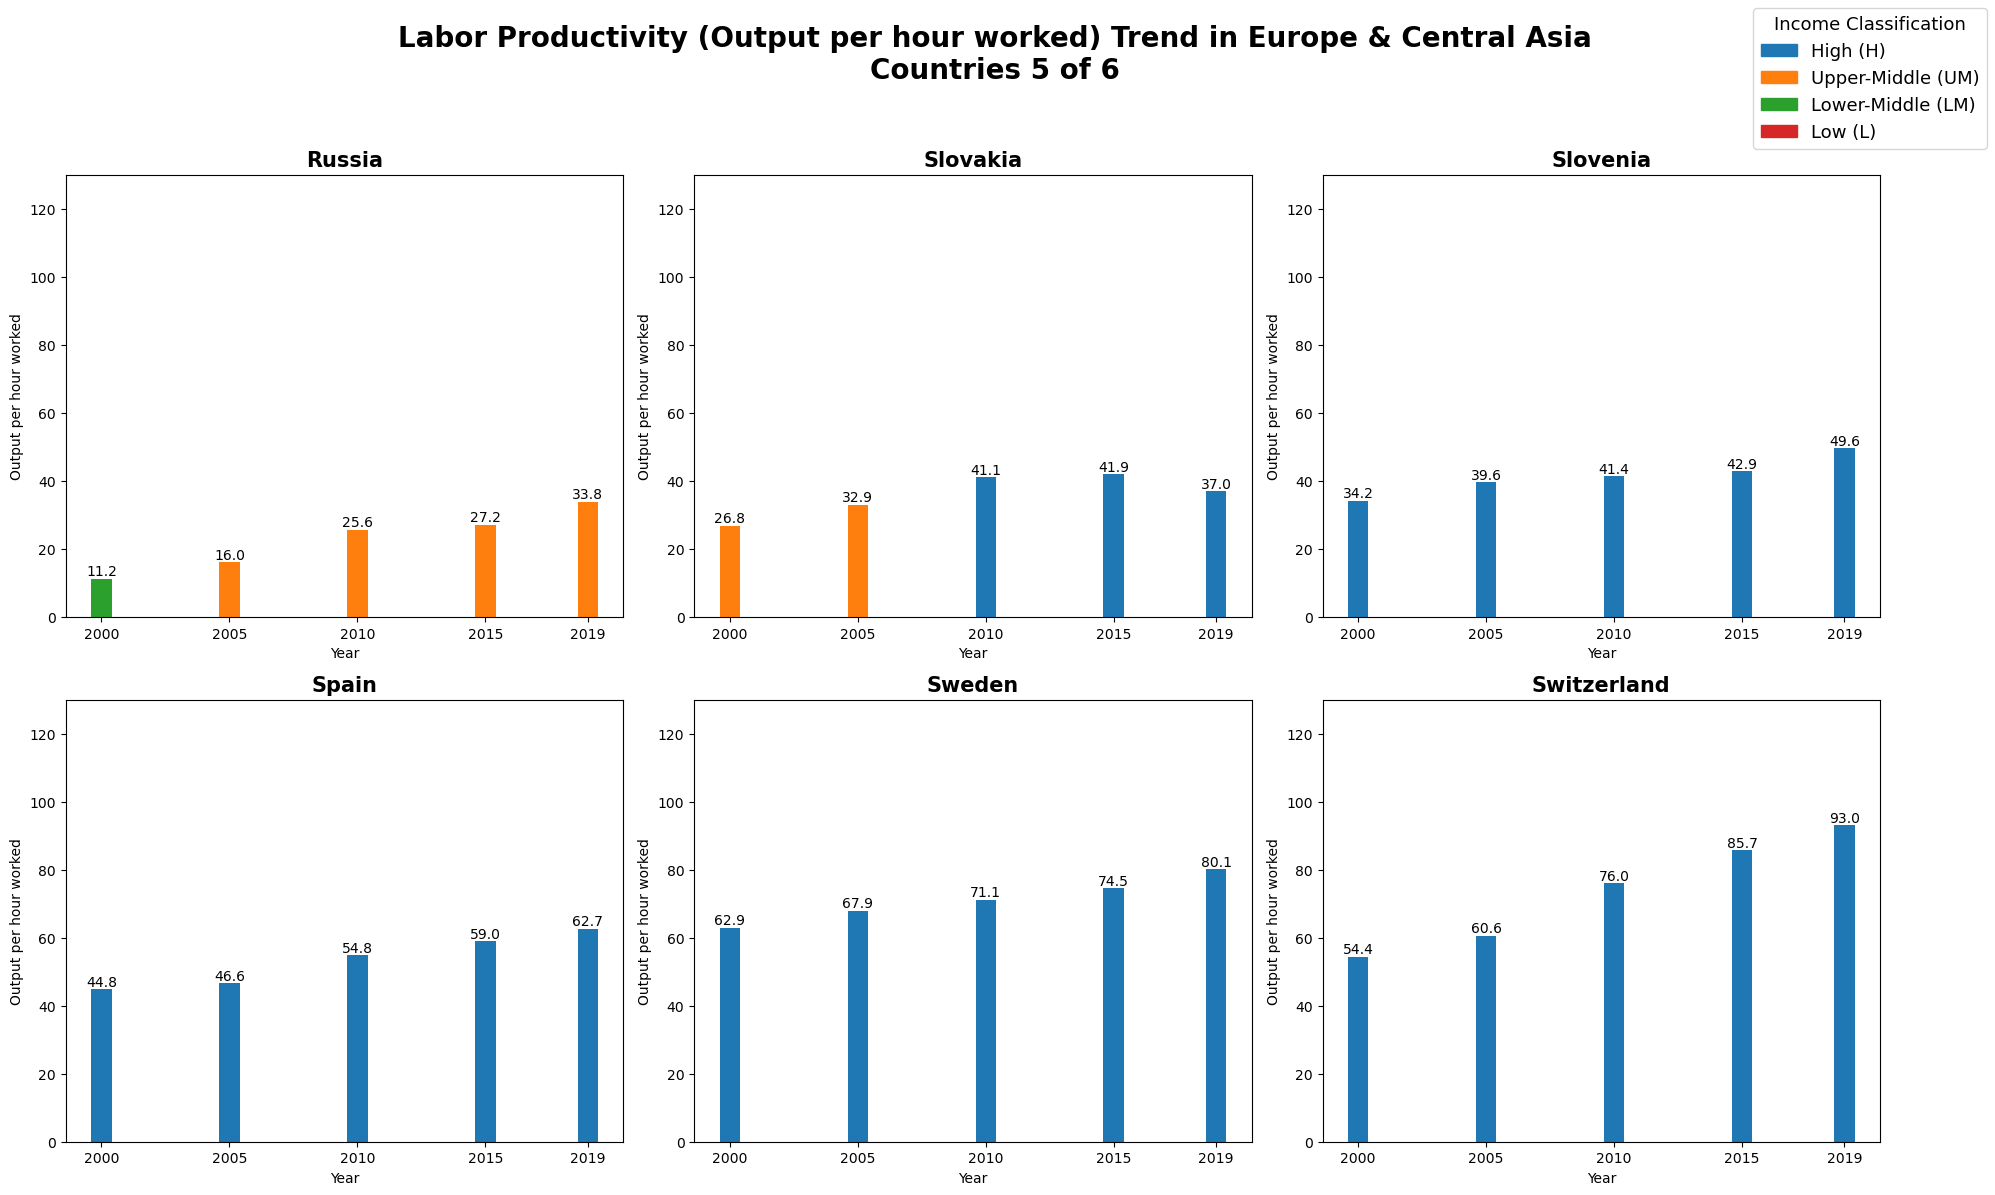

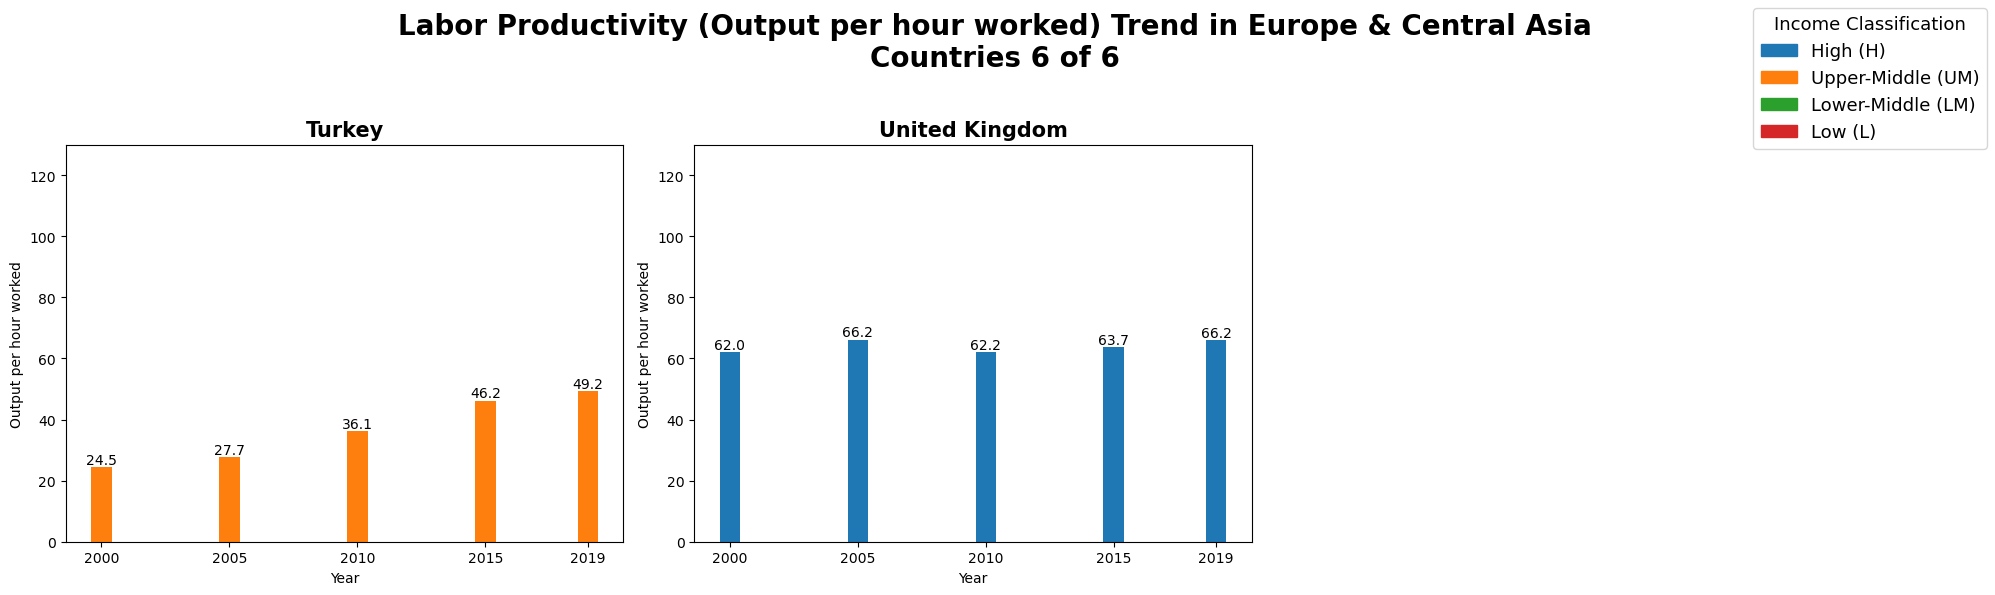

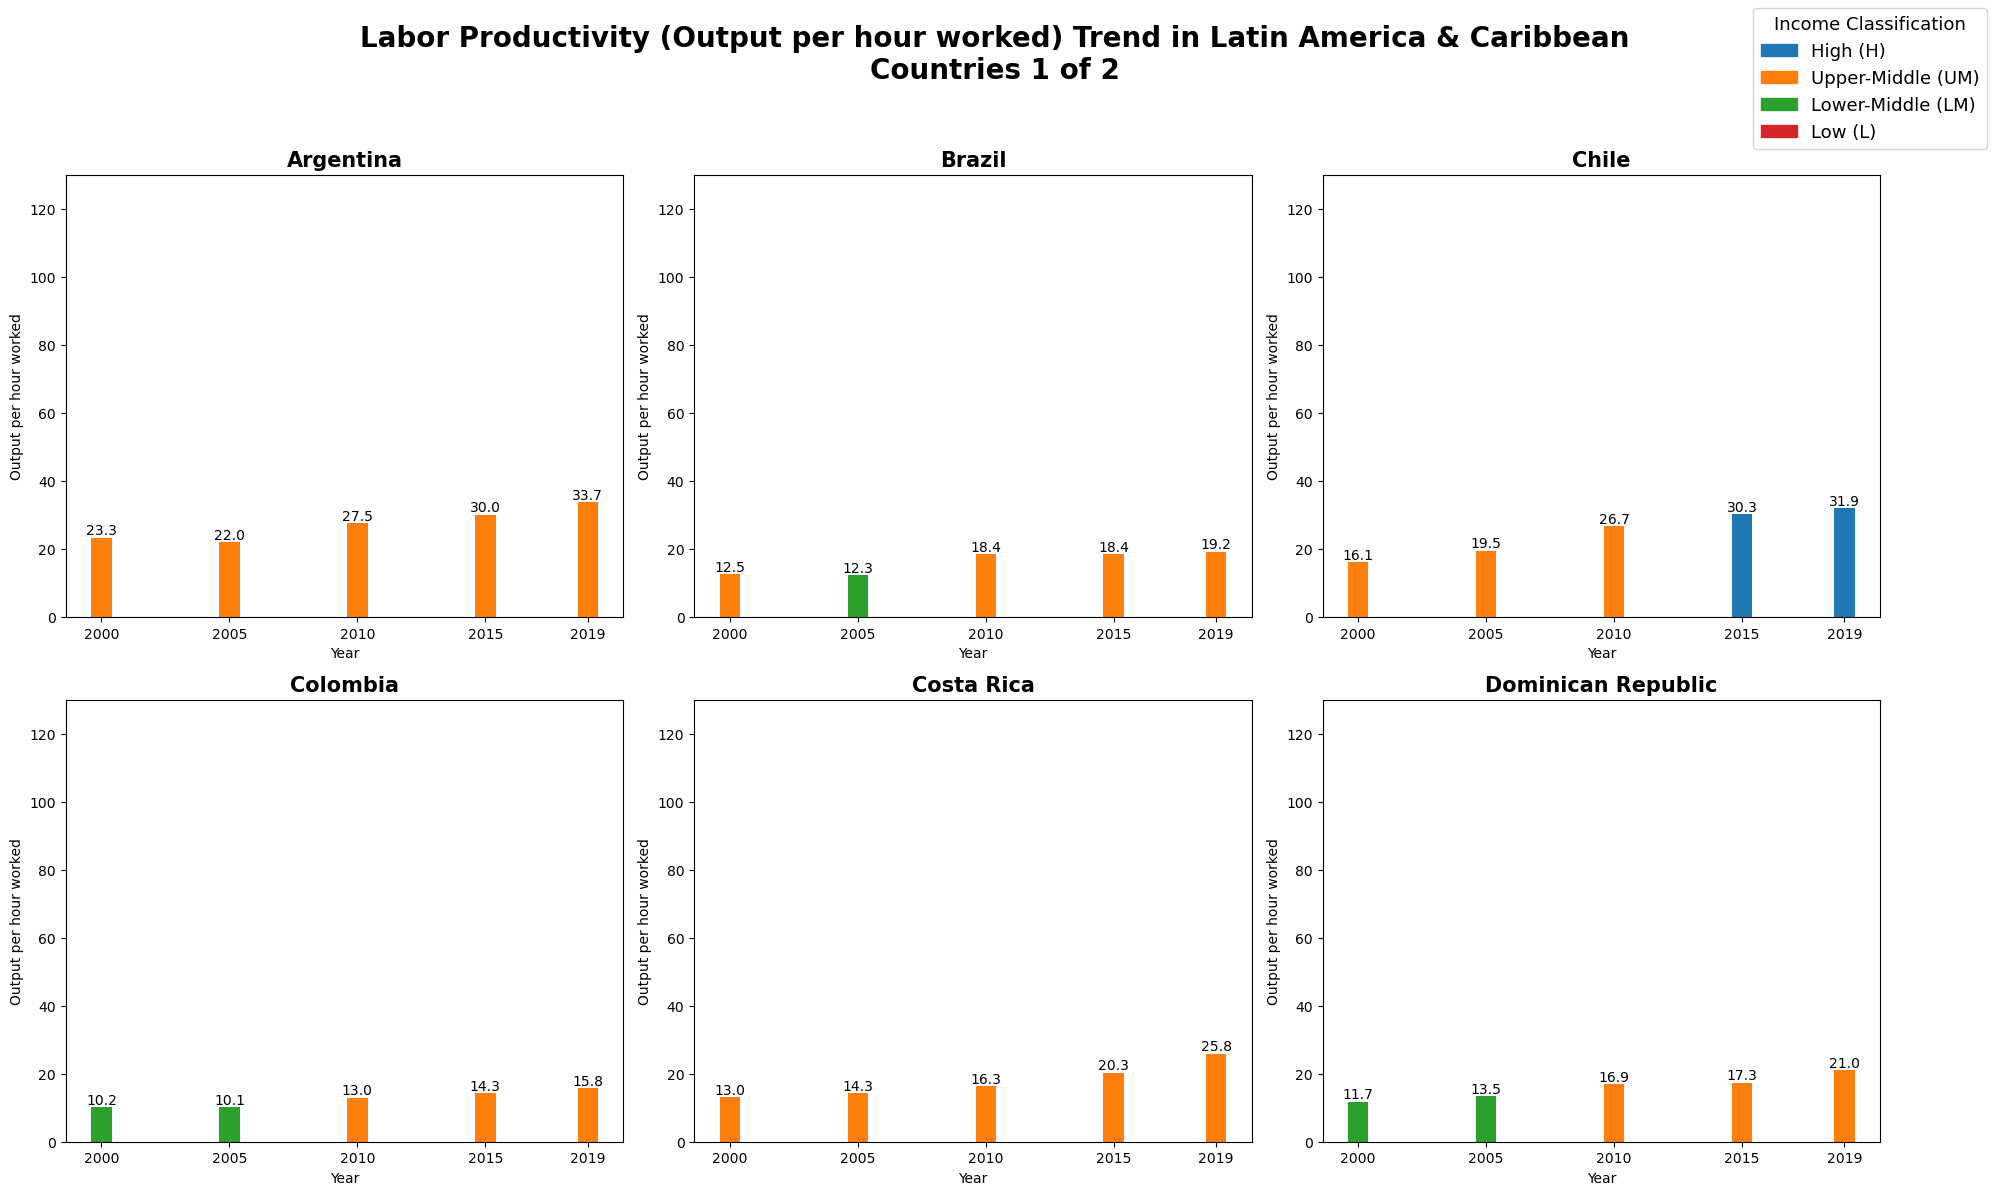

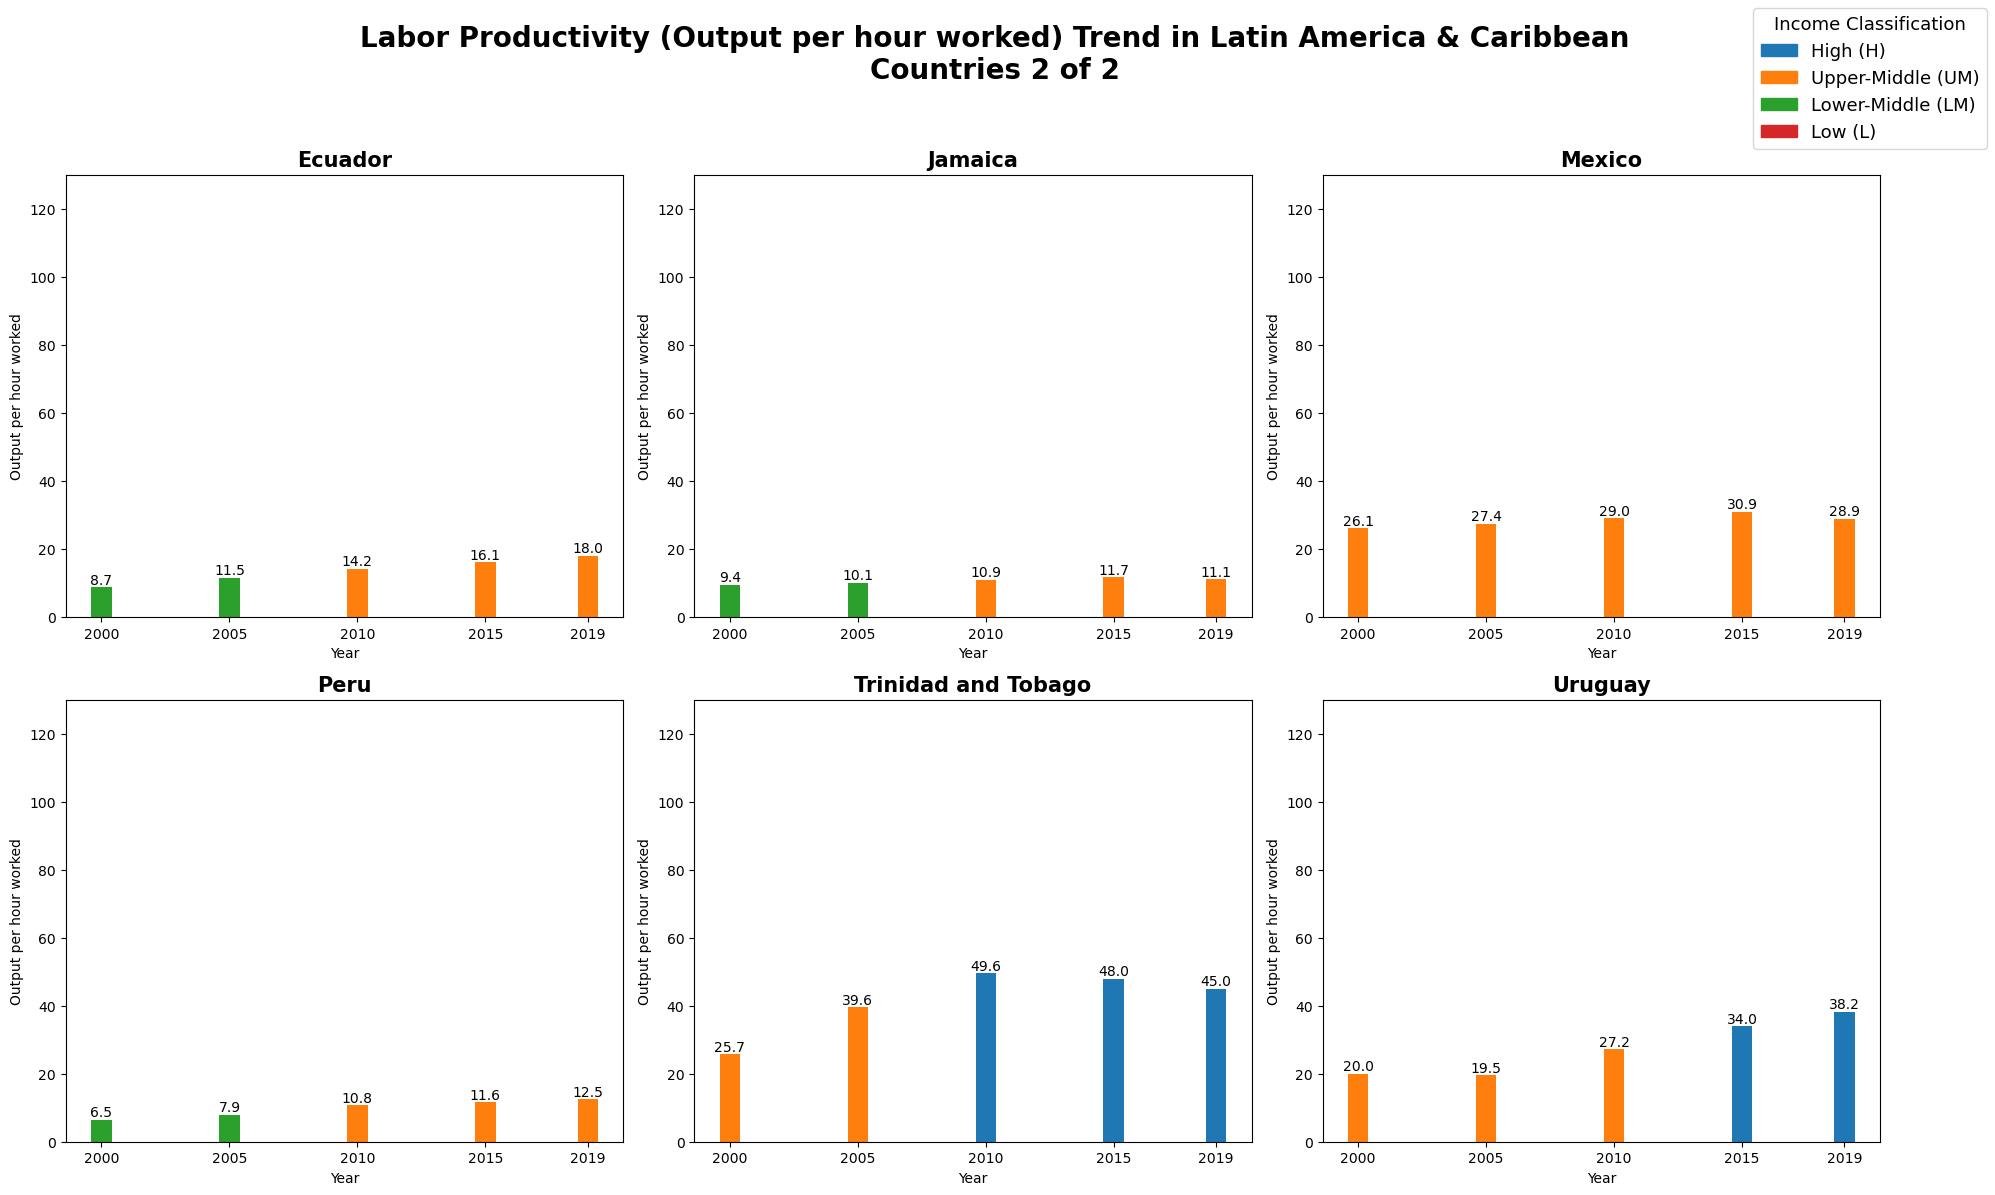

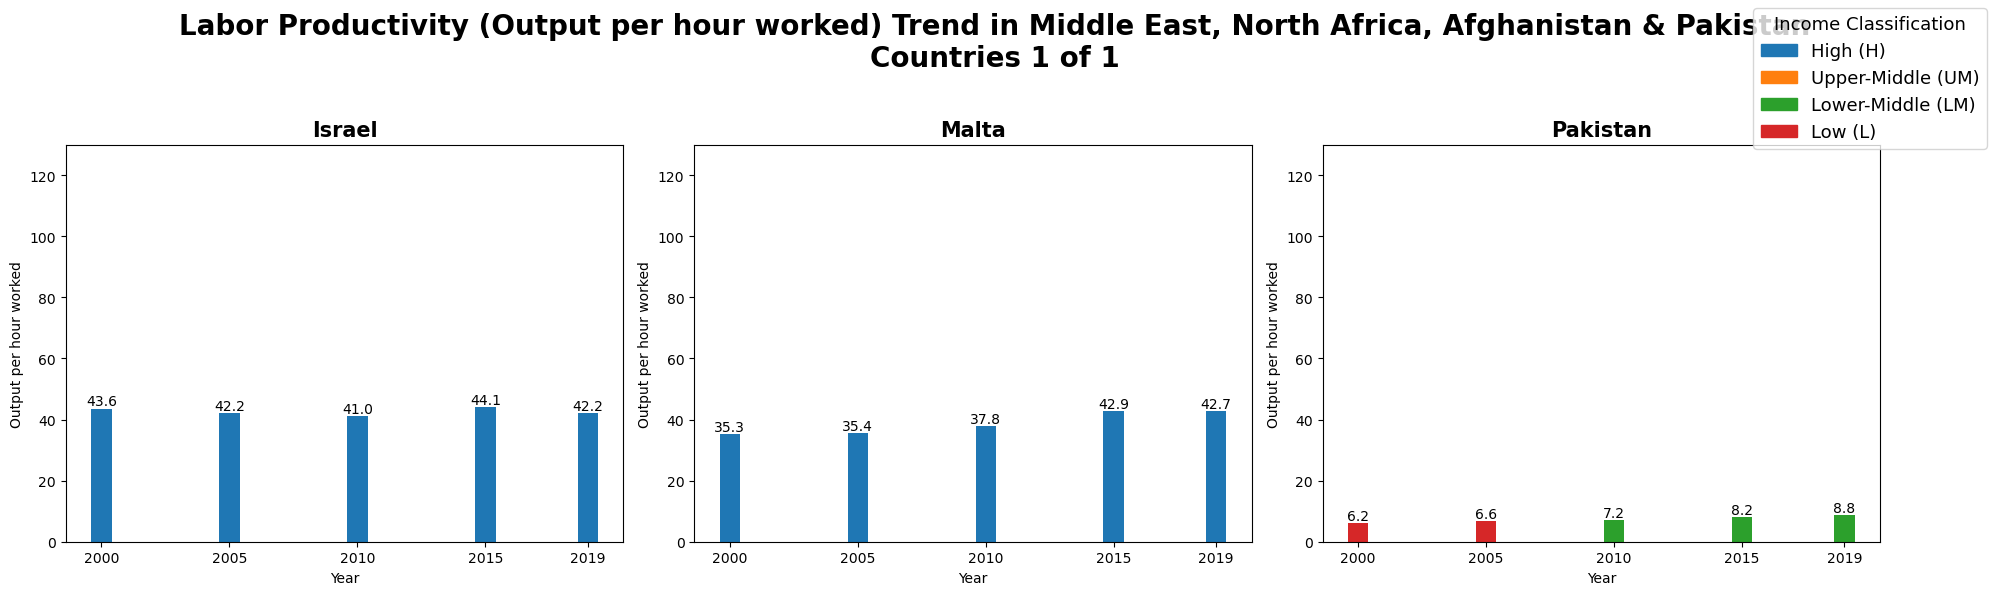

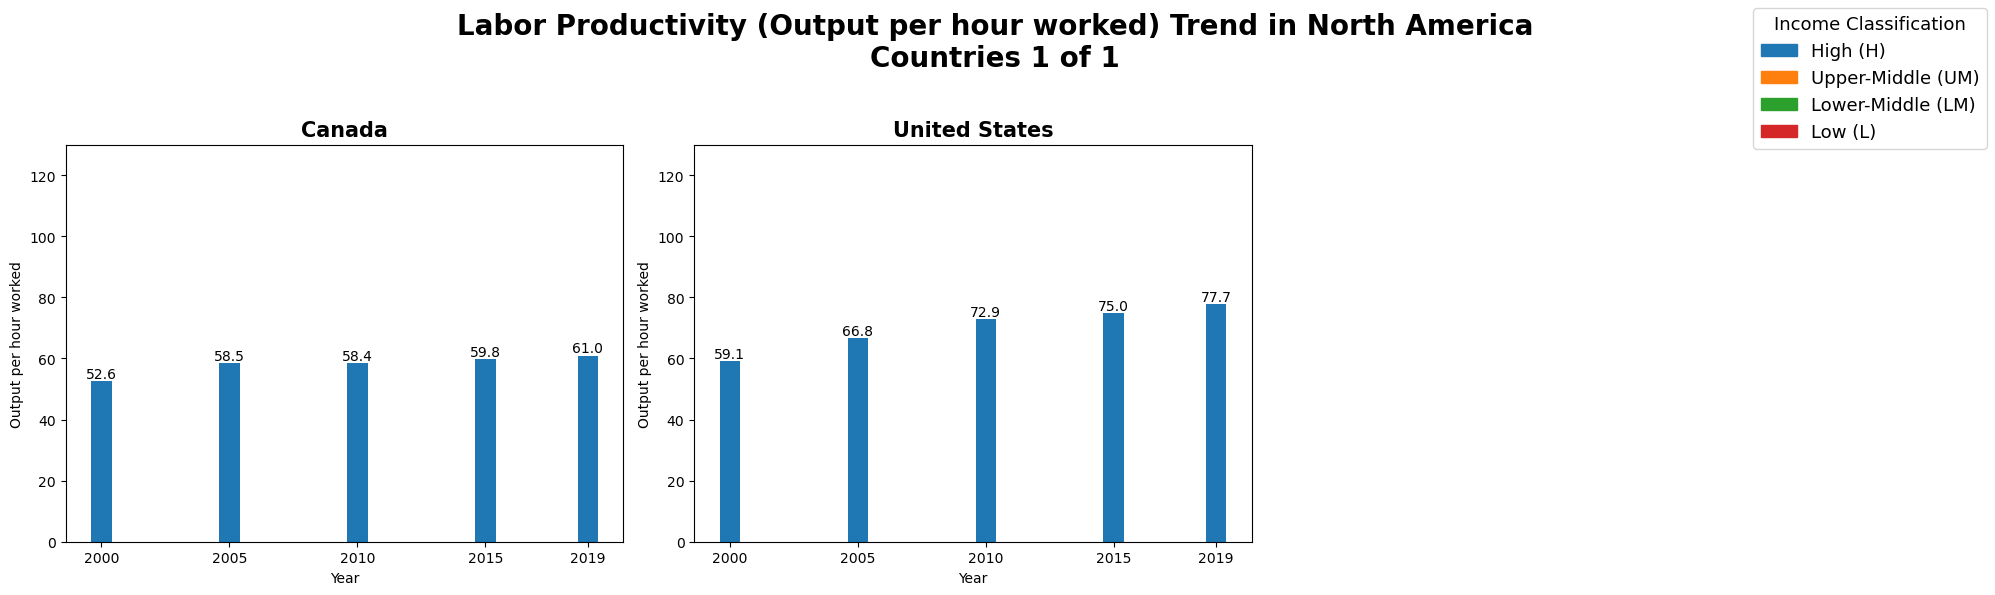

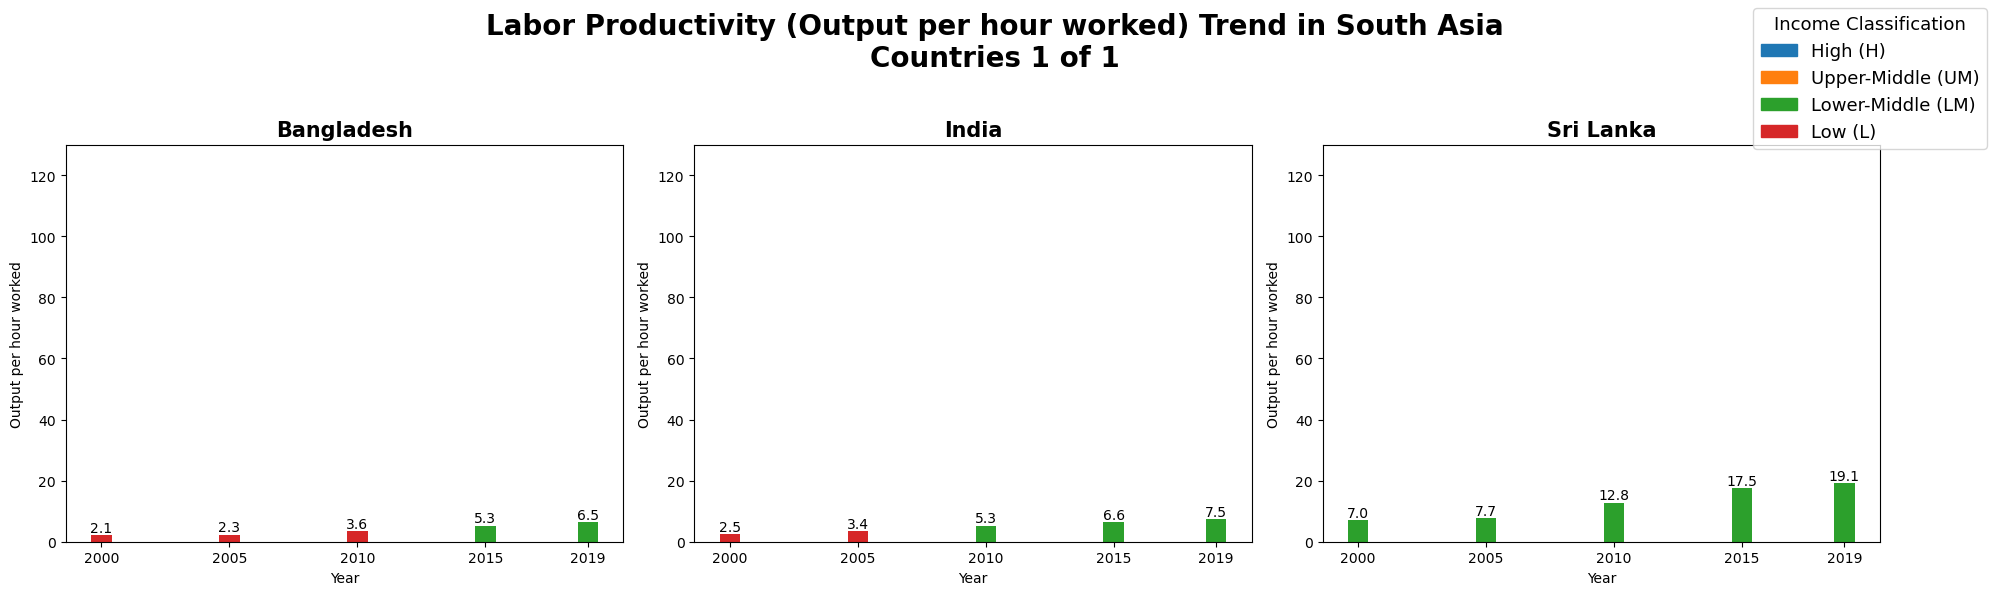

In [34]:
# Make sure Year is int
df[year_col] = df2[year_col].astype(int)

# Fixed years
year_ticks = [2000, 2005, 2010, 2015, 2019]

# Income colors
income_colors = {
    "H": "#1f77b4",
    "UM": "#ff7f0e",
    "LM": "#2ca02c",
    "L": "#d62728"
}

# Replace long names with short ones
clean_income = {
    "High income": "H",
    "Upper middle income": "UM",
    "Lower middle income": "LM",
    "Low income": "L"
}

df2[income_col] = df2[income_col].replace(clean_income)

# Regions list
regions = sorted(df2[region_col].dropna().unique())

# ---------------------------------------------------
# MAIN LOOP
# ---------------------------------------------------
for region in regions:

    df_r = df2[df2[region_col] == region]
    countries = sorted(df_r[country_col].unique())

    # Split into groups of 6 countries
    chunk_size = 6
    country_groups = [countries[i:i + chunk_size] for i in range(0, len(countries), chunk_size)]

    # Loop each chunk
    for group_idx, group in enumerate(country_groups, start=1):

        n_countries = len(group)
        cols = 3
        rows = math.ceil(n_countries / cols)

        fig, axes = plt.subplots(rows, cols, figsize=(20, 6 * rows))
        axes = axes.flatten()

        fig.suptitle(
            f"Labor Productivity (Output per hour worked) Trend in {region}\nCountries {group_idx} of {len(country_groups)}",
            fontsize=20, weight='bold', y=0.98
        )

        # -------------------------------
        # Plot per country
        # -------------------------------
        for i, country in enumerate(group):

            ax = axes[i]

            df_c = df_r[df_r[country_col] == country].sort_values(year_col)
            years = df_c[year_col]
            labor_values = df_c[labor_col]

            # Colors per income
            bar_colors = df_c[income_col].map(income_colors).fillna("gray")

            ax.bar(years, labor_values, color=bar_colors)

            # Value labels
            for x, y in zip(years, labor_values):
                ax.text(x, y + 1, f"{y:.1f}", ha='center', fontsize=10)

            ax.set_title(country, fontsize=15, weight='bold')
            ax.set_ylim(0, 130)

            # Fixed x-ticks
            ax.set_xticks(year_ticks)
            ax.set_xticklabels(
                [str(y) if y in years.values else "" for y in year_ticks],
                fontsize=10
            )

            ax.set_xlabel("Year")
            ax.set_ylabel("Output per hour worked")

        # Remove unused axes
        for j in range(i + 1, rows * cols):
            fig.delaxes(axes[j])

        # Legend
        handles = [plt.Rectangle((0,0),1,1, color=income_colors[k]) for k in income_colors]
        labels = ["High (H)", "Upper-Middle (UM)", "Lower-Middle (LM)", "Low (L)"]

        fig.legend(
            handles, labels,
            title="Income Classification",
            loc="upper right", fontsize=13, title_fontsize=13
        )

        plt.tight_layout(rect=[0, 0, 0.95, 0.95])

        # Save file per group
        filename = f"lpbar_w_region_income_{region.replace(' ', '_')}_part{group_idx}.png"
        plt.savefig(filename, dpi=300, bbox_inches="tight")
        plt.show()


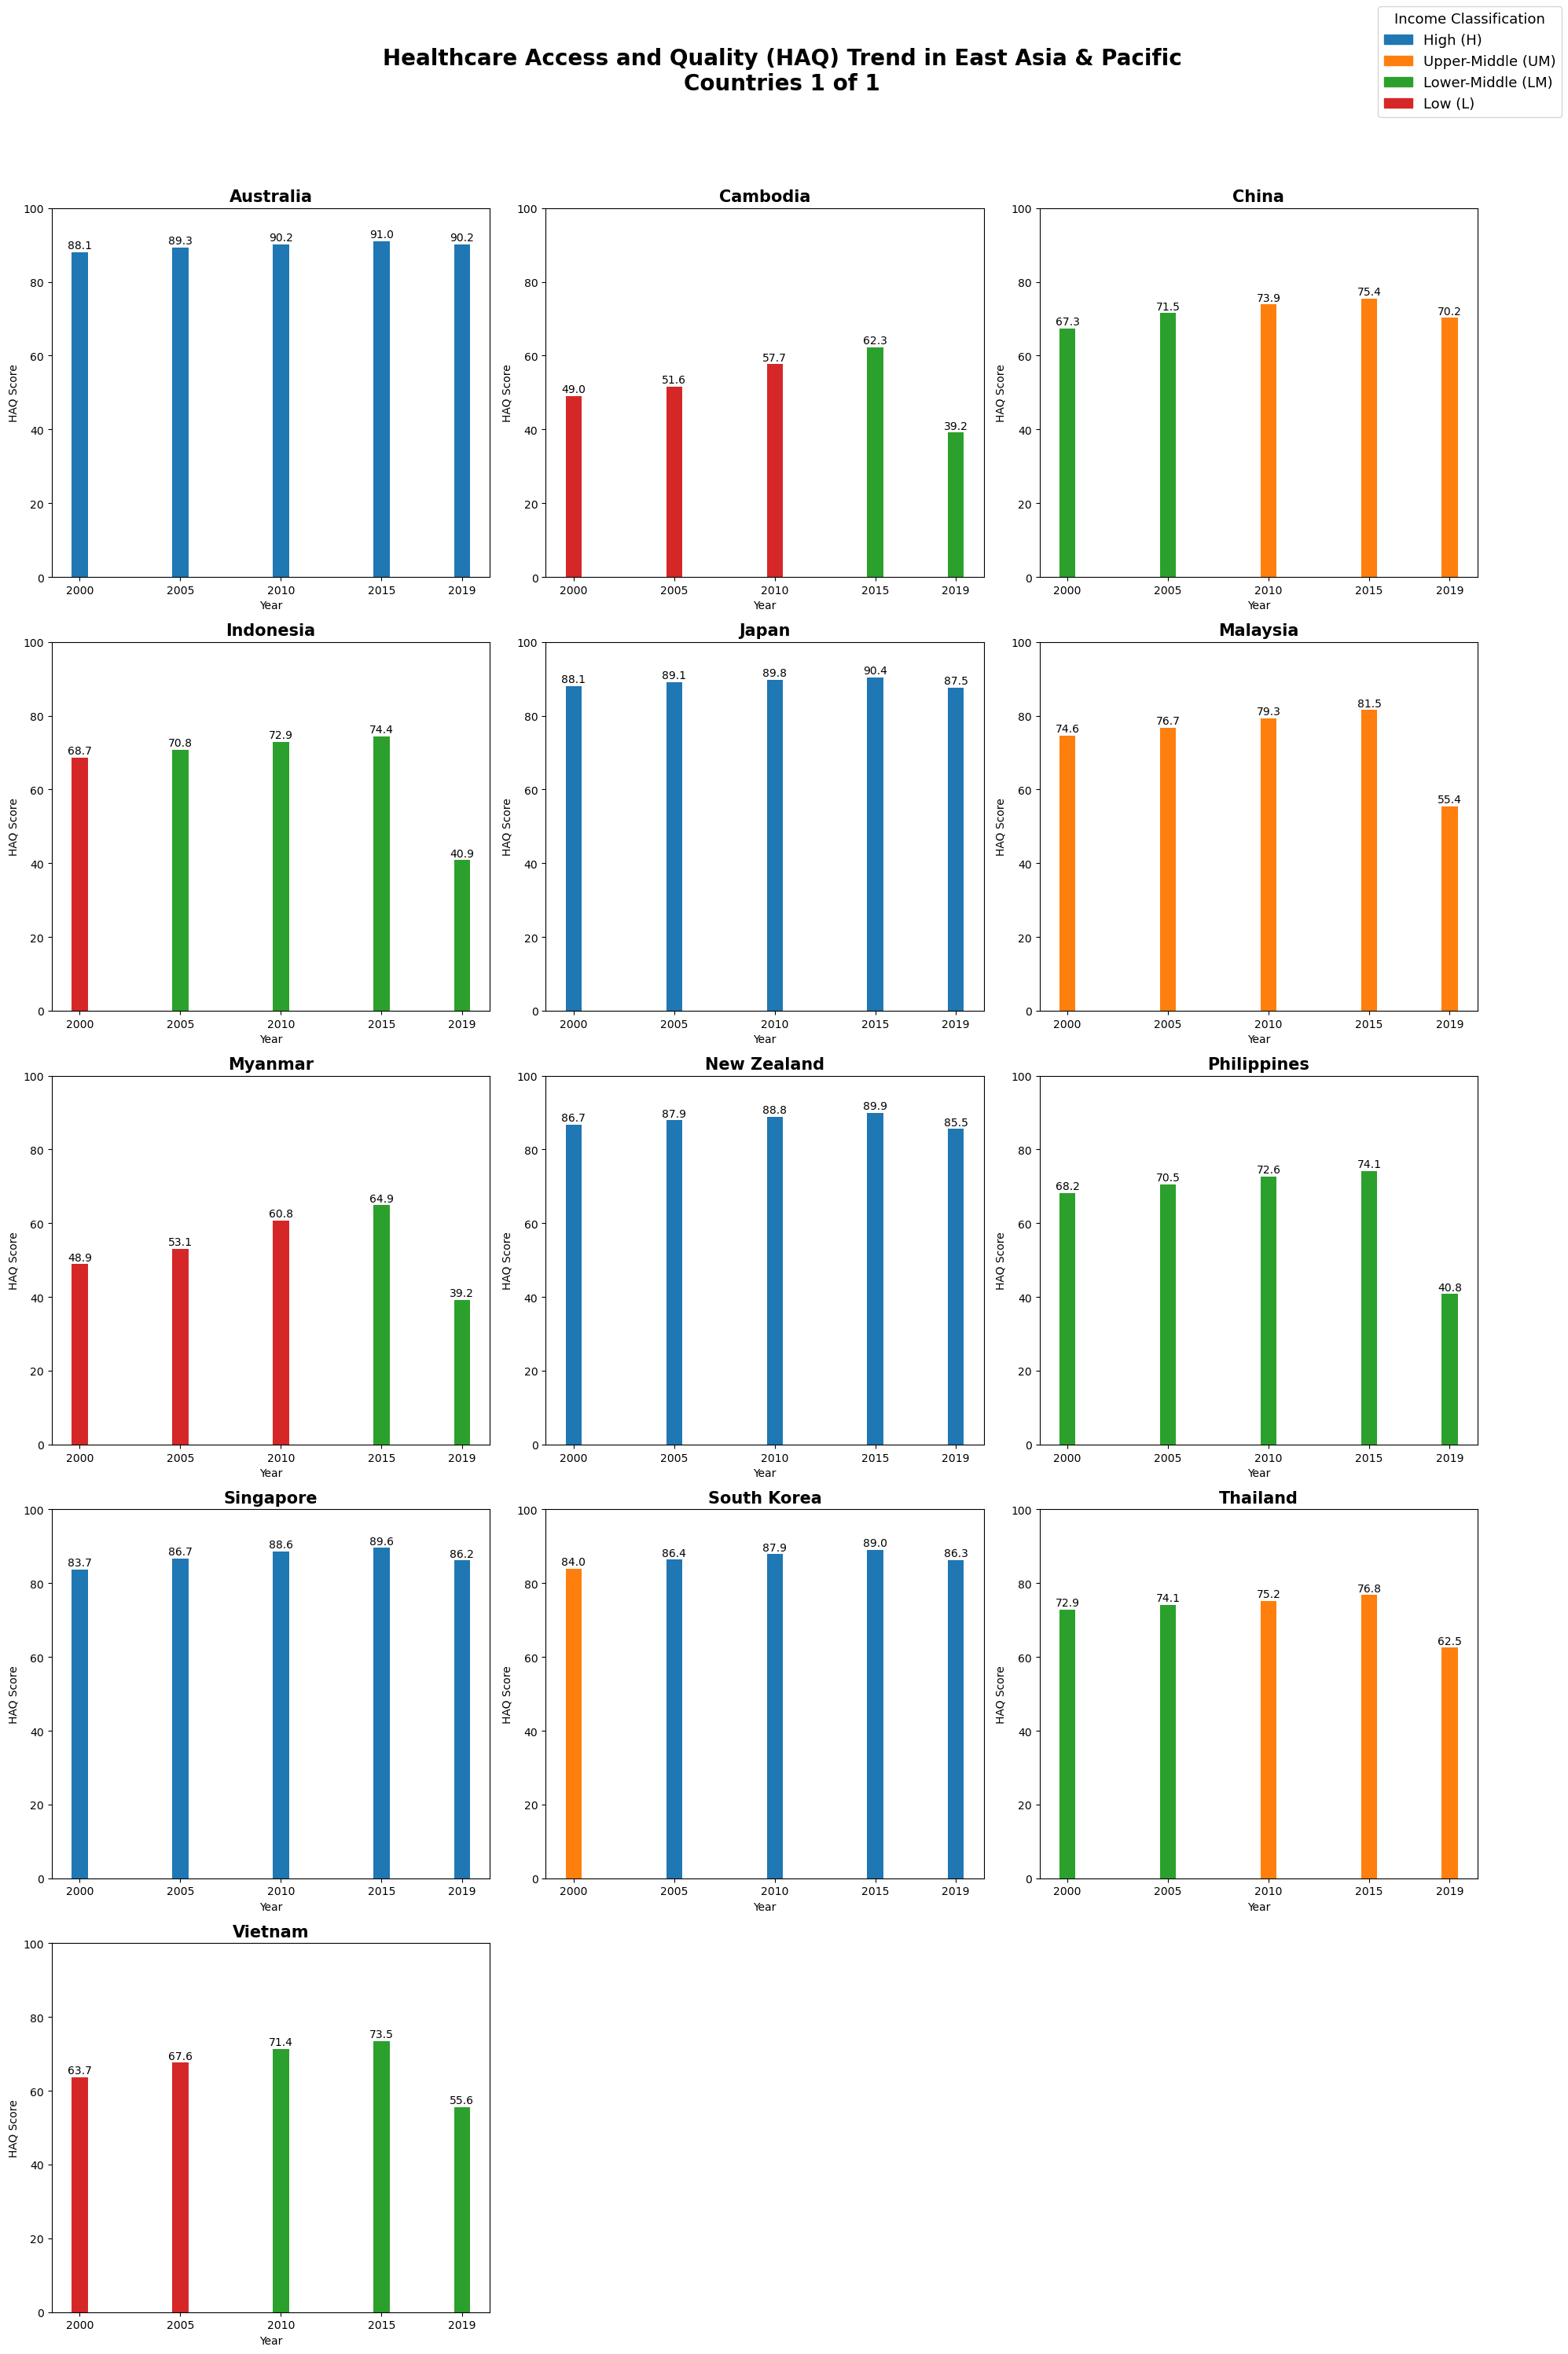

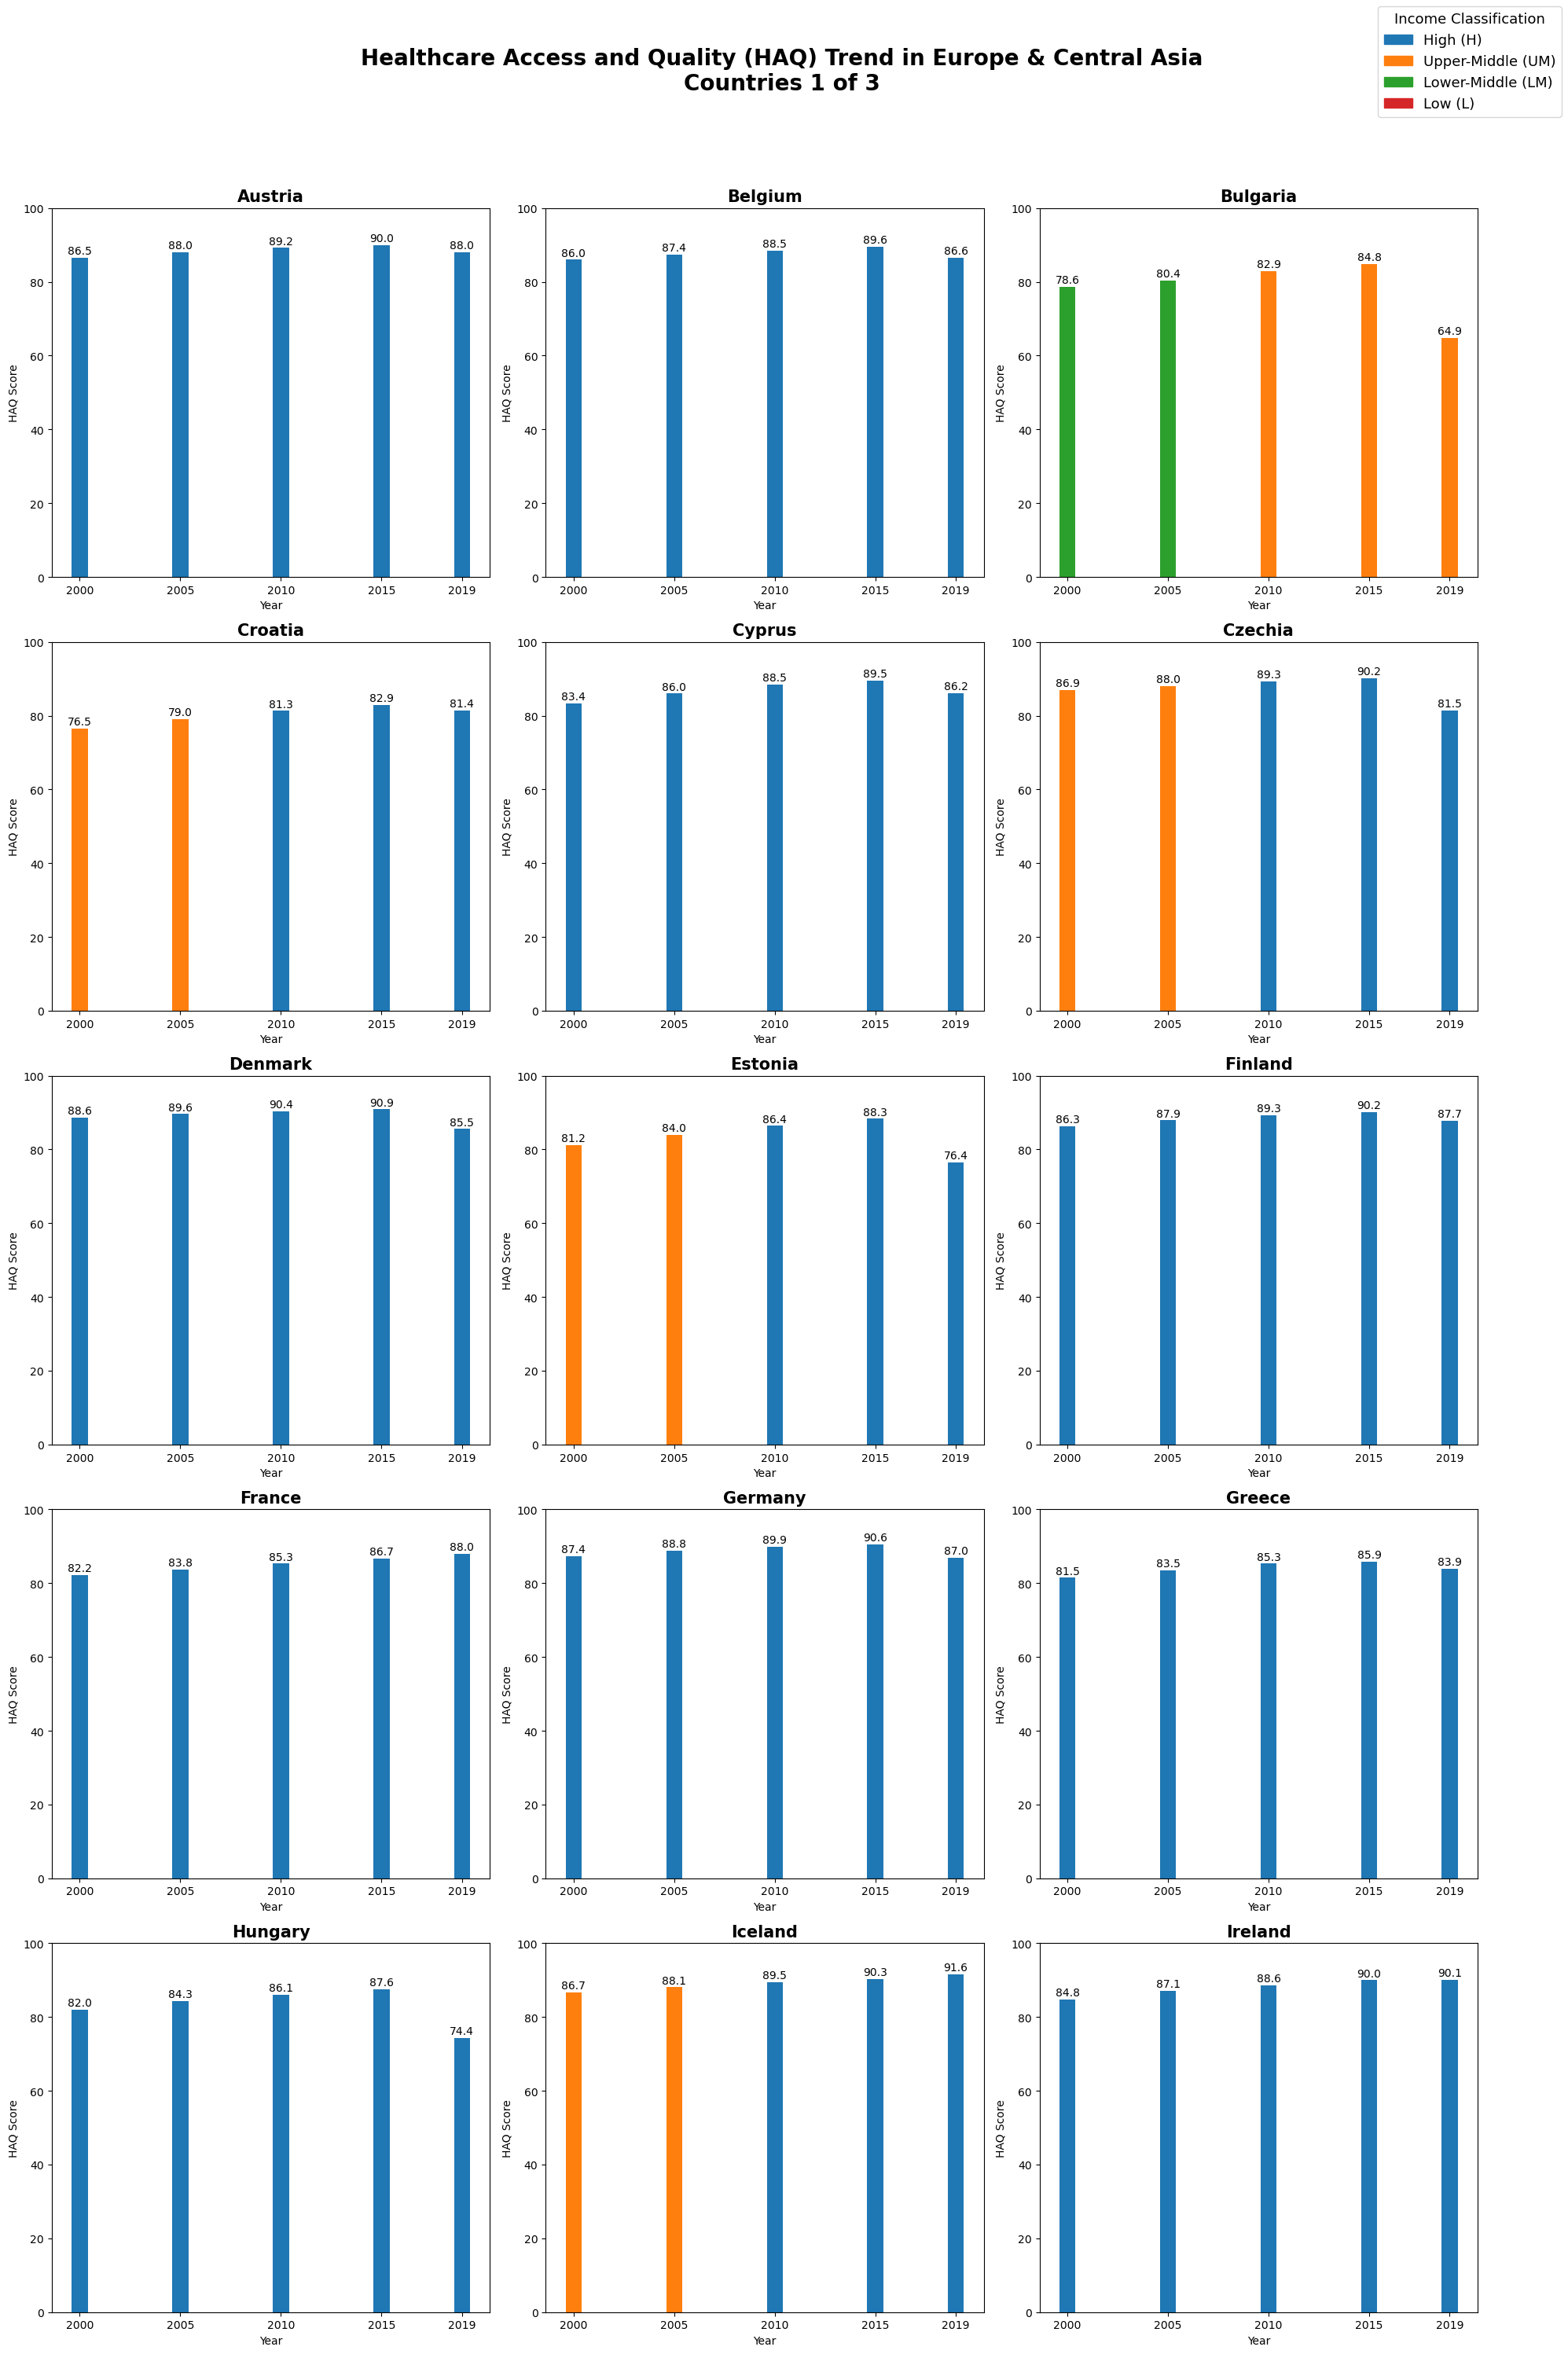

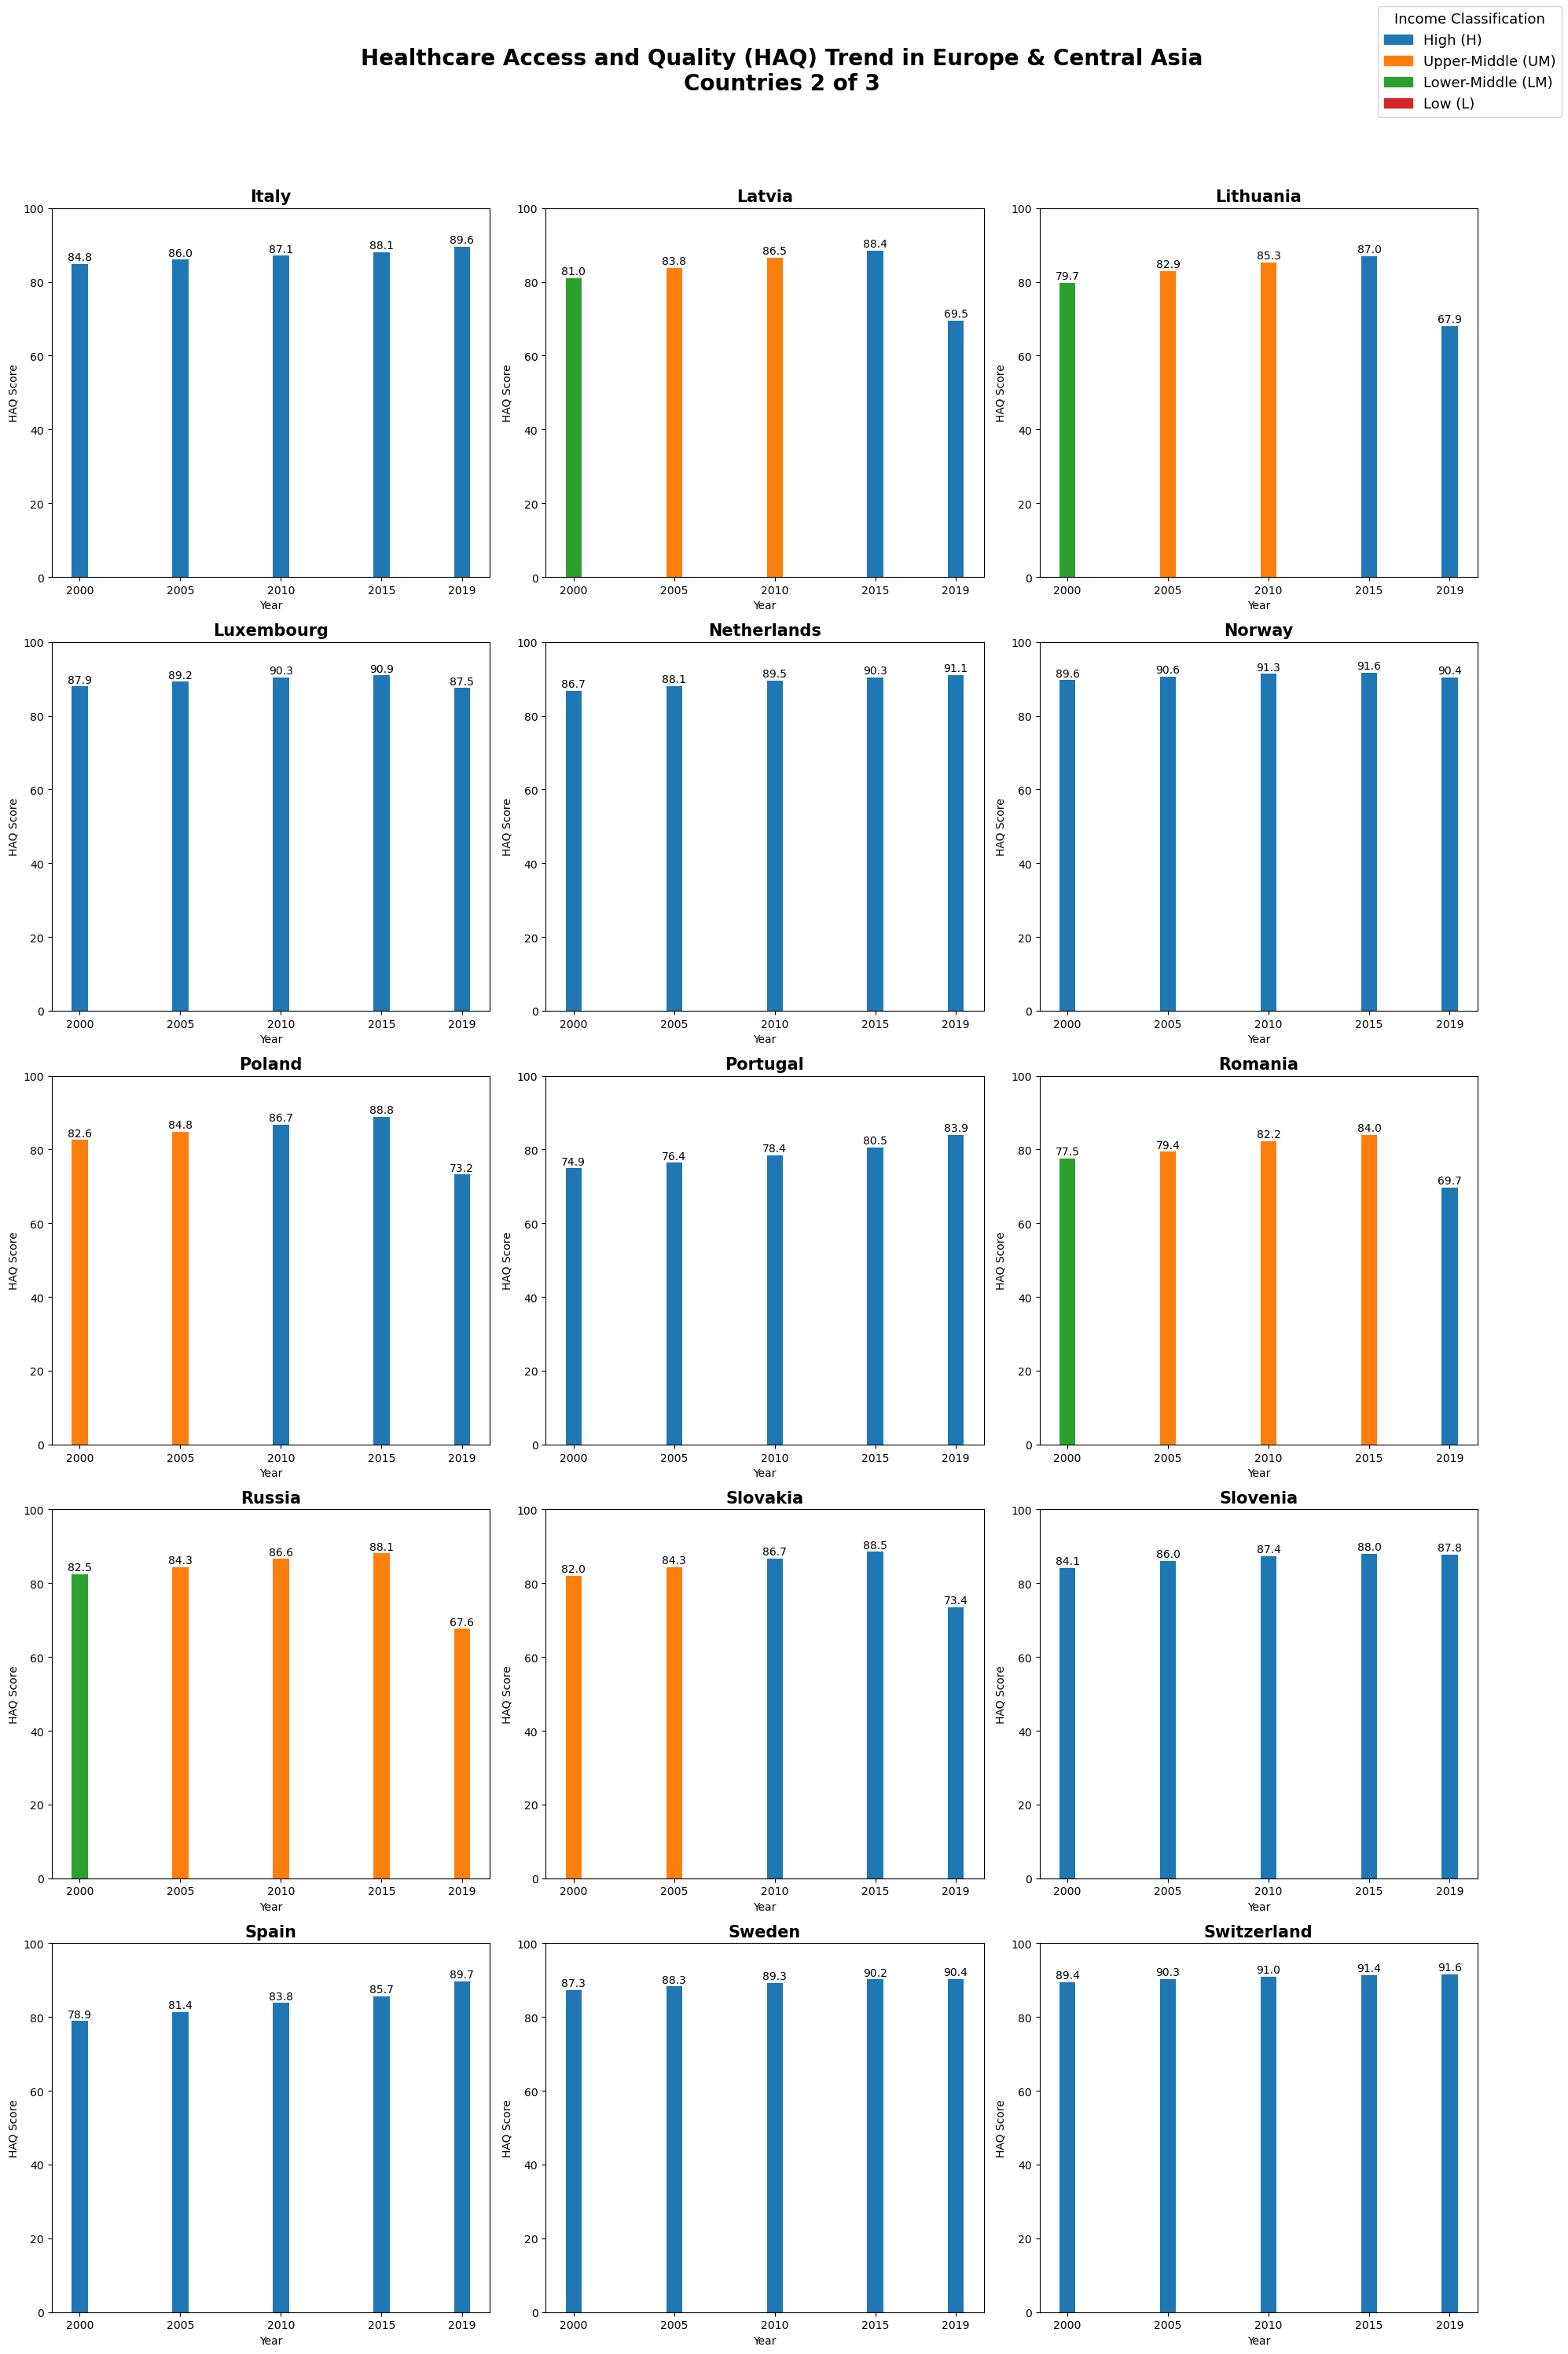

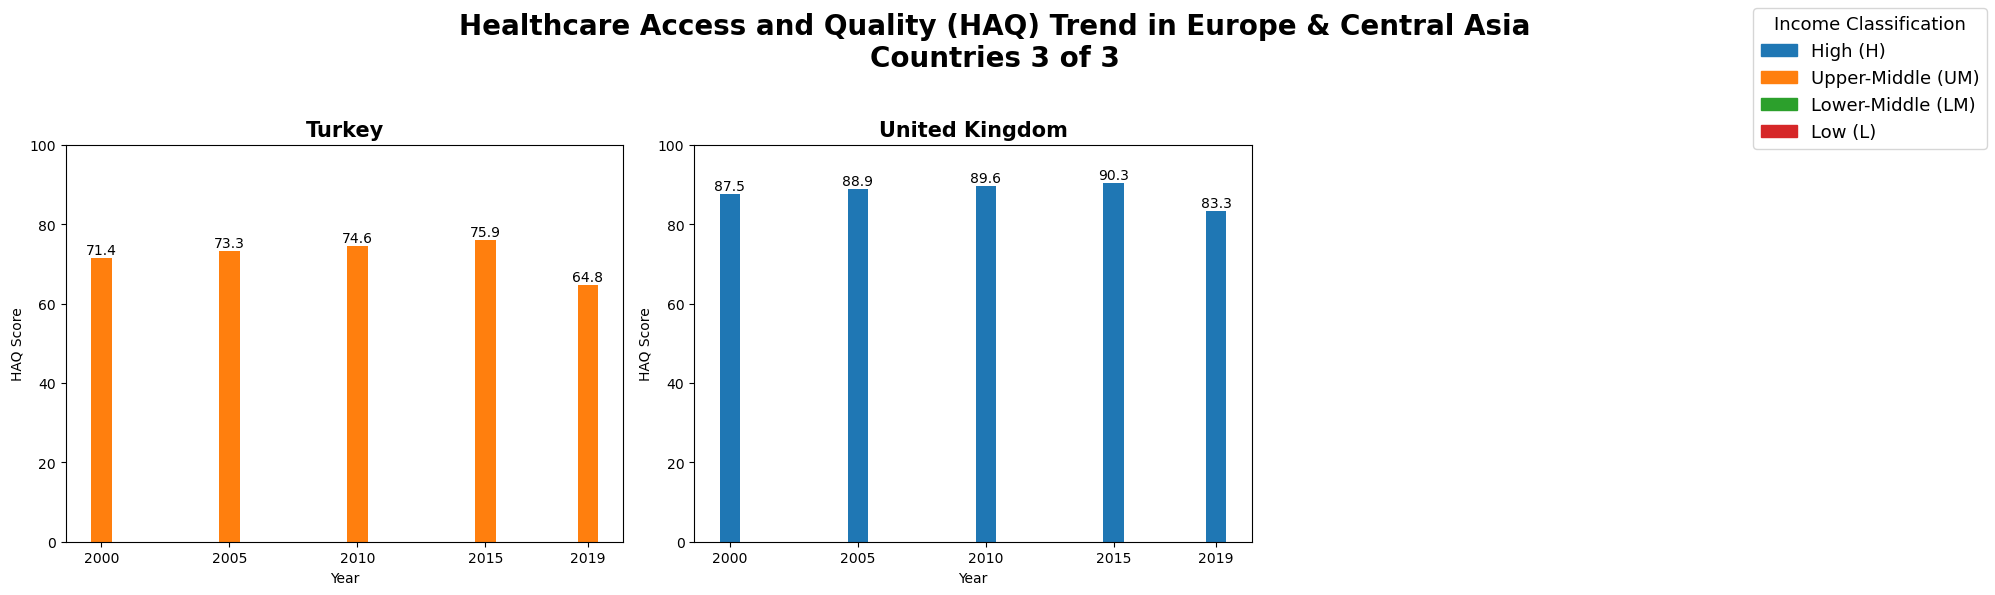

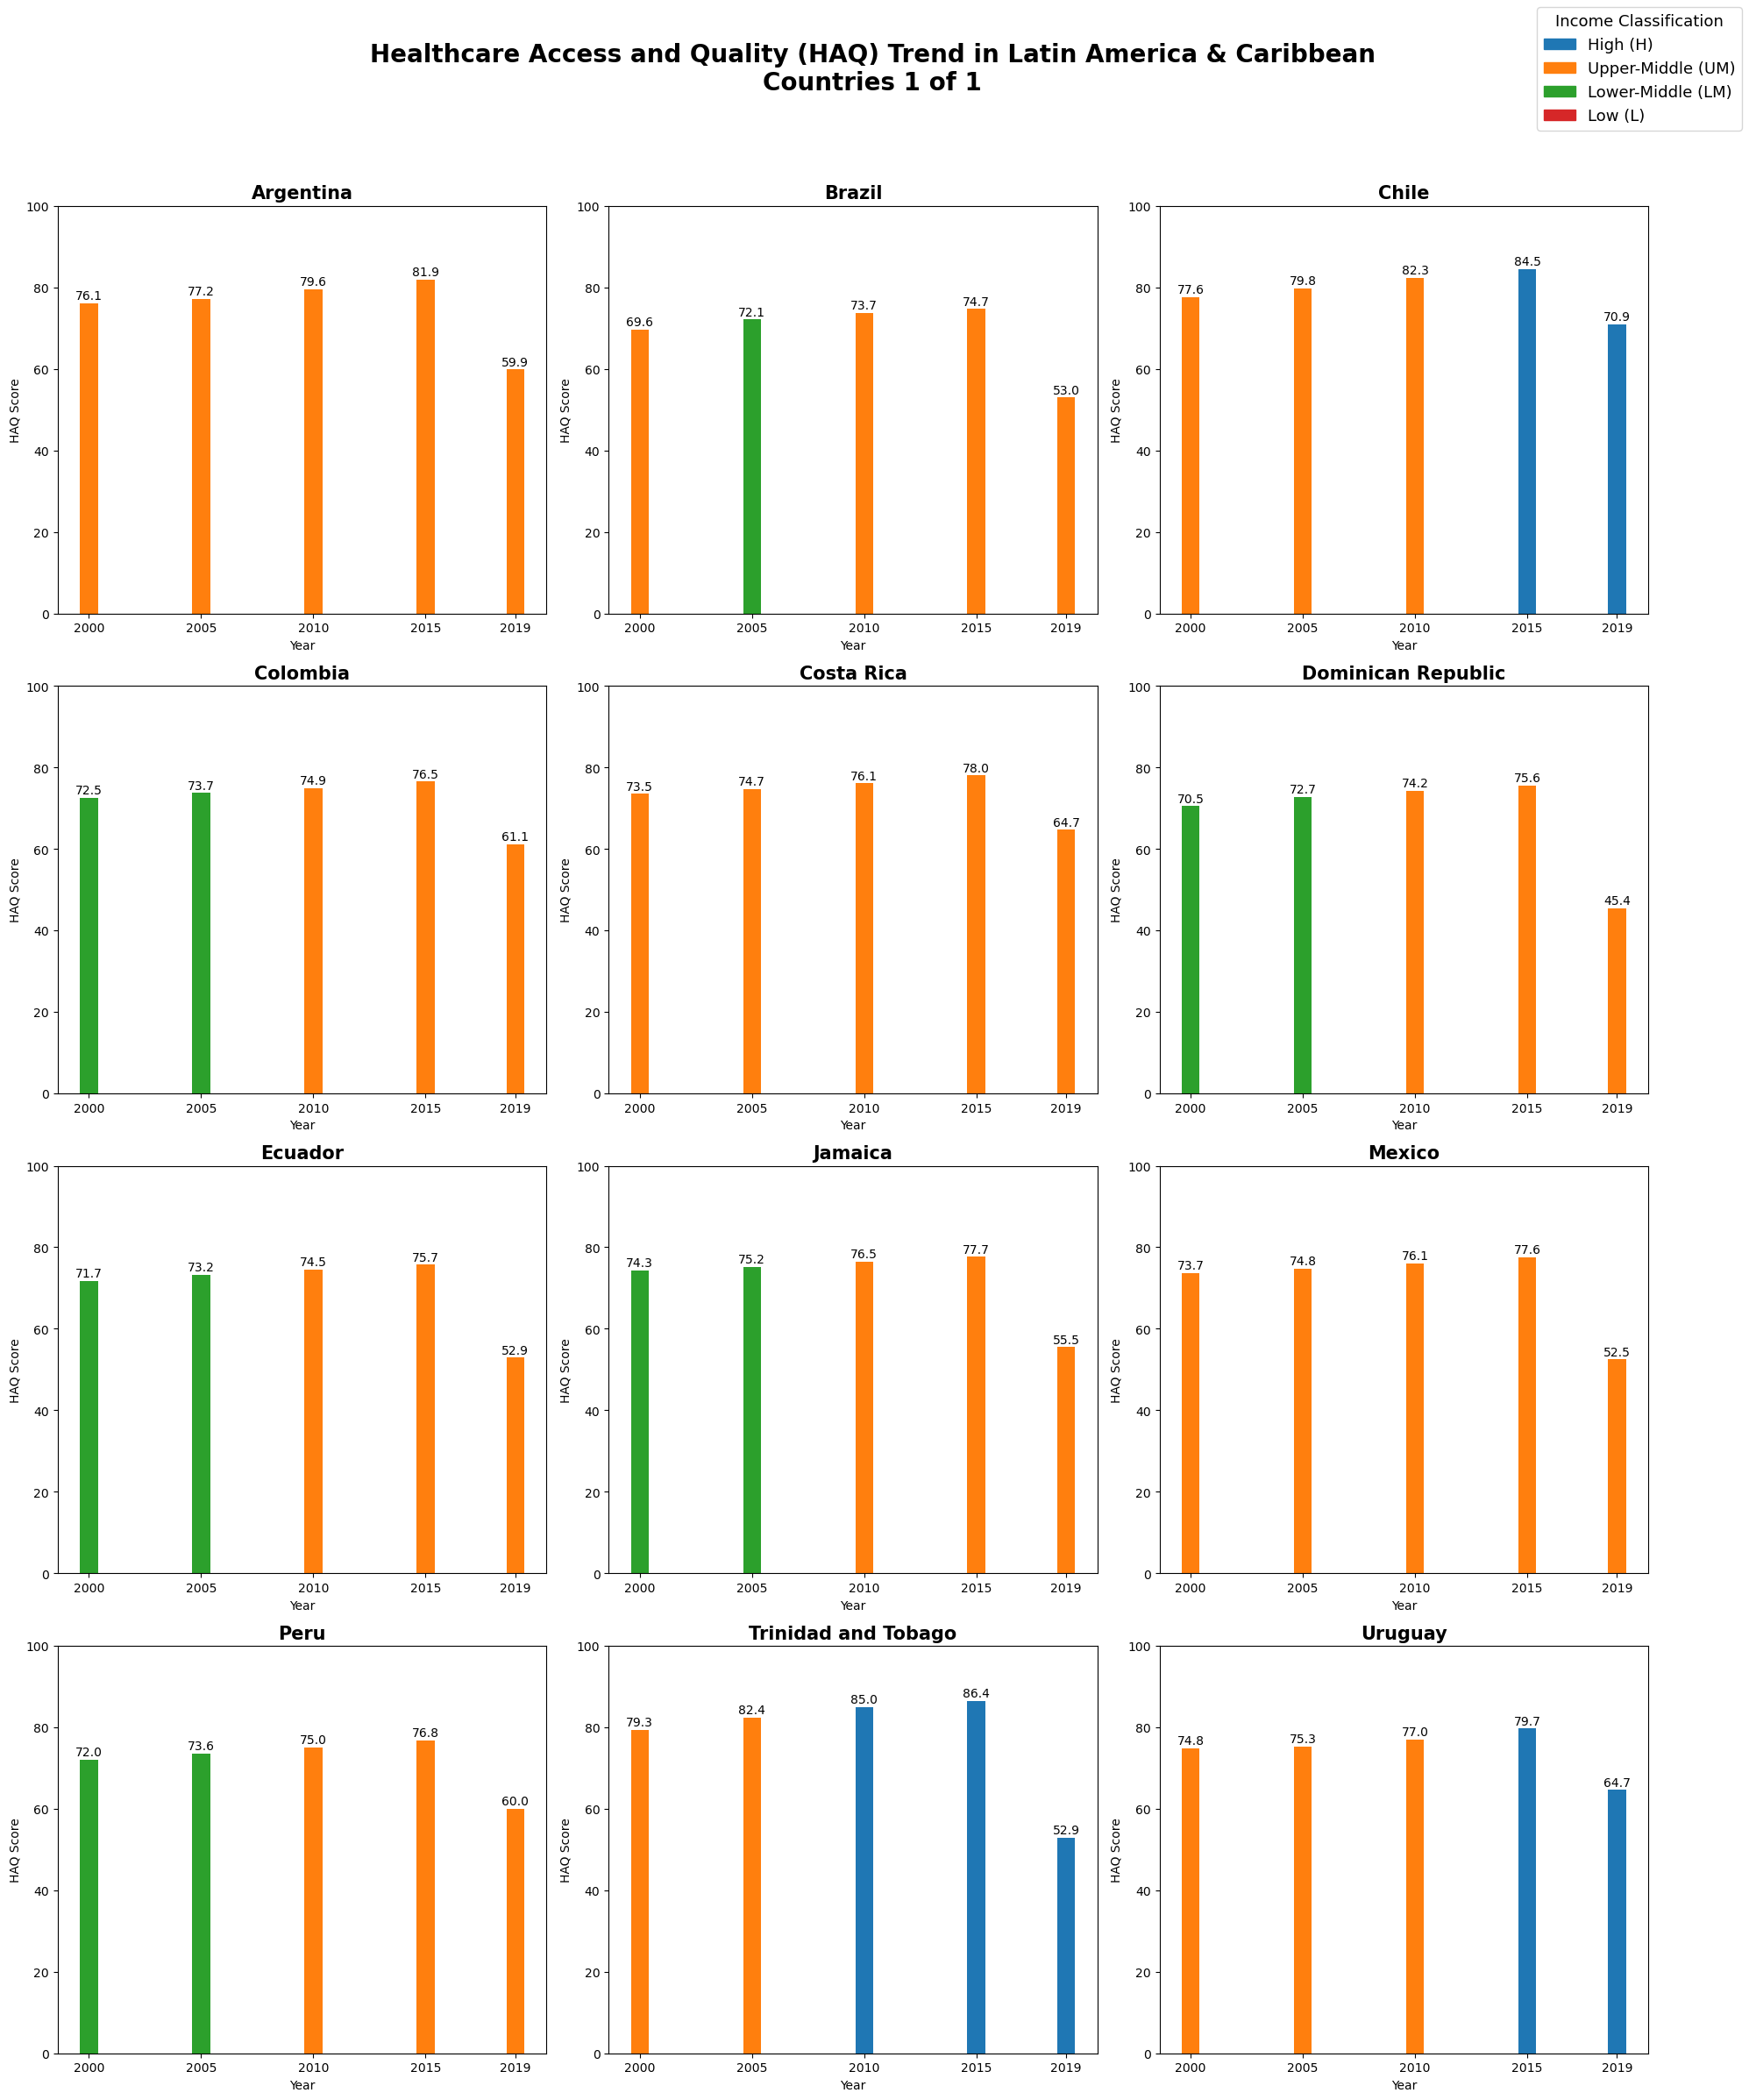

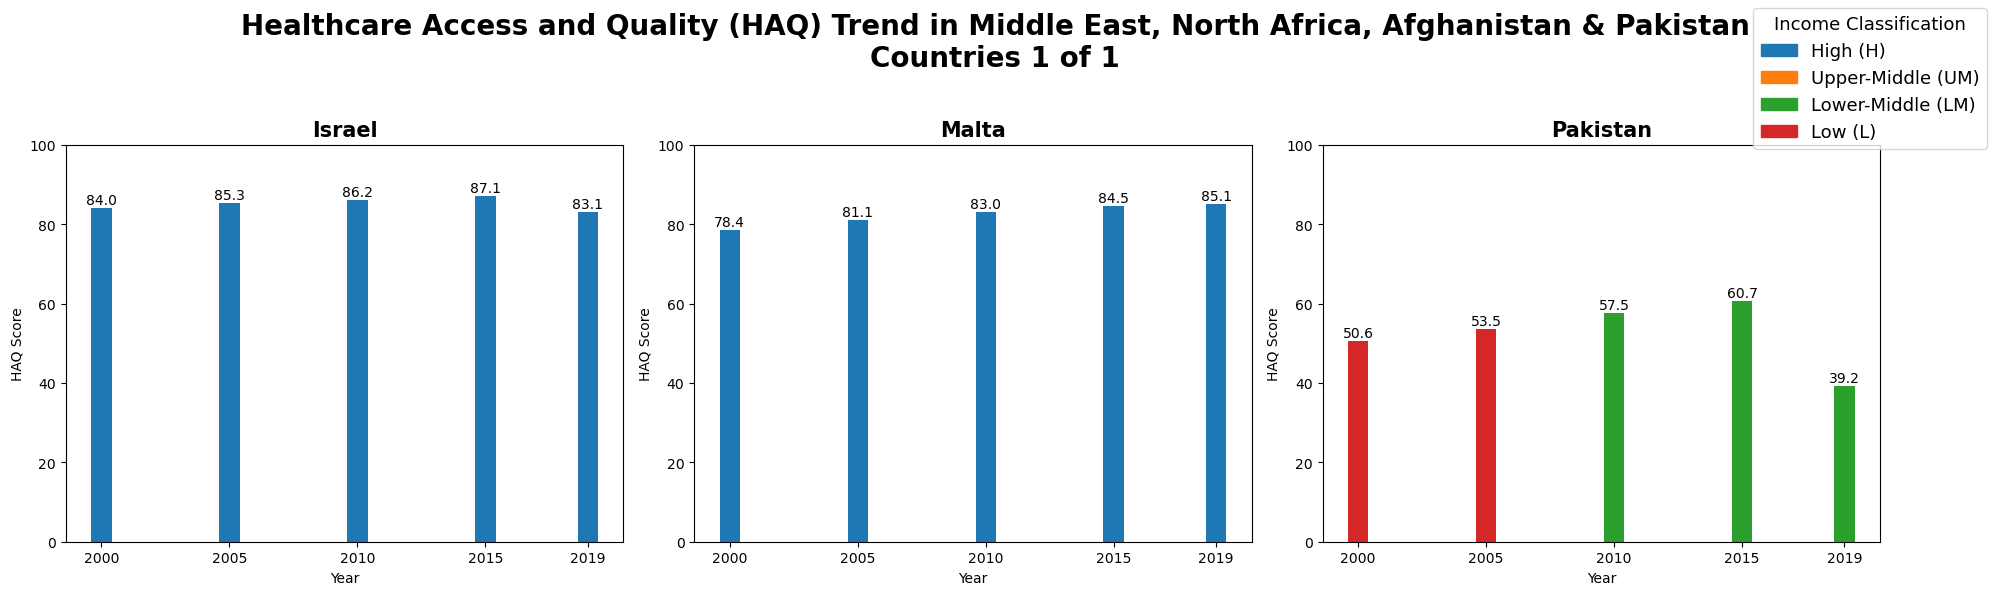

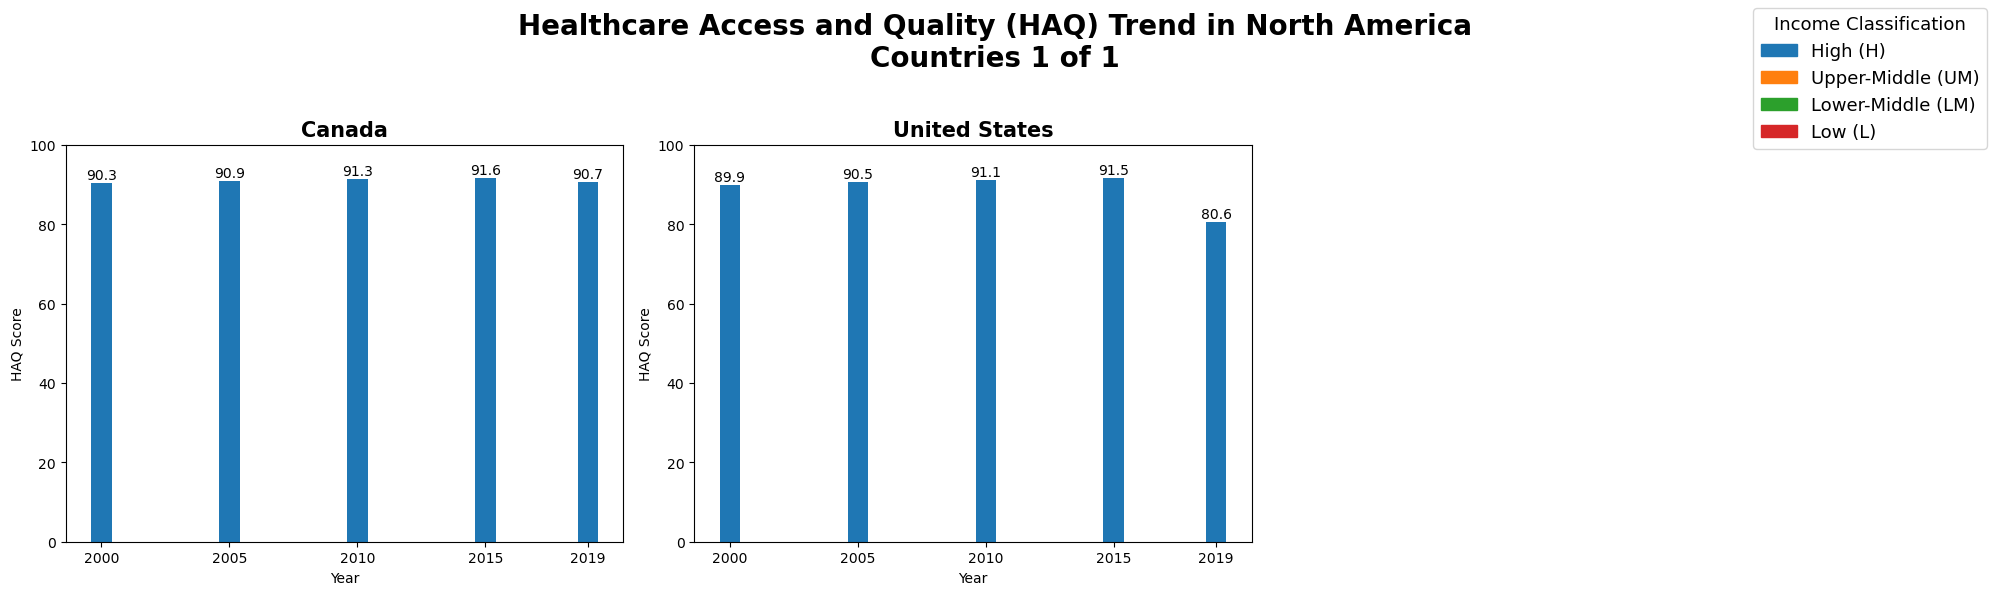

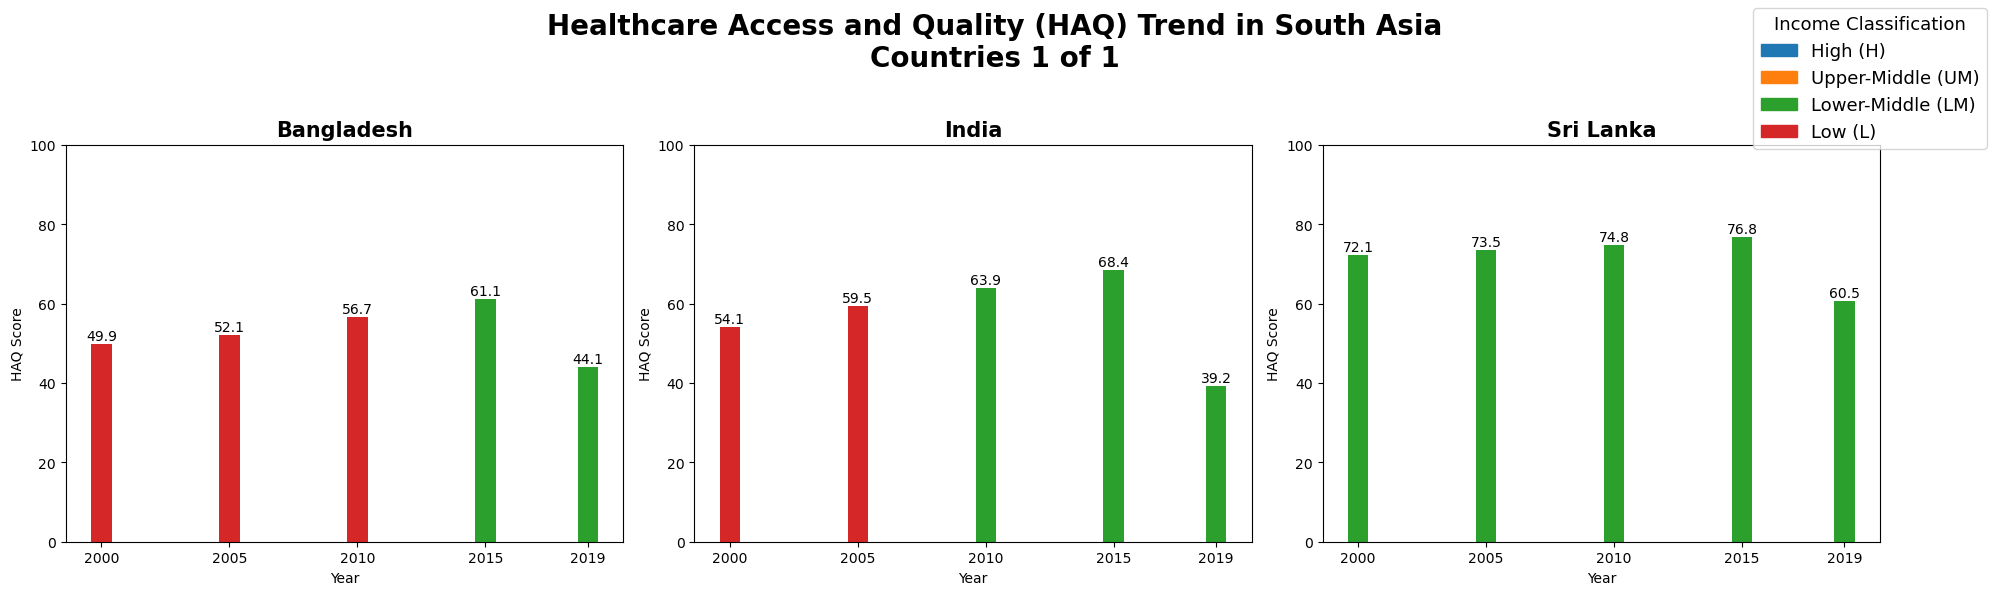

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# Make sure Year is int
df[year_col] = df[year_col].astype(int)

# Fixed years
year_ticks = [2000, 2005, 2010, 2015, 2019]

# Income colors
income_colors = {
    "H": "#1f77b4",
    "UM": "#ff7f0e",
    "LM": "#2ca02c",
    "L": "#d62728"
}

# Replace long names with short ones
clean_income = {
    "High income": "H",
    "Upper middle income": "UM",
    "Lower middle income": "LM",
    "Low income": "L"
}

df[income_col] = df[income_col].replace(clean_income)

# Regions list
regions = sorted(df[region_col].dropna().unique())

# ---------------------------------------------------
# MAIN LOOP
# ---------------------------------------------------
for region in regions:

    df_r = df[df[region_col] == region]
    countries = sorted(df_r[country_col].unique())

    # Split into groups of 15 countries
    chunk_size = 15
    country_groups = [countries[i:i + chunk_size] for i in range(0, len(countries), chunk_size)]

    # Loop each chunk
    for group_idx, group in enumerate(country_groups, start=1):

        n_countries = len(group)
        cols = 3
        rows = math.ceil(n_countries / cols)

        fig, axes = plt.subplots(rows, cols, figsize=(20, 6 * rows))
        axes = axes.flatten()

        fig.suptitle(
            f"Healthcare Access and Quality (HAQ) Trend in {region}\nCountries {group_idx} of {len(country_groups)}",
            fontsize=20, weight='bold', y=0.98
        )

        # -------------------------------
        # Plot per country
        # -------------------------------
        for i, country in enumerate(group):

            ax = axes[i]

            df_c = df_r[df_r[country_col] == country].sort_values(year_col)
            years = df_c[year_col]
            haq_values = df_c[haq_col]

            # Colors per income
            bar_colors = df_c[income_col].map(income_colors).fillna("gray")

            ax.bar(years, haq_values, color=bar_colors)

            # Value labels
            for x, y in zip(years, haq_values):
                ax.text(x, y + 1, f"{y:.1f}", ha='center', fontsize=10)

            ax.set_title(country, fontsize=15, weight='bold')
            ax.set_ylim(0, 100)

            # Fixed x-ticks
            ax.set_xticks(year_ticks)
            ax.set_xticklabels(
                [str(y) if y in years.values else "" for y in year_ticks],
                fontsize=10
            )

            ax.set_xlabel("Year")
            ax.set_ylabel("HAQ Score")

        # Remove unused axes
        for j in range(i + 1, rows * cols):
            fig.delaxes(axes[j])

        # Legend
        handles = [plt.Rectangle((0,0),1,1, color=income_colors[k]) for k in income_colors]
        labels = ["High (H)", "Upper-Middle (UM)", "Lower-Middle (LM)", "Low (L)"]

        fig.legend(
            handles, labels,
            title="Income Classification",
            loc="upper right", fontsize=13, title_fontsize=13
        )

        plt.tight_layout(rect=[0, 0, 0.95, 0.95])

        # Save file per group
        filename = f"haqbar5x3_w_region_income_{region.replace(' ', '_')}_part{group_idx}.png"
        plt.savefig(filename, dpi=300, bbox_inches="tight")
        plt.show()


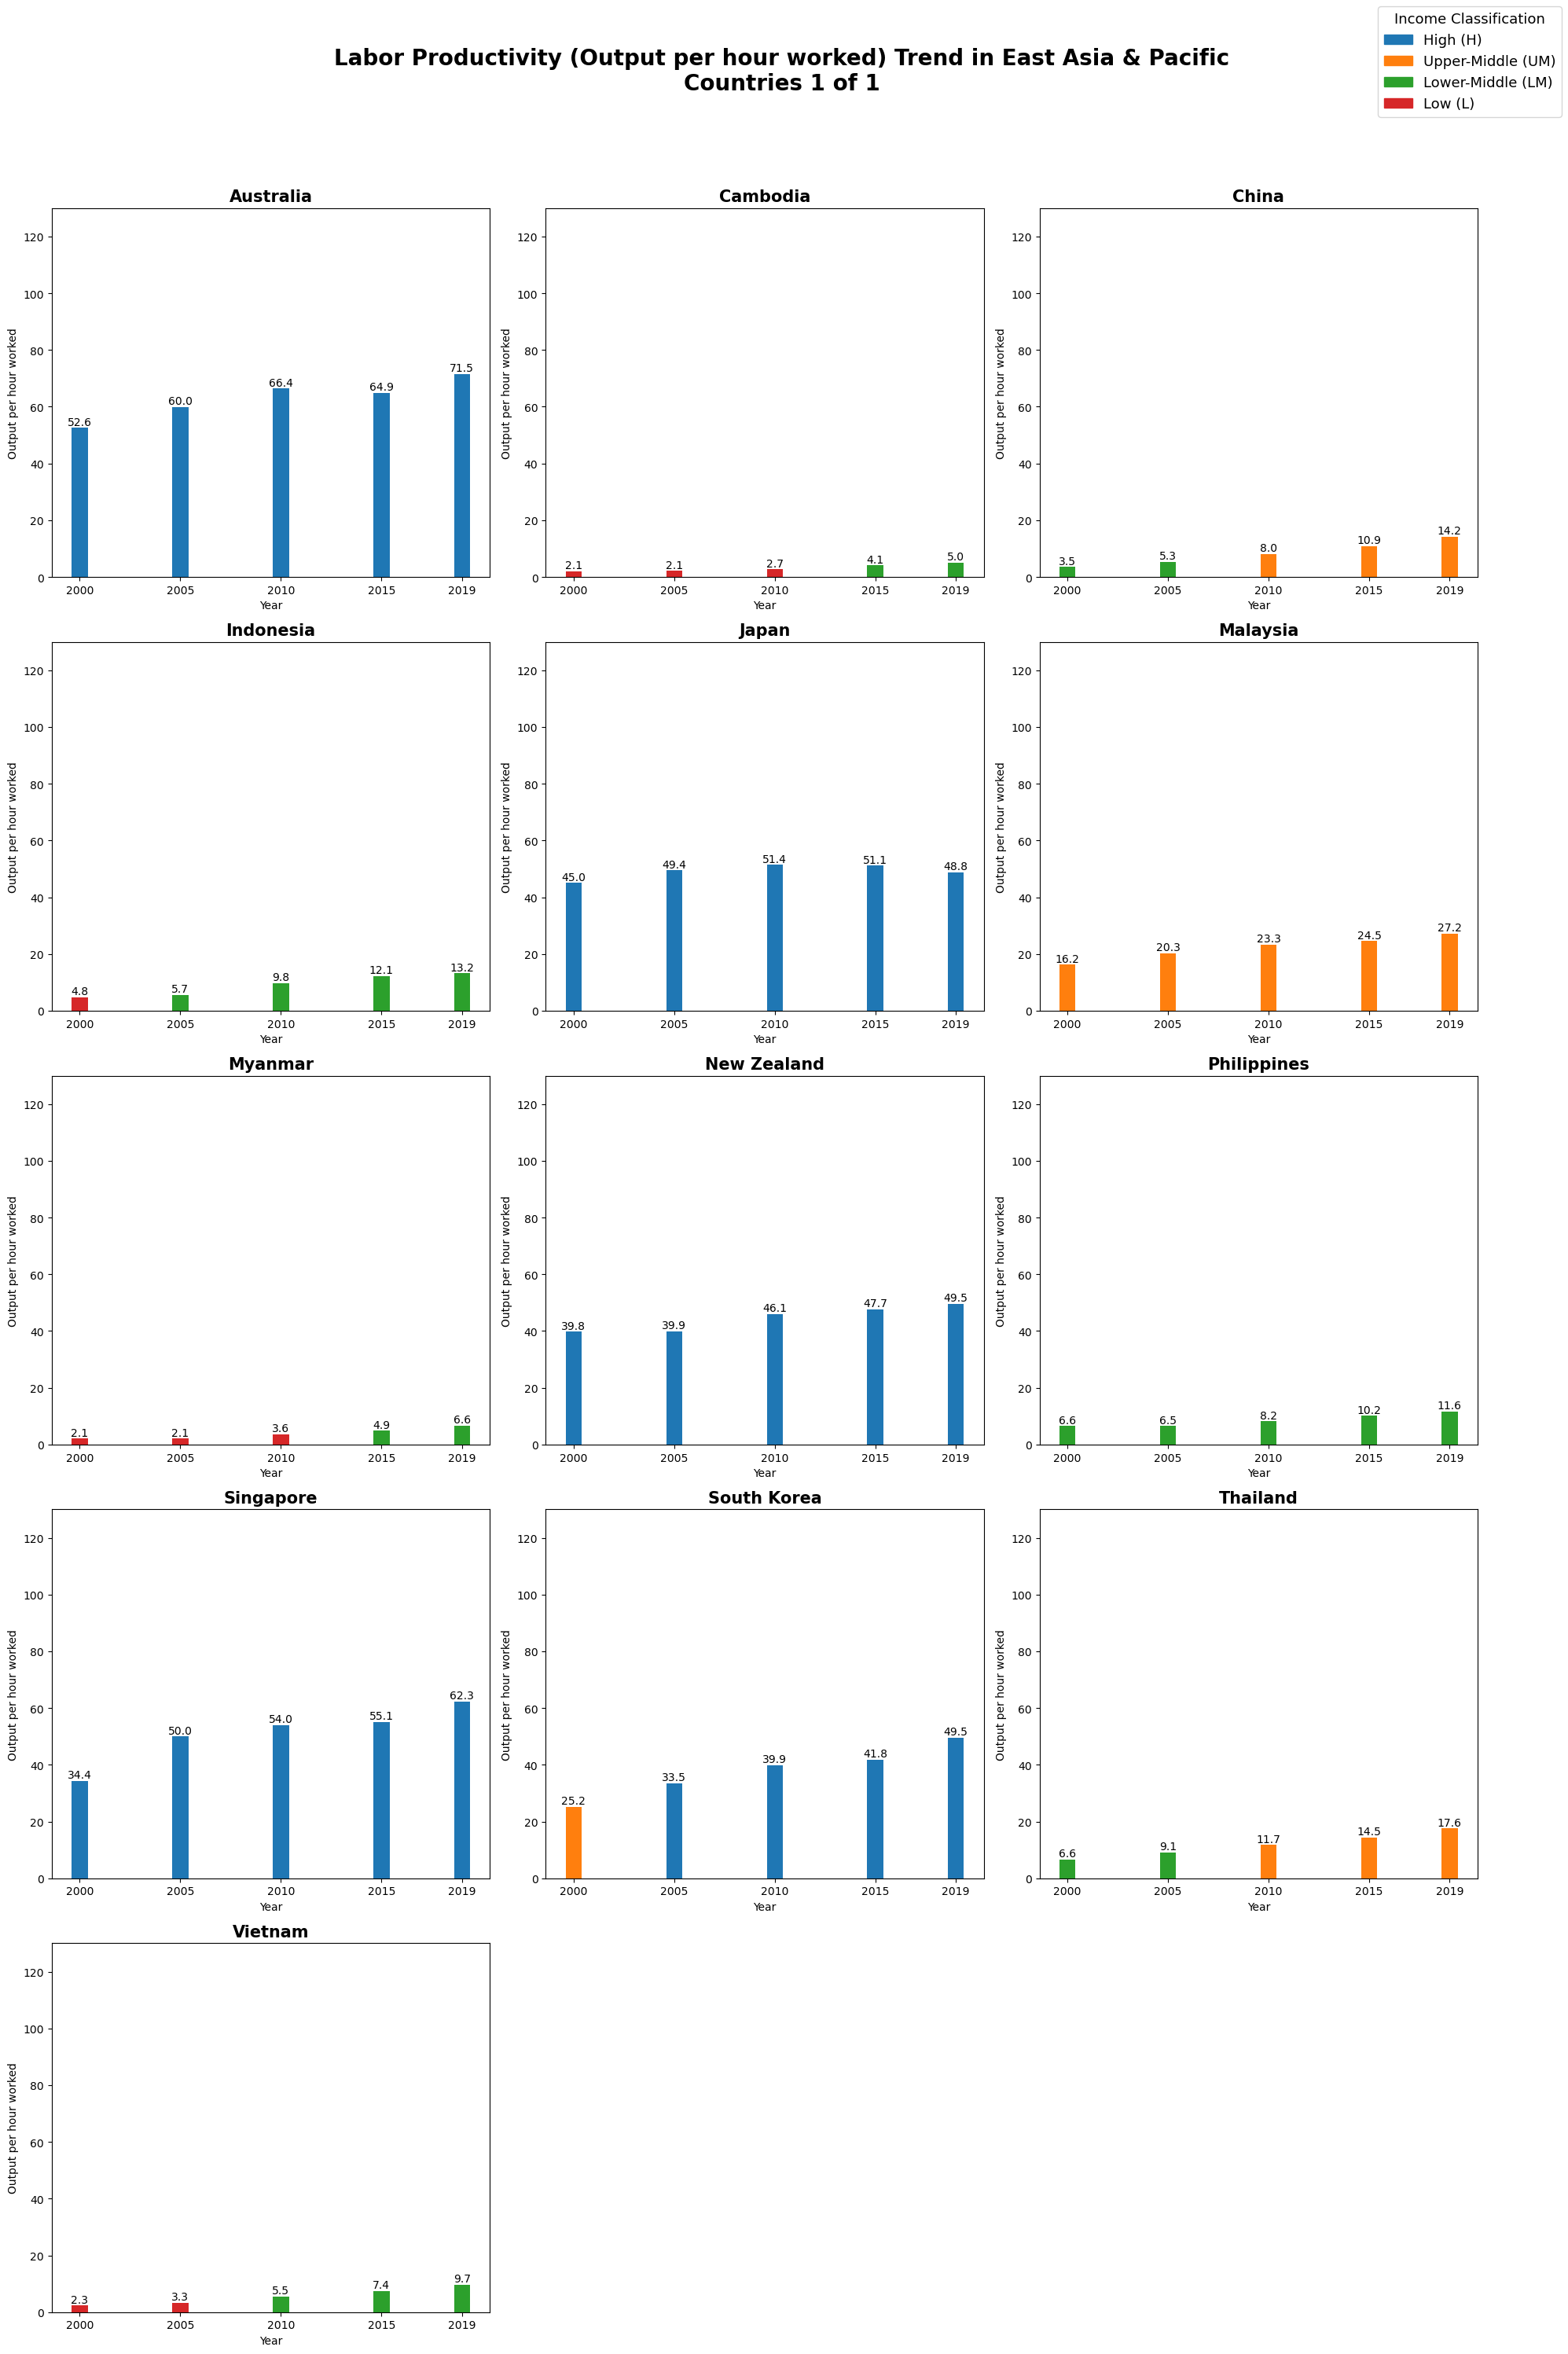

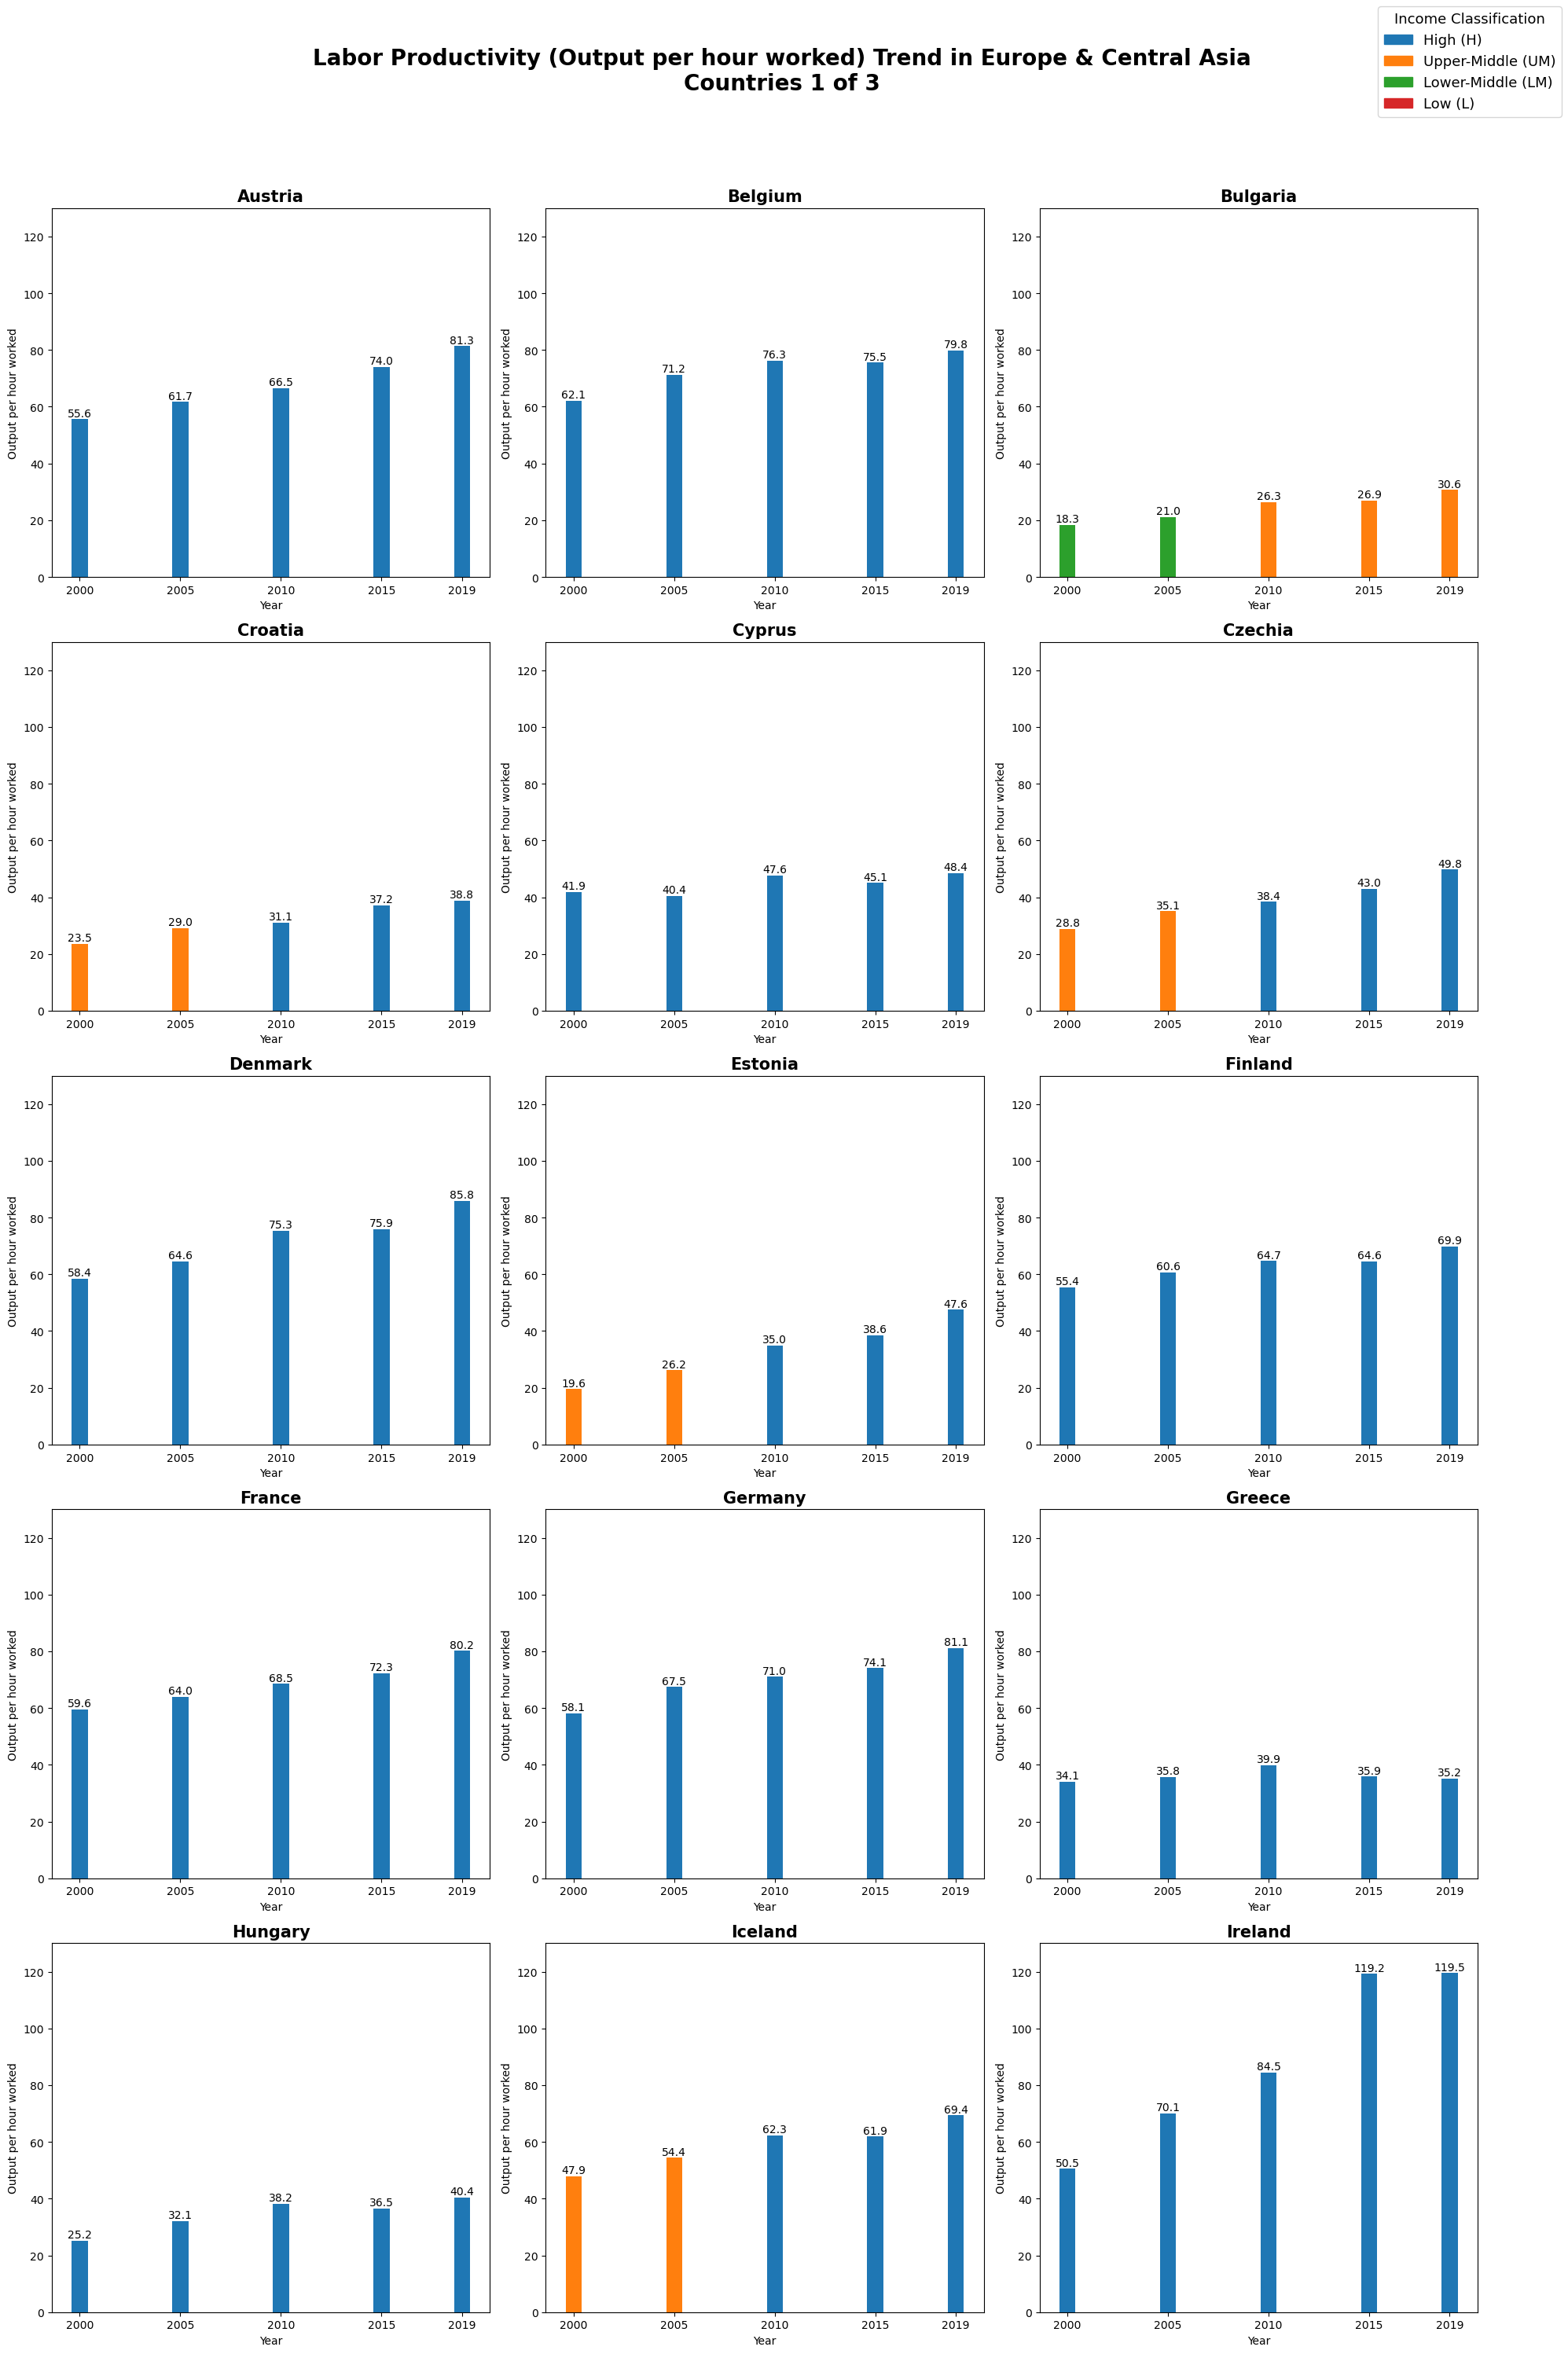

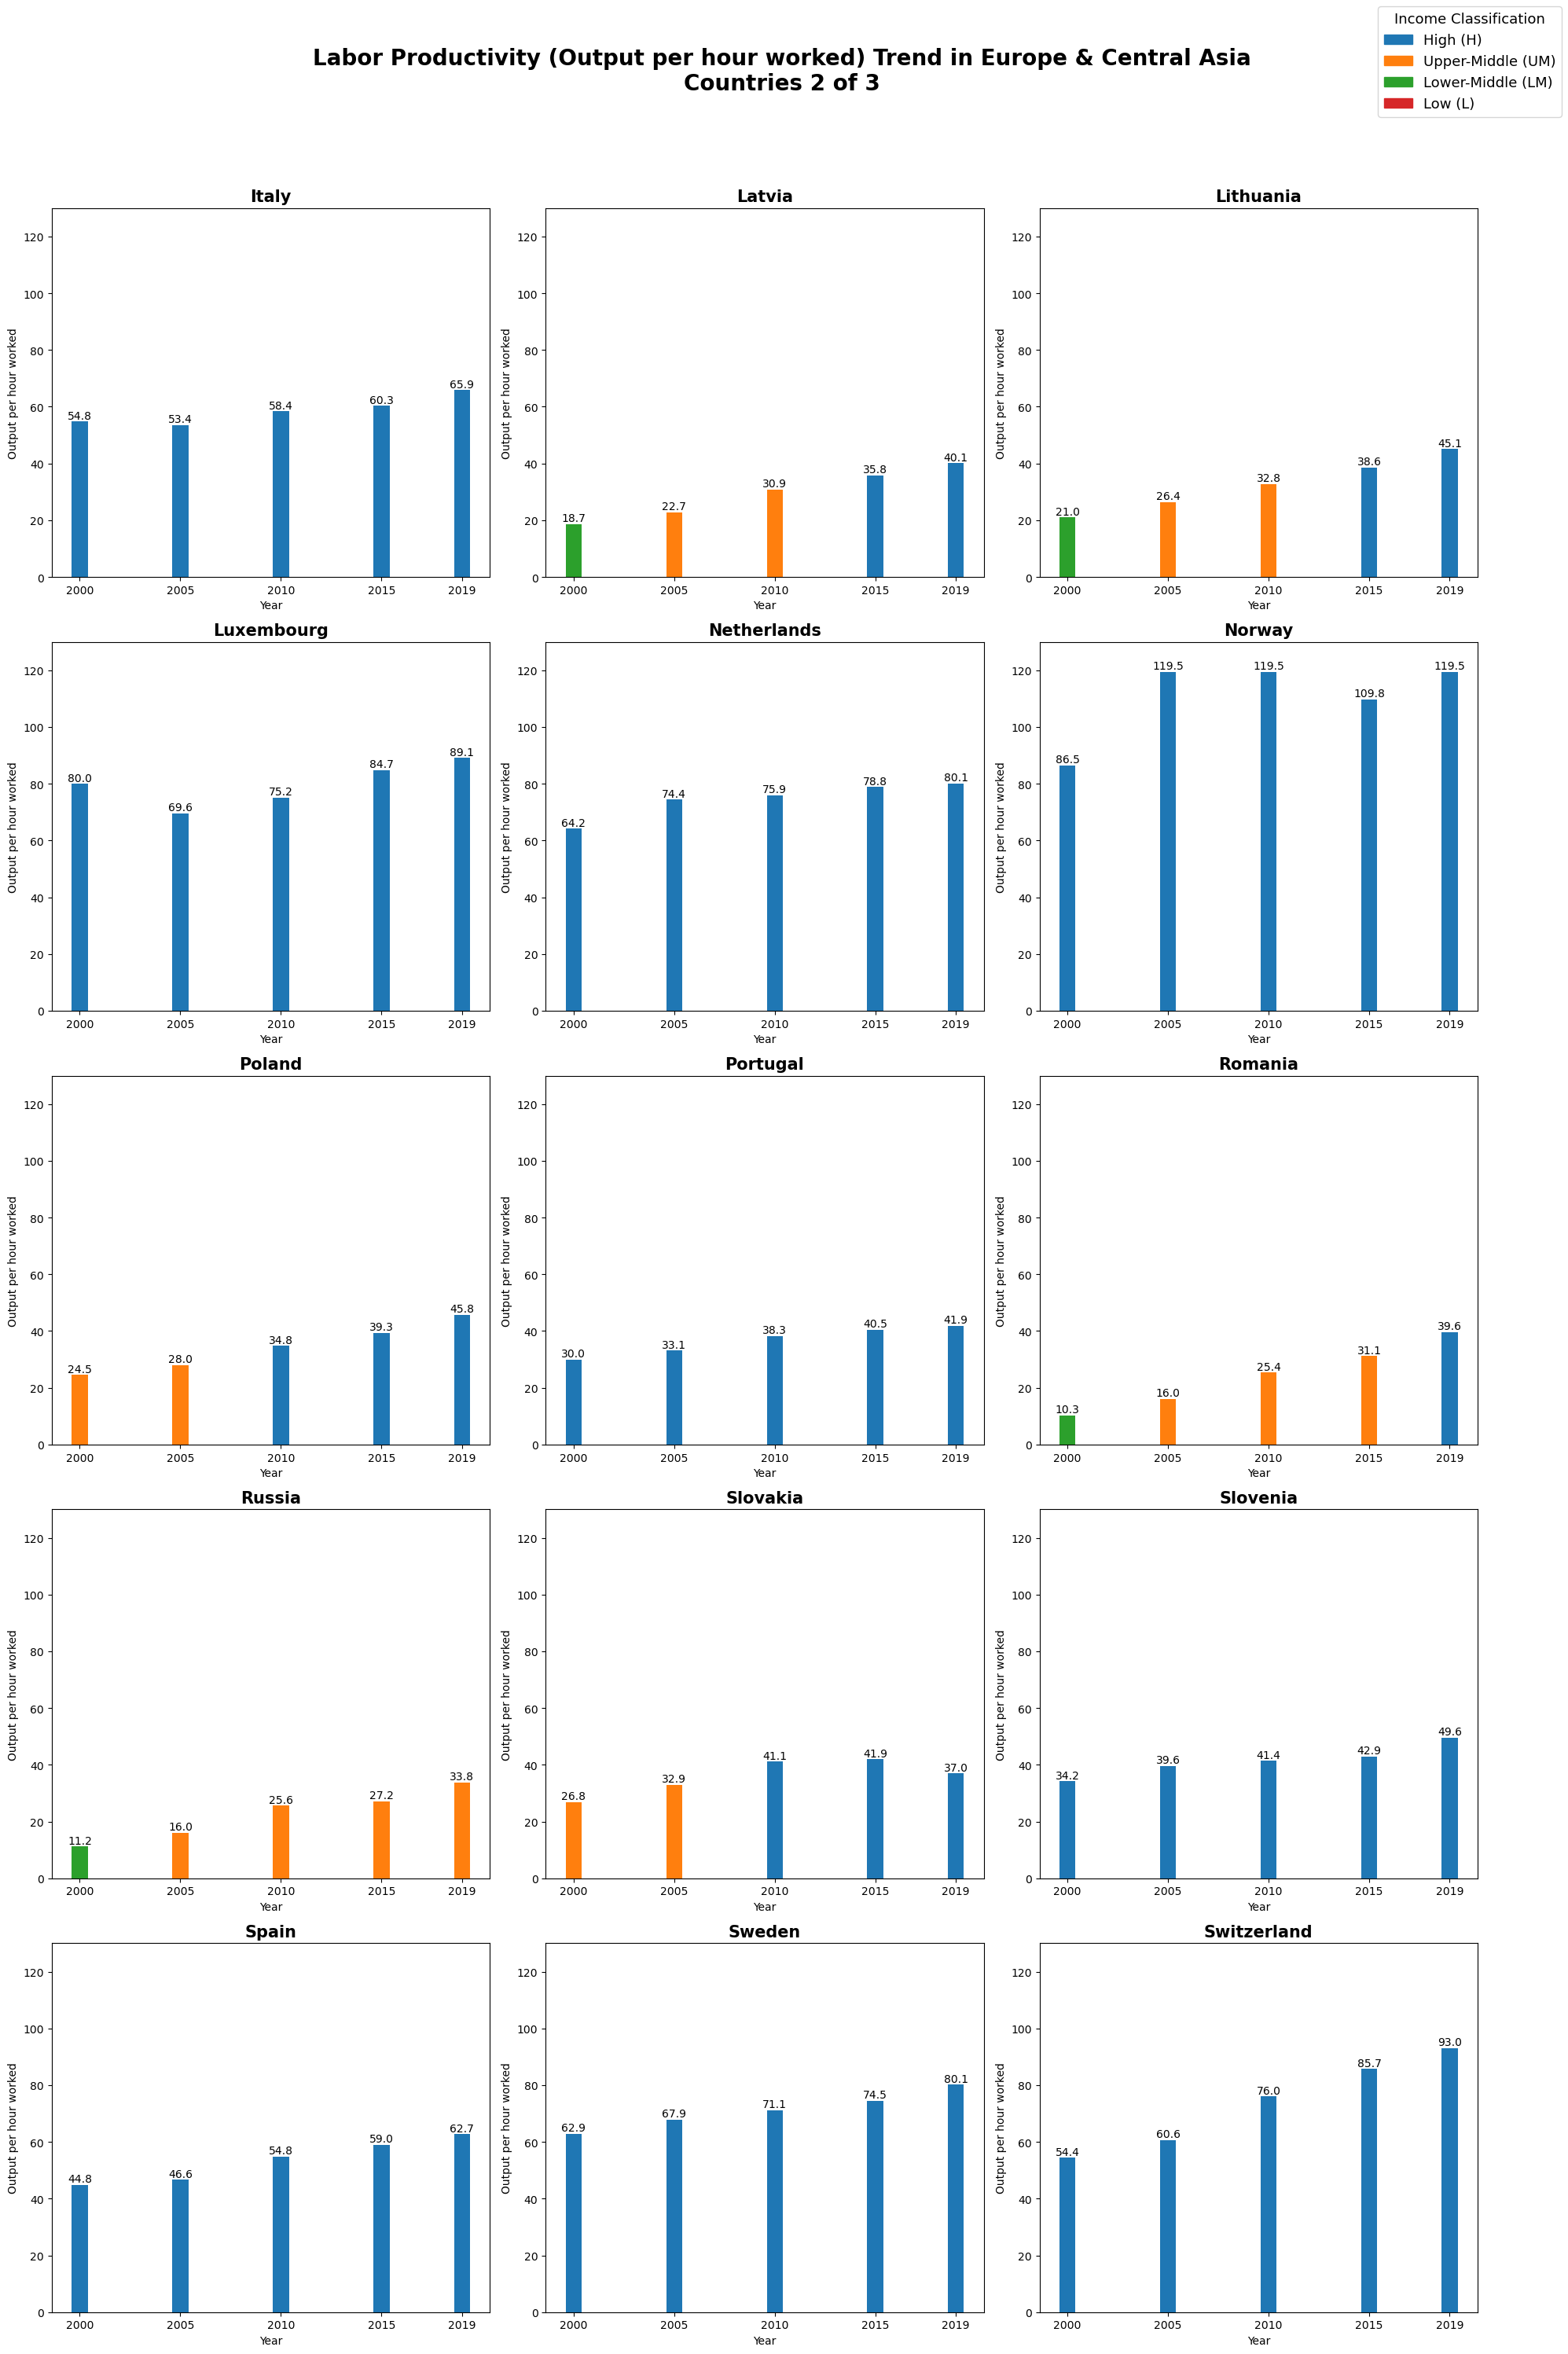

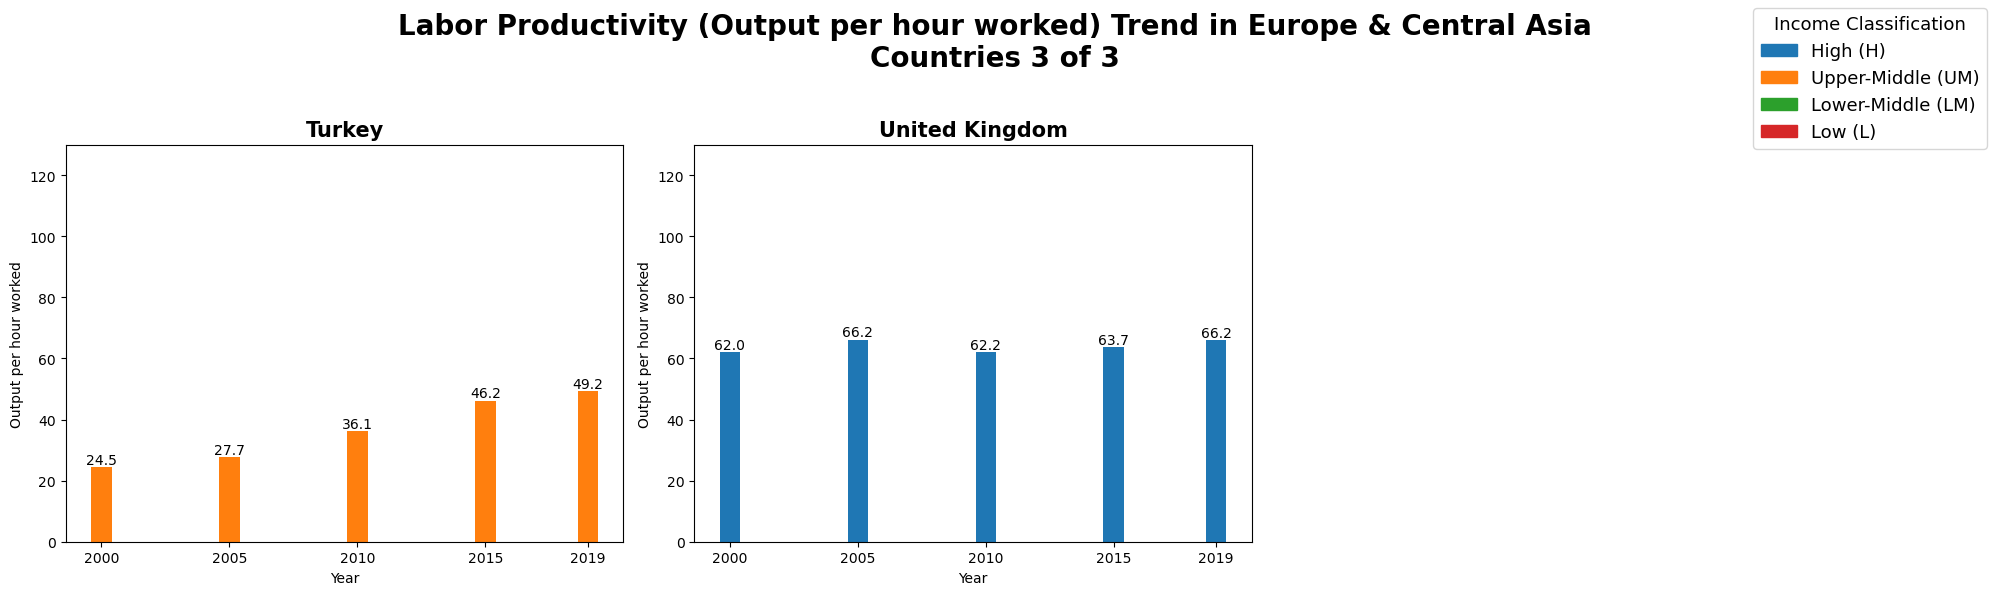

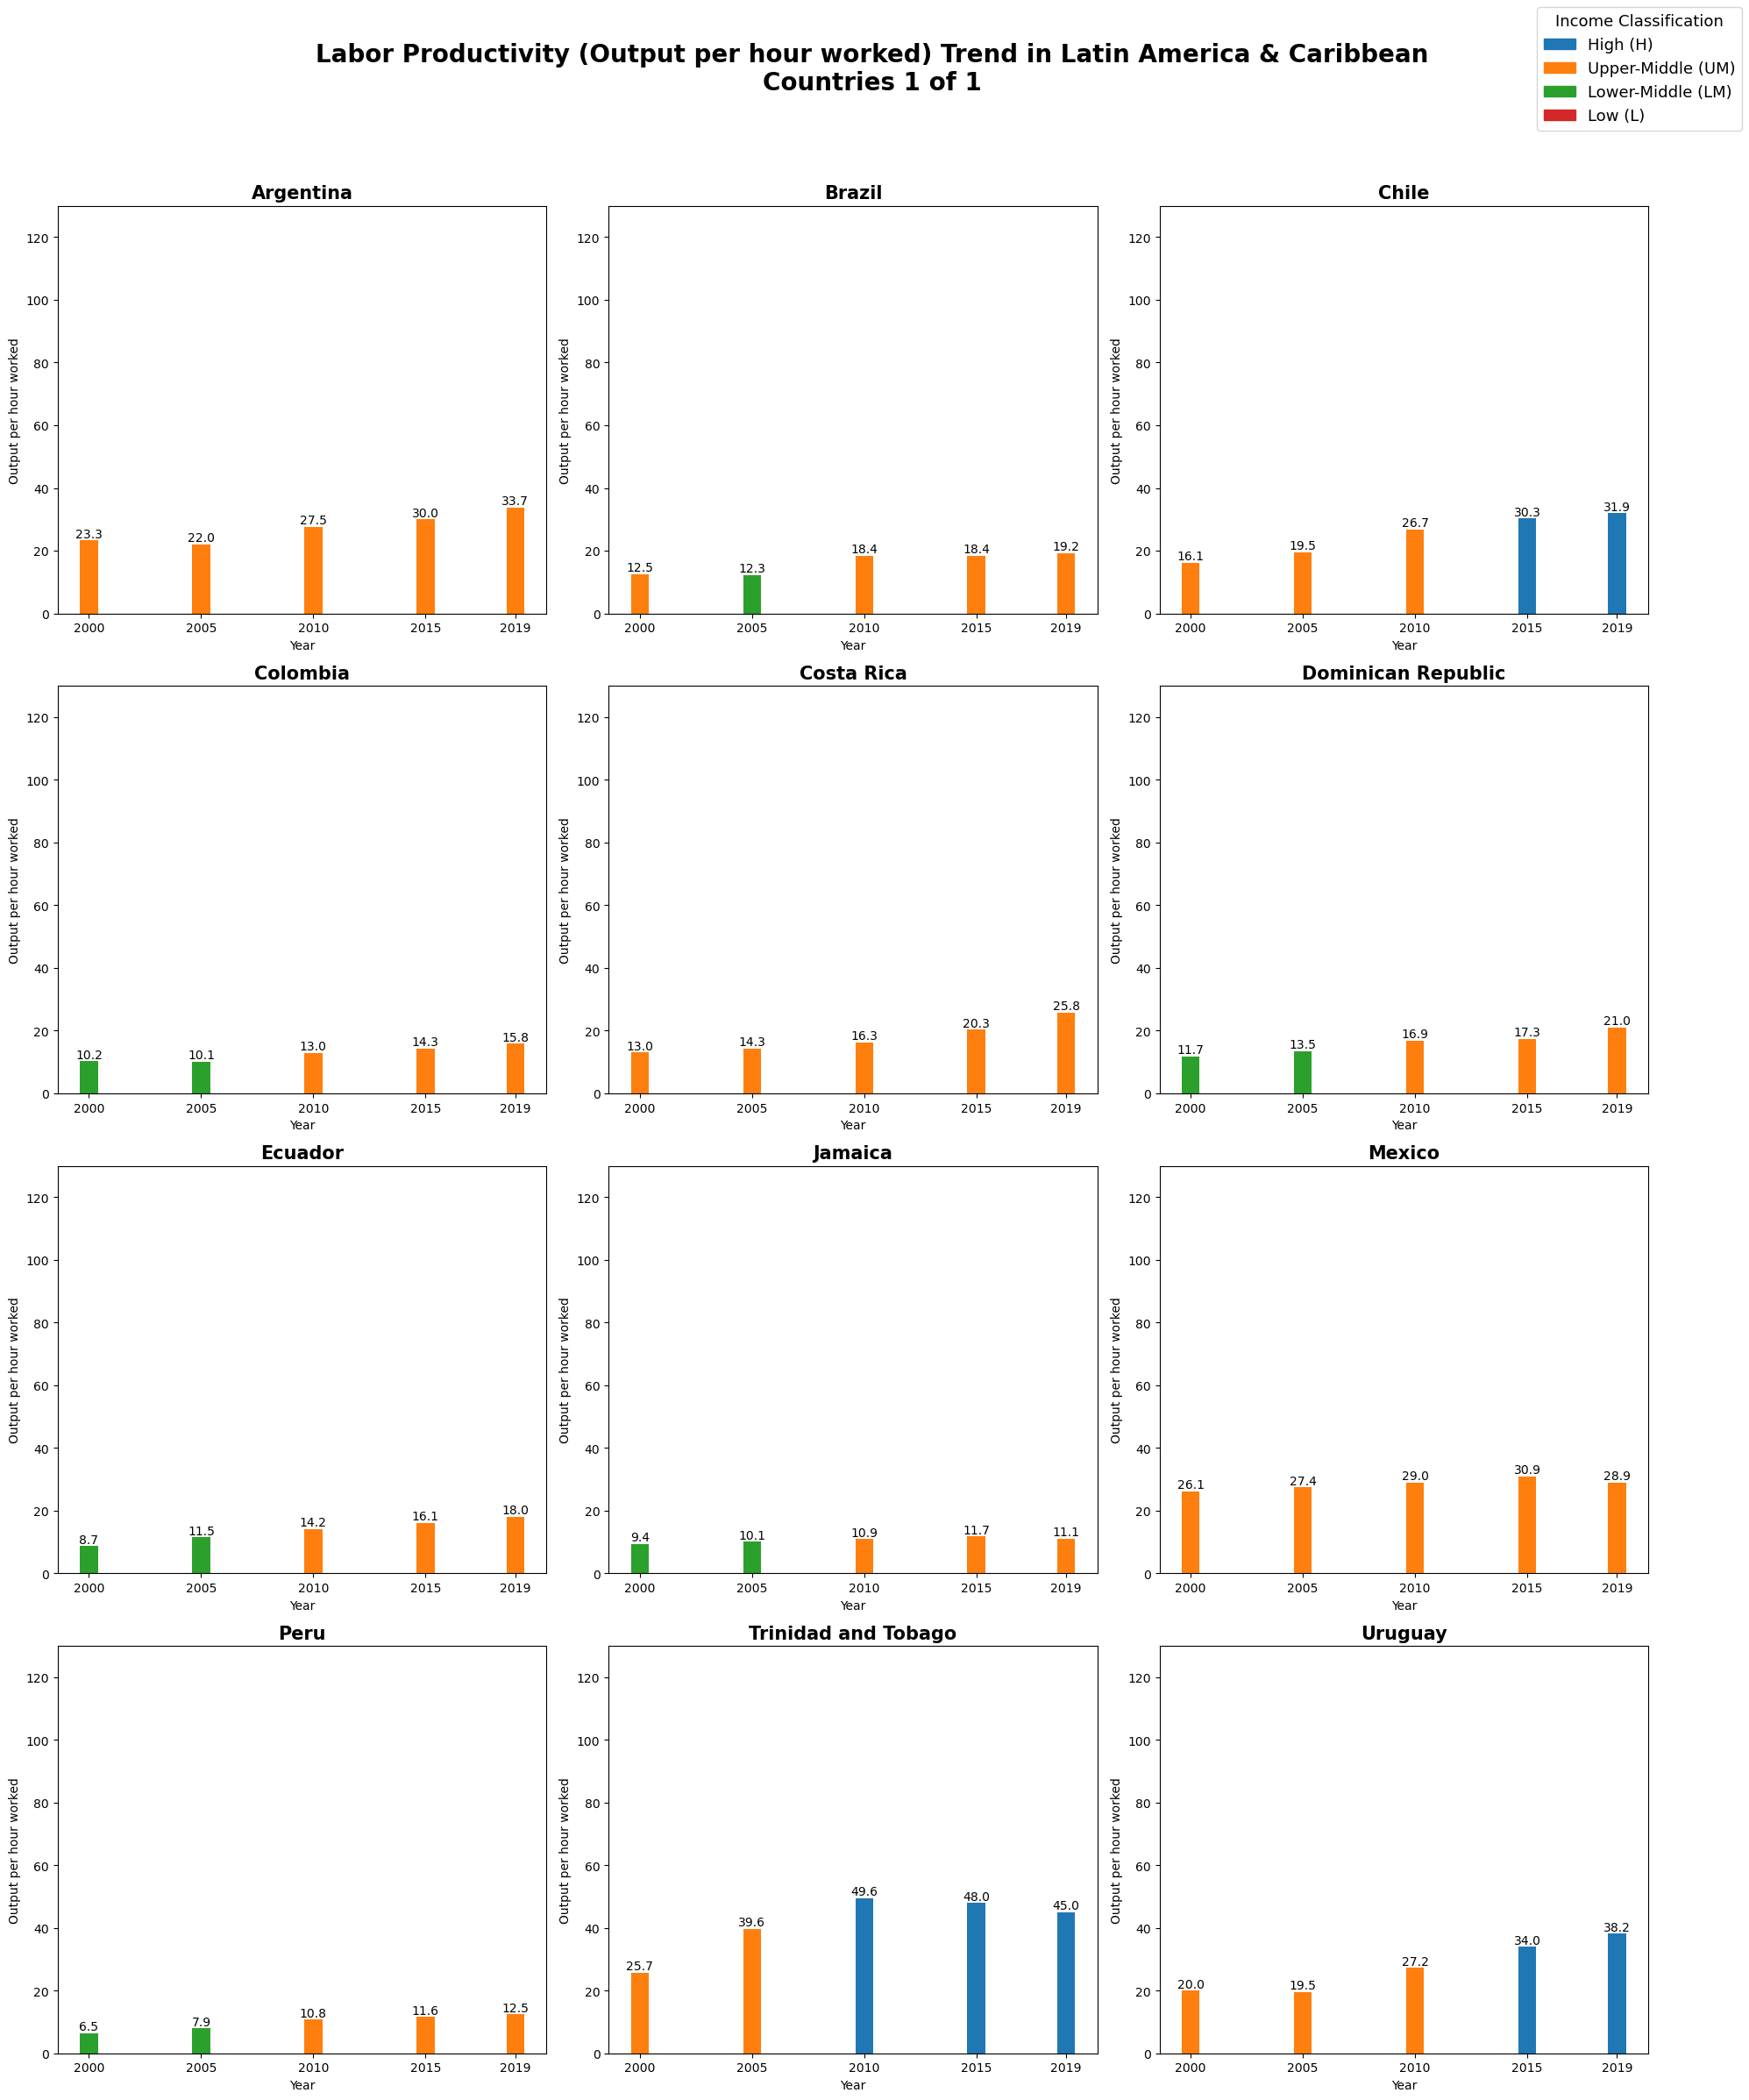

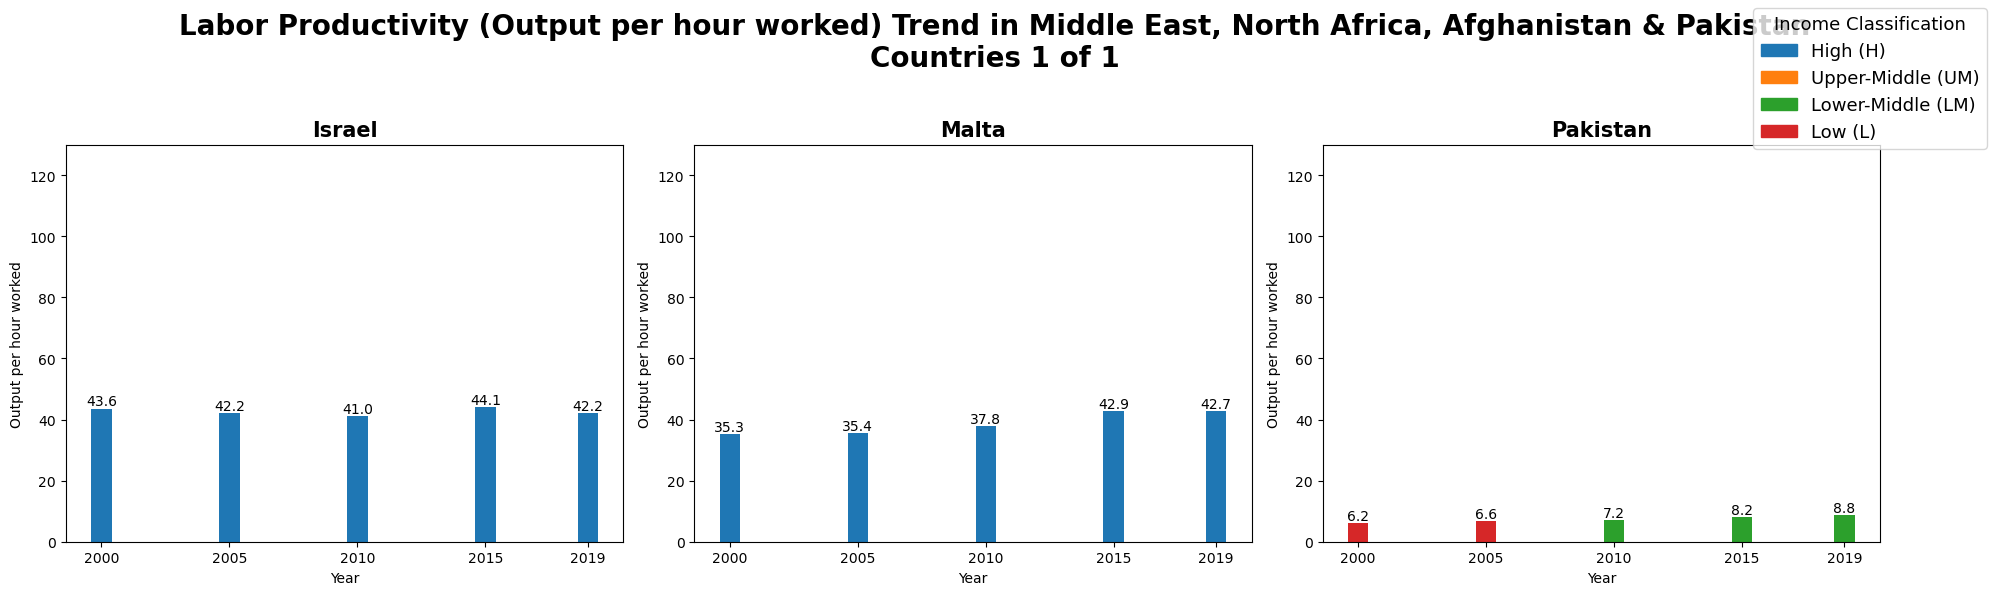

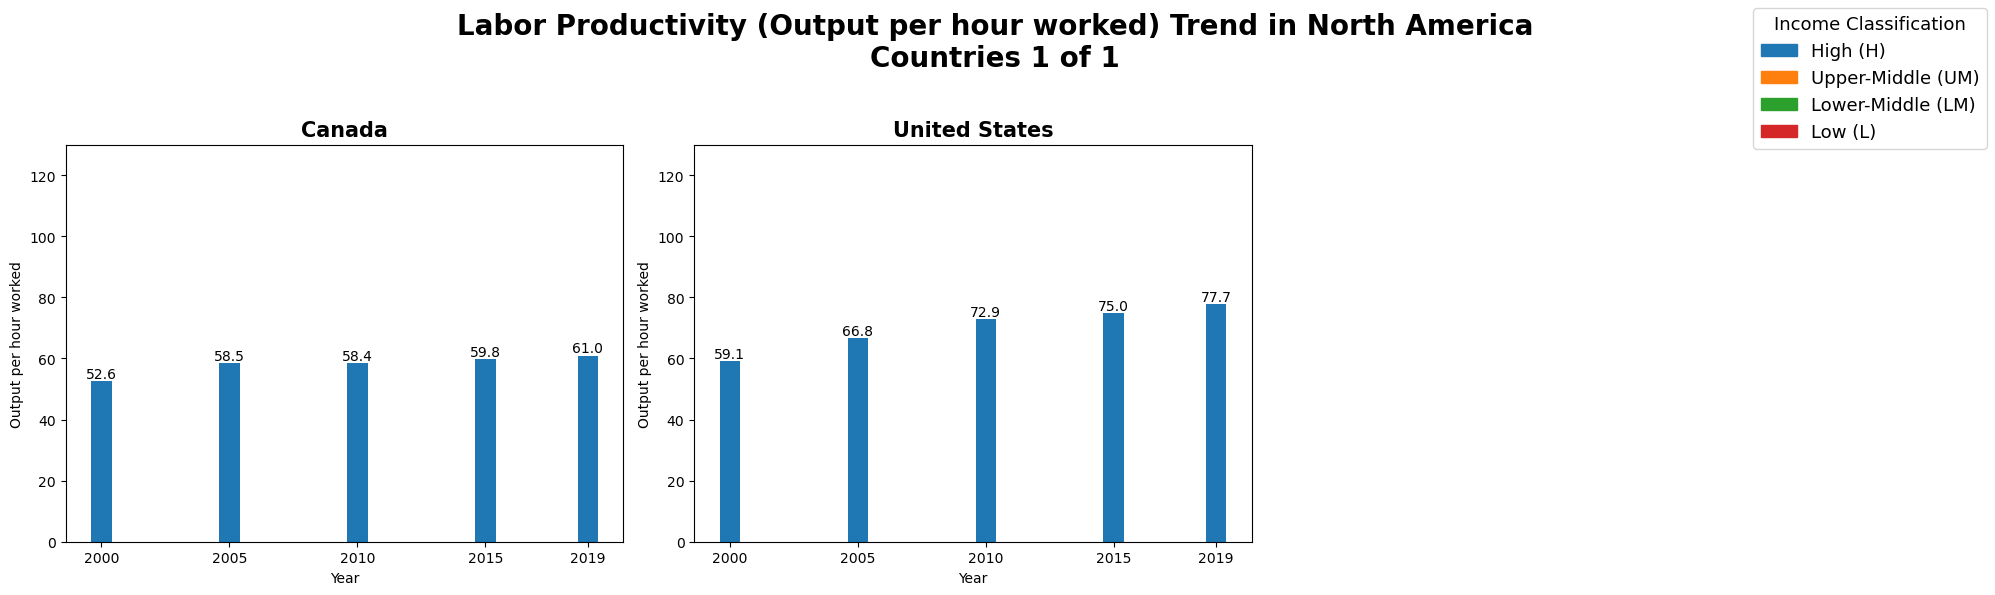

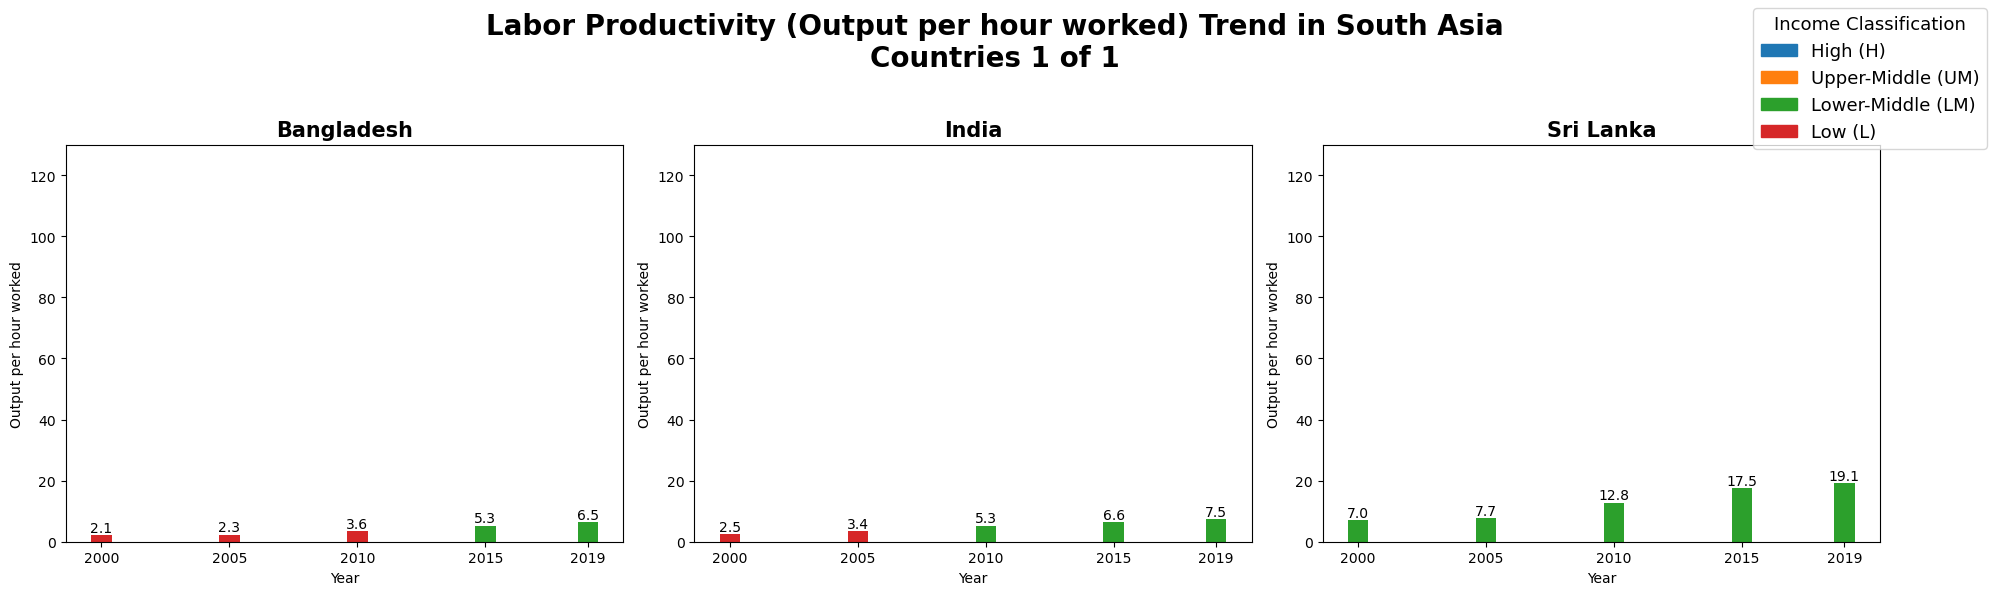

In [40]:
# Make sure Year is int
df[year_col] = df2[year_col].astype(int)

# Fixed years
year_ticks = [2000, 2005, 2010, 2015, 2019]

# Income colors
income_colors = {
    "H": "#1f77b4",
    "UM": "#ff7f0e",
    "LM": "#2ca02c",
    "L": "#d62728"
}

# Replace long names with short ones
clean_income = {
    "High income": "H",
    "Upper middle income": "UM",
    "Lower middle income": "LM",
    "Low income": "L"
}

df2[income_col] = df2[income_col].replace(clean_income)

# Regions list
regions = sorted(df2[region_col].dropna().unique())

# ---------------------------------------------------
# MAIN LOOP
# ---------------------------------------------------
for region in regions:

    df_r = df2[df2[region_col] == region]
    countries = sorted(df_r[country_col].unique())

    # Split into groups of 15 countries
    chunk_size = 15
    country_groups = [countries[i:i + chunk_size] for i in range(0, len(countries), chunk_size)]

    # Loop each chunk
    for group_idx, group in enumerate(country_groups, start=1):

        n_countries = len(group)
        cols = 3
        rows = math.ceil(n_countries / cols)

        fig, axes = plt.subplots(rows, cols, figsize=(20, 6 * rows))
        axes = axes.flatten()

        fig.suptitle(
            f"Labor Productivity (Output per hour worked) Trend in {region}\nCountries {group_idx} of {len(country_groups)}",
            fontsize=20, weight='bold', y=0.98
        )

        # -------------------------------
        # Plot per country
        # -------------------------------
        for i, country in enumerate(group):

            ax = axes[i]

            df_c = df_r[df_r[country_col] == country].sort_values(year_col)
            years = df_c[year_col]
            labor_values = df_c[labor_col]

            # Colors per income
            bar_colors = df_c[income_col].map(income_colors).fillna("gray")

            ax.bar(years, labor_values, color=bar_colors)

            # Value labels
            for x, y in zip(years, labor_values):
                ax.text(x, y + 1, f"{y:.1f}", ha='center', fontsize=10)

            ax.set_title(country, fontsize=15, weight='bold')
            ax.set_ylim(0, 130)

            # Fixed x-ticks
            ax.set_xticks(year_ticks)
            ax.set_xticklabels(
                [str(y) if y in years.values else "" for y in year_ticks],
                fontsize=10
            )

            ax.set_xlabel("Year")
            ax.set_ylabel("Output per hour worked")

        # Remove unused axes
        for j in range(i + 1, rows * cols):
            fig.delaxes(axes[j])

        # Legend
        handles = [plt.Rectangle((0,0),1,1, color=income_colors[k]) for k in income_colors]
        labels = ["High (H)", "Upper-Middle (UM)", "Lower-Middle (LM)", "Low (L)"]

        fig.legend(
            handles, labels,
            title="Income Classification",
            loc="upper right", fontsize=13, title_fontsize=13
        )

        plt.tight_layout(rect=[0, 0, 0.95, 0.95])

        # Save file per group
        filename = f"lpbar5x3_w_region_income_{region.replace(' ', '_')}_part{group_idx}.png"
        plt.savefig(filename, dpi=300, bbox_inches="tight")
        plt.show()
